<a href="https://colab.research.google.com/github/ak1909552/Artificial-Neural-Networks/blob/main/assignments/assignment2/AbhigyanKishor_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Main Ideas

The ImageNet Large Scale Visual Recognition Challenge (ILSVRC) evaluates algorithms for object detection and image classification at large scale. The goal of the competition is to classify a subset of ImageNet dataset into 1000 classes. The competition takes place yearly and the participants are judged on the basis of their top1 and top5 accuracies - highest accuracy wins! 

[AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) and [VGG16](https://arxiv.org/pdf/1409.1556.pdf) are two such models which won the ILSVRC competition in 2012 and 2014 respectively.

1. AlexNet

One of the pioneers of CNN networks, the AlexNet architecture focussed on using multiple GPUs to train a fairly complicated model in record time. It brought forth a plethora of techniques such as ReLU, layer normalization, dropout and image augmentation methods, that are now considered standard practice.

**The Architecture:**
<img src = 'https://miro.medium.com/max/1400/1*bD_DMBtKwveuzIkQTwjKQQ.png'/>
<img src = 'https://miro.medium.com/max/1400/1*vXBvV_Unz3JAxytc5iSeoQ.png'/>
It consists of 66 million trainable parameters coming from 5 convolutional layers and 3 fully connected layers.

The following are the salient features:

- Different sized kernels

The Architecture is one of the first attempts at trying to effectively create filters that will detect hierarchichal features based on the size of the target class. Different kernels are responsible for detecting different hirarchical features.

- Use of ReLU

Prior to AlexNet, most successful models used *sigmoid* or *tanh* activation. However, due to the *vanishing gradient* problem, ReLU was chosen. ReLU showed immediate success as the training time to 25% error was reduced by 6 times. However, this created extremely large values in the intermediate layers due to its unbounded nature. Thus the model implemented local response normalization.

- Local response normalization

To bound the outputs of ReLU activation, the model uses local response normalization, which creates competition among neighboring neurons to high activity. As a result, the neurons in the locale are enhanced, while the rest are inhibited.

- Multiple GPU support

The architecture was too large to be trained on a single GPU. Thus with the use of cross-GPU parallelization, the team were able to split the model into two GTX580 GPUs to train on the top and bottom half of the images in parallel. With careful consideration, the GPUs only communicate in certain layers, making the learning of the neurons in each more robust. 

- Shared parameter pooling

Overlapping pooling was used to create layers with the same dimensions. The team found that overlapping generally made it difficult for the model to overfit.

With an impressive accuracy score of 84.7%, AlexNet provided great insight into image classification models, so much so that many models have followed in its footsteps.

2. VGG16

VGG16 took **deep** neural networks to a whole new level. With increasing computing power, and breakthroughs in hyperparameterization of networks, VGG16 was able to achieve a staggering 92.3% accuracy.

**The Architecture**
<img src = 'https://miro.medium.com/max/1400/1*HzxRI1qHXjiVXla-_NiMBA.png'/>
<img src = 'https://miro.medium.com/max/1400/1*1gA7d9svzp_jRHPsyy63Iw.png' />
The model contains 138 million trainable paramters coming from 12 convolutional layers and 3 fully connected layers. 

The model inherits many features from AlexNet. However, its main breakthrough was in reducing the number of trainable parameters in each layer. The team proved that all the filters of AlexNet could be replicated with the use of 3x3 kernels, reducing the number of trainable parameters and thus reducing training times. This allowed VGG16 to use a lot more layers and come up with a robust model.


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import OrderedDict
import numpy as np
import urllib

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-11-14 20:39:09--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-11-14 20:39:09 (78.6 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
#@title Tricky images
urls = [
    ["data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVEhEVEhUSEhgSEhERERIZEhIREhEYGBgZGRgYGBgcIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QGhISHzEhISE0NDQ0MTQ0NDQ0NDQ/NjQ0NDQ0MTQ0NDE0MTE0Nj8xNDQ0MTQxNDQ0NDQxNDQ0NDQxNP/AABEIALABHwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAACAQMEBQYABwj/xABAEAACAgECAwUFBAgEBgMAAAABAgADEQQSBSExBkFRYXETIoGRoTJCYrEHFCMzUpLB0RWC4fAkQ3KiwvEWU2P/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/EACERAQEBAAICAgMBAQAAAAAAAAABEQISITFBUQNhcROR/9oADAMBAAIRAxEAPwDb7Z22HidienXDDe2CVj2J2JQwVglZI2xCsuhjbOKx7bEKRoZKwSsfKQdkBnbExHtk4pLqGMTiI9tg7ZQ0RExHSsTbAbxExHdsTbADE7EPbO2wAxOhERCIAERIZE7EaAxOxD2zsRqAxOxDxOxGgMRMQ8QY1SRDCMExoQwTFMEyoQwYRgwYvocAQxOGuuExFxFELEupgNsTbHMRdsaYa2yt1wKsSCRnBlviNXaZX6xaKEcSdevOSKuLoeTcpIv4Mp6MRKvUcAfntIMm0yLmu9G6MI5tmPt0GoTmM/WdXxi+v7at+Yjv9nX6a8pEKSi03adT9pD8BLGrjNLdW2HwYYlnPjflLxqUUibJIXBGQQQehHMRCk3rOI5SJtknZEKS6YjlZxWPFYhWNMMERMR4rBKxoaKxNsdKxCJQ3idiGRExJpgCIhEPEQiNUJgwjEMaAMQiHiKEjUwyRBIktaCRmNOmI0xHIiER0rB2xpi6RsxwSIGxH0szONdTwhARBCEzo7EXEICKBLpgQIuIWIojTAFYBSP7Z22Ll9k2I+2NW6JHHvIp+GJN2ziknWz0uy+2a13ZSt8mtmrPiDkTPajsfqd2AyOv8W7B+Rnou2DjxjrL7mJtnp52/CNRpkZxqlVU61iw9c4xgd+eWIvCu0GscMyVtqFVgrjapI9GTBHxBlFxiw1u/wDw9Vbb25PWSSSTyDMxHj4SDw/jGxxZSzad+hZMvU4zzD1uc46958QJnjyu56ZvK/Mekt2krQL+sJdpy38dbbf5pP03E6LOddtbZ/EAfrKfhna7TXVqupKK2ArttL0FvqUB8HA+PWWS8E0ti76lrw3MWIwKn0xkGd/LPirDGekQrKxuDOn7tyfQlTOFtycmLf5gD9Y0xZFIJSRk1rd6qfTIjyaoH7rD6y6YIrBKx8DP+8RCsuiNicVkgpBKRoYKwSsfKQSkaYYKwSsf2TtkaYYCx6psd2YuydiSrPBXsz5RhxHWEAiJ4WmSsTbHSIOJWceZcM7W6mo839quMbHy3yYcwfjLfSdvLA/7StHQ9ykq6+h6H0I+MxKw1MvWVz7WPX9L2t0rqp9qF3dVZWDIfBv7jlL3S6tH/duj9/usDPB1Ms+GcUspYNWxGDOfL8f06cfyfb3BY4BMn2f7XJdhLcVv3Horf2msUzldnt1nku2caxCWK1ee9h5gkTOrhs1HuYj6xp/ajotdnluKH8iJ1mnuHOuxW/C6Z/7lwZEu4s9X7+hwvfYhDp8fCOxgv8RKnFlGoT8S1+1X5pn8otfGKGO3fsI6h0evH84AkLiHaCt6n/V7VWzB2BiKznBxzdSDzxPOa+L6lL2exrLDnDV2Kzh0OCVKuDgE5wQO/lHfydf09hR1b7LK3oQfynOgPIzyynXaF337dXpST/ynqsrQ+XJX+k0eh4gowKuJr5JqK/Zn0y+JqctSw1207Ps6iysM+1SrDYXZRnPLb72OvQ95md4VodFv/wCN9ojNW1e73hWdxHMnG5WGCBnI5nn0x6FXdqsZKUXKfvo5GZntX2LW5mZfa0MxyQ2yysHy+yfzjPpdUWr7At++4bqEsHPClwrYP3Q491vQ4mdfUanSWYtS3TP/APYmat+Pwj3HHkMTWJ2f1+iffQRYvfsbkfVTNHpuO12p7PWVqC3JkdAyH1Vhia43P0zy4y+WU4V28vGBYK9UOXT9hf8AIe63oAfWanh/a/SXe6z+xY8jXaAgz0+3kr9c+UruJ/o90twL6R2oJ54H7Wk/5Sdy/A4HhMPxzh12ls9lea7DtDKyktlTnGDgMDyPKa7fbGX+vXVWlsYZPeGVw2Nw8geo9JJSoDoMTyLRdpmSmqt0BStcKm/DHmTnO3zx8J2m7aXIxwpC7jtC2MMLnkDkEMcY8M+UvafaTt9PXisErMFof0gg4Fnx3J/VM/UTR6DtTp7ehA8SrK6r645j4ia/i6uCsQrOZyRmsBx/EGUiRXusH3D6bSfymdVIKxNsjf4io+2rL8P7x6vWVt0dfQnafrGgtk4pHcTtsaGCsErHysErKI5WCVkgrBKxoYKwcR/bE2xo8KEIRsGGBN65YdWPLGFMdEaYk1tibPs12taoCu/Nifdcc3T1H3h9fWYlDJFbTHKSt8bY9y0OsS1Q9brYp7wenkR1B8jJiieMcL1T1uHrYow7wcZ8j4jyno/Bu0qOqi0bH6FgM1nz8RPNynV3nlogIW2dWwYZUhh4ggiOhZnVxVX8C0zklqKyT1O3GflI1HZyqpt+na2g94WwvWw8Cj5BEvisEiPBqk1HClsJGoo0947rAoSz5Ecvg0qdT2J07fu2uo/Du9pX8VfOfnNfiJiaSvObuxWprO6h6380Z9LYf5Tt+Zmf43fr63RbLdTW6D3A7iwYbPMMBzyVAyc9J7IRK/i3DKrkIsRHOMByql0/6WIyJdvwz1l9vIqO3+vpO19twHLJUB/Xd/pLGn9IRdd12moswQHHvUsuc4OTvDdDz93p3Re1vDtNQpxSUd8Ctk1FuMg8yUsV1UY6c/hKPh+lRldrVygZQN+1gWJOxWIABxgk8hnHTnN8bviscuPXzG64V2v0rj9mi0Mx2rWzNluQOcKNuM8s57pl+017tq3ey5ad6MrKhBfbtUBUXme4fWBqdKU5L7oxyC+6Md2Md0r9Zw296yAlpBwd3s2ZeX4yOQ9DL13zutds+MXdv6NLzWjpfXvKKXrsVl2sRzBdc7iOmcAcpSarsXr685oNgH3q2WzPooO76Sv02p11f2W1K45FTvsQY/C2VxJNHaR8n2qAtggspZT8Vztz8JOpqs1WjdD+0Sys+DoyH6idw/TPZbWla+0dm91Bgk4BJx8AZrP/AJoiaXZVTWXztDsThV/iZM+82e/kPKar9HnZxaqf1mwA2aoBwRy2IeYAx0Jzk/Ad0Z5N2MI/DdTU2RptZWf40WxR/MFP5yTT2j1NWAb9Un4bEW36ucz1nUcMR+psHpY/9TK67gDf8vUWJ5HDr9Zvyz1jG6ftzcOTnTWDzS2tj8QCokxe1dFnK7Sqf+i2iwn0BKmWOs4DqR9zR6kfjor3n4kTPayhUO2/hqA/gN1WfTYSDJv2db8VPu1ek2ZpfiGnYke6iXADzI+yR/mlZpu0GpTA9sXPeHwfQHec5kbV8M0xAK0avRthjk73rPhlnGV/1kvgnCt+d2v9l0xWWZjjzLYU/DMas435W9HaHVjBs0xZSAQVrsXIPeDzBljR2mrPJ0srPmpl5o6VStEQ7lRQobKnOO845fKLZp0b7SqfUCXyIVXE6X6OPjykhXU9CD6ERBw+sfcWGumQdEUf5RCO2xMRzbOxLo+fAY4rRsRVM05n1MeWRlMcQyasSlkiqREMkVmS1qRaabumg4YeYma0zS+4dZgicOd134RuuFWFcEHH5GaStsgGY7h945S/o1mBjM805db5drx7RaGCZTf4rtbnzXPMd48xLhWBAIOQRkHxE3x5SuXLjeJMTsQsTsTesmbnCKztyCKzN6AZP5TxXjfabVNYlos1KKG3nS2fshg8wrrWRlSp5HrkHvE9j4vaUouZftbGCcsgM3uqSPDJE8O7TDZZSjoKyKER1ULtU7nZenL778/OJfJ8NRTxvR3VB13I55PSwSx1PfzYHK/i/ryjXERpDp1bdaje0s2Kh2q/upncFIBGCOWD3zE8K0xfUIiFFLkoGdhWgzzyzN06f2ycT0HtB2RddHWNPuudXL2EYAfKgHZzwByHU901k7e2eVybZ/WZ4PxdKLHU++llboilR+wOCSyd2MZByPAgjvzm/aisH4hSrcl1DO61OcZB9DylnoNC6XOdRU+2uq1yrqwSwheSZ6EMSAcfdLHuk2n2V4KvuP6zVqg7s7ba3RGdWOeWQ/syAMAL8pb7ON43j4umOAcdesGu5K7iGJR3DM/mpYEE+Rl8/FtPYMW0WY8nFo/kcY+sw3C1eyvCKjOpVRuznPdjHU/GXH6tratpuDIiNm20PXYrJzJ5cyD3DkPSdpyvj9uVzz+kvjFHDFCb3etnPJRS4dR4sFO3HdyBP1l52b4np6dv6tr1AOAanZPZt5bH2MD6c/MzzlM2MTYQzHmW+8fLnHv8OQ/xD5H8xJ2ta64970/GUbqVHnh1U+hwQfgZYVXI/wBllb0IM+dqeHFDursas+I3I3zUyy0nEdZS9bC93UWIG3ObORYDnvGcc+6Tf0r3rETE7TuHrRhzDojg8xkEA558+/vjhEuhkiM2aVG5MiMPAop/OSysEpGioXglCnKIUP4XsQfINiPLpcfZez4tv/OTbmVFLOQoHef985U28aQNhUZh/FkLn0EbIuJYR/EH4f2hbT34kF+NL3VsfHJA/vIeq4q7fY/ZjywWPxI/KO0OtXRWN2MqjLEKPEkAfWUD8QtIxvb5KD8wMyHYcnLEknvJyZOx1eRhoYMbnZnRyPAxxTGQYStCpKGSa2kFHj6PM1qLOiyW2kvmdR5OpuxOXKOvGtjpNdtHWWacR93rMIusI75L/X/dE43hrrOeNRqddk9ese4Z2iapgCdyZ5of/HwMyb6wlRz6SK+rl48E5cnsui41Rb9h/UHkR6ywnhVfEWUhlYqR0IODNbwHtsygJaQPBiPdP9pbwsY2V6Fq9OHR0PIMMZ+swK9gHs1ot1RpakOWNYLuXAzsQgqBt6Z+I7+Ww03GlcA4Bz3hpJXiCn7p+hmNXrVPqew3D3OW0yqemUstr+isBIq9gdMhzTZq6D/+d2PzBP1mnXVIe/6GOq4PQg+hBmpZUyxgO0/Z56qUc6m/UKltfuPtZhz5Nv69cfOYrj2xKrQiLXzwm3IDqxIJOT1yD8MeAA9x1OnV0KONytjI8wcg/AgGYjjf6PFvfctyUpyC1rQdqDvx+05k9fjNJ4eX9jdJq2ttbR6ddSUVPaKzKmzduClSzqNxw3j38psnv1YVl1PDbwpG1ihNwIPouB85uOB8Eq0dPsaM4LbrLDjfa2MZOOgAGAP9SZrKZP8AS/B0n17eCa7g7ByybqwTlVsU12D16r9Y0mi1Izld47iux/opzPe2z4yn4/wdNRRaiqiu6H2dm0KyuDuX3gMgEjB8iZqc/wBM9LPV/wCvH2W1etbj1rsr/PMc0VL6i2upVKlrFz4gDmW8gBk/CBbpNRQ5R2sqYZyCzKeXh4jz6TSdktHfZdXbbZatNZDkmx/2pXmqKM+8M9e7Ax3zU5RLx5PWuG17aq0LtYUREZ2+27ADLN5k8/jJWJmzxIg5QEHxJ/oOsDU8Ssf75UY6LlPr1icmuq+1WsSv7bYJ6Dqx88DulZbx9eexGPgWIUeuBmUrnn/WJujTrB6vVvYcuenRRyUegjHxguwjbPIo2fzgmwSM7xo2Sib7QQGsEgm/wiNcfGDXmAaKGjQhAztrgdBhBo2piyEOgw1eMiGpkrUSkePi2QA8IWTGNanrbHWv5CVweGLJMXVpVdyjb2SNS8G1onirvg+bIntZF9pONk6SsVc6DjllXIMSPCajhva08txzPPS0RbCvSS8OPL2Tny4+nsul46j497BlgmvXqGB8+hnjGn4kRjnLrR8bYd85X8M+HSfmvy9Sr4hg5DYPr1k7T61XOG645dMH0nm+n4wG78SWvEPA/WZ/zrXeV6MVHdG2rJmf4ZxtHCqzENjn1547/Pxl2mq8GBnOyxqXfQzpfOI2nA8T9JG1HGUQ7SQW/hByR6+Eg6jihfIU4B7v7mWagtdqhzVQDjvIyM+Q/rKexGzk5OfGP2XGRLLiZuJRCC9mIy7mR3cys6ee2NG0xpjItuo7hy/OVNTGuA6n4Rg6lf8A2ZXWWSMzmXE1cPqV8cfKNF898qi5iC0y4asj8IDGVxuME2Hxg1ioQMbi5nRzwYjgMZBi5l1MPbooaM5ihpFh7MXMaDTt0li6dzFDxvfOzJglVPDsaRK25x5mkvtqUJMTdAJnFppk5unbo0TE3TSU7mGlxEj7ouZdRaU6s+MsdPxA95mbWyPpdJ4PLW0cQIIYHBHMGWL8ecrtRtmftMCQx9PCYivUGSk1czeMqzlWjTVkdDJFfEmHnM4mqzHl1El4rOTTJxU98lVawNMkuojg1R8T85m8Wpya5rB3kf1jL3D1mZXVEd8dTWnxmeq6tbbcyHY0a/Wwep+EQWg9JZEczRp4bD/fOASPX6S6GiCYhSPZ6kARVK9ScnuHPlJeRJqOE8P7wvZn/ZEJ3XnnJ8OQxAa5e5fn/piTauRh8RREAizqwXM4QcTsxoczOzAzFBjQYnQQYuY0wU6JmdANTHS0jiOiSrAsYm6cwgkwCzOMENF3SxHZnZnExJUwRaIDBJnZgOrYRHUtkYesNXl0xMS0x9L5XiyOLZImLNLY6LJWLbHBbIYsRZO3yCt0UWSYJwthJqCJB3Qg0CeuqPfz+McGpMrg0JXmca1P3zg58ZD9pCFkYuny/nA3Rv2kQ2SoysIGJOAmgeIkINmEoEuJpudmKyQJnFFFBg5nZgHmdBzFzAWGpgZihoUpiRS0DMIKJOzOlgWIYoiyoCdFMTMiiWFiN7ohaA5uxOFkZM4GNMPh44ryKDDDQYlB44ryGGhq8JiaHhq8iK8NXkEoPDDyKrw98CRvih5HDQswH98XMj5nZkV//9k=", "flying_car.jpg"],
    ["https://images.immediate.co.uk/production/volatile/sites/4/2020/12/dino-80bbd77.jpg", "dinosaur.jpg"],
    ["data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUWGBwbGBgYGB4bHhscHBoYIiAhISAeISkhICEmIxsbIjIiJiosLy8xGyE0OTQuOCkuLywBCgoKDg0OHBAQGywmIScuLjMwLi4uLi4uLi4wLjAuOS4wLi4uNy4uMS4uLi4uLi4uLi4uLC4uLjAuLi4uLi4wLv/AABEIARMAtwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAABQQGAgMHAQj/xABMEAACAQIDBQUEBwUECAQHAAABAgMAEQQSIQUGMUFREyJhcYEyQpGhFCNSYrHB0QczcpLwU4Ki8RUkNEOTstPhc8LS4hYlRFRjdKP/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAuEQACAgEDAwIFBAIDAAAAAAAAAQIRIQMSMSJBUWGRBBNxofAysdHxgeEUQsH/2gAMAwEAAhEDEQA/AOG0VOGEj5zr/K//AKaz+hw//cD/AIb/AKUrAXUU0XAwn/6geqEfiayGzI+U6n+Ufi4osdCqin8OwY24TX8hH/1azG7qXtml/li/61Lcg2srtFWcbsL9qX+WP/qVtw+68bDV5Pgn4ZzRviPayp0Vd/8A4Nj0s0p119nThx6fOhdzoif3rcud7edkpfMiPYyj0VdRujCPbkceh/JDWl9i7PHHFk+VtPO6g0b0GxlRoqzLg9mc8TN6J+q1n9F2Vb/aMUT4Rr+dPevX2Fsfp7lVoq0dlsm1+0xhPQJGPztWJ/0Ty+nn/gj9adhRWqKsiLsw+7jPWSFfxWtqxbMGrJiLf/sRH5JGTRYq9SrXoq5LDsoi6pN/exMYPwMYNe4b/RBvmWVCCR35CQfLs4zRu9B16lMoq/QQbKNwpQt0Z3F/JnVUHrTRd08PIhlRY1jAvnZmyAfxiFo/8VR8xXwPZg5bRVs2ls7CKwXtYfNJiR8VhI+Ne1W4W0qNFFFUSbYpCpDDiOGgP46VNO28R/aHysAPha1LaKAHEW8mKUECZgD4D9NKkYbeqdQc1pGPvSFzYdAoYJ8VJqv0UqQDh95cUeEuT/w1WP8A5AKhT7Qmf25ZG/icn8TUSinSAlRY6VQQsjqDqQGIufGxrQzkm5Nz41hRQBmzk8ST5msKKKACiiigAooooAKKKKACiiigD2rLuHicuKRDK0Qk7gYXIDkjKSByvpfleq1WSNYgjiKUlaocXTseb6bJfC42aJxbvFhbgQ2ot4cvSvKv/wC0zLtPB4bH4ZWZ4wqTKFN++Ljl3srBhpfjRShLpG+TkVFFFUSFFFFABRRTfZ2wMRPDLNCmdYbdoFIzKD72W+Yr4gfhQAoorekDEMwUlVALEAkKCQBc8rkga9a0UAFFFFAHteVfds7kBsBFjsJdh2StPHfNl07zqeOUG9wfZsTw4UKhNPgAooooAKKKKACiiigAooooAK2IhJAAuToAOZrCrb+zPZjTY6M5e5F9Y7WuEA9430uOI8R4UpOlY0rdHSNn4BcNs5sM+MaIxSDt5srsFchfq0J7tl0Xj1NhmFFch25tuXEMQ0jGIPI0aE6LncsdOpvxorH5LebL3oT0VJx2EeJ2jkFmU2IqNW6dmYUVK2fAskiI8ixqxALsCQt+Ztran2M3VfCTxLjcy4dzbt4bOpBHFSbeoNjYHSgBPhtkTSQyTpGWjiIEhWxyXvYsAcwXQ961vGp+6G8T4HECZBcEZWW9rrcHQ8iLaH8iasUeysVsiVMbCy4jCNoZI/YdG91xrlvy4i9tal7Y3Xw20UOJ2TlEgW8uE9k+JQf+Xh05XTa4Yy8bu7xbPxsonVVixORle6gdohHeSReDiwBHEi2lxoaH+0bdHDoxnwJ7puZYAb9n4p1Q8bcuWmgoUMrwyXF1dTzGoI4gg/MGupbCaHHRdtA3ZYiELdGbS1+Fzq0ZPA+0p0NxrWEt+m7u0aRUZCv9luwsFjYcVDiU76lGWRTZ0U5hmXqAbXBFu8Kqu9W7cmBmMbkOnuSqDlcevA9Ry8Rqek7Z2O6TNjtnFcNiYx9fh2sEkBtcpfusrfZ58RZrXXbobew+KMuHxyhkkv3G9pG11Q8bjXhqLfGvm9+37EqOPUr24W+r4HMlsyEkqOjEWIPgwA9RSXb+EXMZ4lAick5QNEJ5W5Dp8Knb77oSYCVbMJIJNYZRzHRujD58uYG3c7bKJ2iTDOkqFGU66H3vMU309aGsqmVGim23NhyYcqSCY31jfkw/XwpTWiaatENUeUUUUxBRRRQAUUUUAe10zdjFDCbBxsuglxT9knUqMqk38M8lczq1bzO0eDwOHIsOyMv/ABHkYH+Vh8qieaXqXHuyqUUUVZB0qBMPtOHvdydRxHtD/wBS/wBaVStt7Flwr5JBofZYeyw8D+VQ8JinicPGxVhwIroWE3qgxkBgxCAORqORIHtKeR+fnXNUtJ2sx8eDW1PnkoWyVhMyDEFxETZylswB5i4I0Nj5Xros4xWAw5V8mP2ZIAoa18l7ZSRqUYG1tSOFiNK51tTB9k5UHMvunqPHxphu/vNNhcyDvwvo8Teywrd9StEVTplp3fnnwscmIwP+tYM/7Rh3FyoI1uuvK/eA4cQQL0pxCL230rZZdLatED34z0A4svhr609wmyHVBtHY0jG2k2GOrKeYt7y+B16dAuxmKgxLibCr9DxqkZ4wcqO3OwOim/I6HW44moeOfz6jWWaNnYePakhR3WHFkGzH2ZW6HofH8eFV/E4fEYHEFHDRSxnUf1oVPwNWTGpHi3dcQPomPTqMqysOv2WPXnoRfhW6LbUU6HCbVRhIotFiAO+h5X+0p+HyIFjHbwN23ZtwW0WxqAjMWiUkqD34+WZPtJrqvHU1C2lsKR3jBASWSximGiSdNRwI+I+FJcRhp8DMHVtPckX2XHgfy/Krnh95RNh8saZu79dDe9z9uK+qsLnQeHnWLjs6o8GtuXS1krmJx+ISRsLjVJsbMrfittPEEVH3i3WmwiRYgd+CXVJF1sfst0YfO3mBYMZs6N41fFSF4mAEOIQjOjfZkXmR6XtyPCLszbjxE4PFr2mHcjQcG6MvIHyq4yrhf4/giUX39zRuvt3KV7ZRLFm1SSzC+Ug6HSxDHyv4Us3o3ffDntlQjDyMezPEDmFJOt7deNj0NbN49krh5DJhmMmGY91jxH3W8R1qz4DehJsA+EljzoUte/eW3Bhx1U6/jpejdte5cA1uVVk5lRW3EQlGKsNRWqugxCiiigAooooAm7JwLTzxQr7UsioPNmA/OrN+1bEq2PdI/YhRIlHQKot8iB6Uv3IuuI7YadijPfoTZR83v6Uq2zjDNPLKffdm9CdPlUXc68IuqjfkhUVsSMsbKCfAC5+Aoq8E5NVeg15RQIYwYsMMsnDkf1qTNsNyrSRAuq6sBqVHXxXxHDn1pNVj3R3jOFlUvcx35cV8R+n+RzmpJXH2NItPEhfsLbk+DkEuHkKNz5hh0I4EVfsQ2E2yBIhGG2gALrewktzXqfC9xbpWG3N28NjgZ8GVSRtSOCOfEe4fEadQNTXPcThpcPLldWjkQ36EEcCD8wR5iiMlNY5Jra8l520WHZ4PakYRkt2WLQXJTxI9oeevUX1qNJFGg+j40dpCSexxkYuV5a9R1U/OwIZ7C34gxaDD7TRGYCyTMND4SWtY/fFvTiYmN2bLgJLRjtcPJxib6xSD0+2OGoFxcaHnEul/n2Ljk0bMxpwWfD4qMYnBTeyfdYHg0be6/PjxB4cahbS2EcNkxWGlMuFc6SKO/GejryYfA+tWLA4VHikGCPaRMM0uBkNyvUxnmOYI9fBdhMJJCDPg27RB+9gkHeAGlnX3l0IzDUW56mp3fnb/AEUlmyS7wYmM9gMk1rvF/u5vvJzB4evzUDDKEzSjPCboftwvprbkR8/xnHAxTgz4AMjL3pMNfvxNzaM+8h425etg0glTGJmRQuNjGqf7vEqDqCOTfmaya2vk0UrRW9k4wRPkde1gYkENpnS/Qe+Brpr0qXvBsFMKyYrCydpgpjoQbvCfst+APPgdbX3RbIaTM8EJKqQzwG+ZNfd56EeYt8GOz8OQomiTtcORlniYc9NCPEHjp+hv5Vcg1lO+CJtTdpMThGeFSMTB3mW9w8ZBPdt/MON7kC9xXN67fBshsMO1hzSYde9Eb94RNftIX53jILKT+tqD+0Dd+OB0xGHbNBOCemR7nMpHLqB58gCdNDUp7G/oZ6sb6kU2iiiuowCiiigDoe6cQh2TjZ2BBlbIjf8AhrfTzZ1Hp4Vz2rxtbGlNlw4Y9FK+BkYyNf0yj0qN+zrYMeJxAef9xEQSv9o59mMeZ1PgPEVjGaSlN+TVxbaih3u1uZKmHjn9iaYZlvf6uPkT95+Q+z617Vu3u3mTDJlz6kjMyi5v90dB7I8Axori3amp1Ub3GGLOC0UUV6ZxnoqYuGUhtWzAA2y/zX1uAOuvjascO4JUNay3+6Tf7wF79M2gr0qQbjUctdQPMeH+VAhzsDaD4RkkDEq/FR+PMH0N+RA0q8bT2nhMdhbNGrunAA2kUfaQ9OqHTw6ctuDwNrnW/D9K3BmQhtVa/ddTcG341lPT3ZWGXCdYeUYYrAsl2HeX7QHDz6GnG7u9UkGWOQdrDe+RjYr4o3ukfCnG6WOhdz2wVXPKwyzA3zDXS/C6HQ3PA8d28G78TNbDxsUY6INSp59mx18ezbXoeVZvVV7Jo1+XfVANp4Il/pOHcgAi7juNG3/5FHs/xjukeFevje3de1YwYpfYnX2HvbRwNNbDXh16UhwOPfCuEdiALhJANV6qynivJozqPO1N2w2c/VqA5XM0QN1dftwnmOq8qUouPARalySJ8C5mUsBhsWuqyIbJIw5+F+H68Kk7RXtLzKvY4qMjtVtYPrbtFtpe9r+BrXsacy/6vMpkjAJU++liL+Ol+FWM4AphpBIcxj7aMOeJVmRFueeuf+Q1hOSo1hB2T8FtNp/omIVbYjtTFKRwcBDm08QFPgQOlbN2sGfpWJaPuxv2g00BZ2OQjy7xvyUE17Bhvo+HWw+syhF69rOA7+qx5EHi1WSLBrFEsHLKTIV4kCwkt4scsY8A3Wsm7eTaklg04fIkcsvBHZ5FFrdwp2aWHIu2vpS7ZO7cc+ClhkS4lchBe1iEVS4PIKRe5vqOelScc3bTrhgQLHPKRwWwtYeEa90eLeFPQiseyCkRoqAoLi5b2UP3VHebqSaiNvU3eP3f8DkqhXn9j533o3ExGEdgtsRGtyZIbuFH37Du/h41WcRh3jYo6sjDirAgjzB1r6lgxUsmInjRkXDwqLHICFYAXsoIB4Odb8B61HeXd3CYpIpjDiJJC+cSkKvahiLhxraK9u9yzG17mvQj8Sqt8eTkejmkcbg3dmeFZhkCuSEDMFZsvEqDxAOn4XpxgN3MiB2ALPYLnBA1YAlRzABzBjxt3RfhesJs4zTdjGpMWGC58qOy519nKq6kRkg24m+p0FStrYtryX+qCWOV8qtoSsZy2vdjmkygG2W32ged/EzausGi0Ip8lP3xwK4qeOLCLlLXyxWa9hYaDLckBSxJ89danxRJg1Xsnb6tSBplN2FmkdWGZS3LhZR0pzsTCMVGJQ2xMsZViwsIoVYksbfaJ11ueAtrSHH3xUyxN2ghvd2OjyjoOQB0JtoNAOFDnaSfCFFPNcibA7Fm2nI8mbs8PHp2rg2zHkB7zHiQOA48r+V0fGYodkIcPEAEsqIosicyL2N2tckatrc8b17US+KadRWCo6EWrk8nJU3NxLi8WSXwVwD8Hyk+l6W47YuJg1lgljA5sjAfEi1XHYW9kMYAlV42GhsM4PDWxsfg3pVw2dvOGsI5A1+SNZiP4GCv8AR411/N1I/qRzuMZPpZxYTXCqzEhb2B1AueXMdazVPsNx5X/r5iun7z47DyEiSCEtaxLRhH/mADfOq/gN3cJMbHPH4o4YfBgT86a+Jj4Y/kOuUVB7j94p8+B/Q1siQ27hDjmh4/D8xV7xH7N5FH+r4yNwfdlRk09M4PypNj9yMZFcyYc25PAyyD+QHN8ga1jqwfDMnCXgrsWubKQp5xtwI8CefhpT/YG8ckTWbXkwbjYcL31NuvEfOlUuFZCwkjMnj3lddNNCL+hFqMJ3wMwMgHNf3qeI+0PD5ilOMZLI4txeDpG1Rh8XB2jJd9Lke8LcHHvW5OLMNNbXBVbC2WABHHIWQlmjN+9C6i5seYPHlfpxvq2fhsR2KEEEdoAj2ILXUtZlPA8Pj6l9u7sJocQSymPKWEgz3D3uCBqdDrXE5ONqzqUVKnQx2Ds0DGSuRbJGrP/EwjLfIPTHHwXhwsLaGWRM/jcBm+c5+FSMIqdpiypYtKjMFtzCS3GnH2hatm17HE4NOYs1vPLY//AM655Sxn8s6YrOPzBnlMmORbaRBpiPvuSVHoDEP7tT1xAXtZSO6hOXxWLhr1aRr+lLNhYgCfGyE3yM1iddAzkD/ABUnaDCPCoGbKXEa8uudj8W1qLb+5VLj6EfdfDiOObEM2Y3A8wCGb+ZioPlTna+0xAFjQXxEpOUcbFtMx6noOQ8KMI0UcRa2WGK5APFyrcTfq3AddeVK93IXkMmPk7zahDbnaxt8kHqKqFxior38eWKVSk5Pj9/CJk+HSDCtEGvnDgt9omwdvwTw141VN498DhsPHEgVXJyNrcx5UWwAvcXJuCfne1Ot6cYI5cNCT7Ucq+ZHZH55W+NcXh2NNPiZGKggSkyXJBOZmJHW/HyPGuqEE1XFI59TcqlzZ1jdZhB2caliJM4LD2+0IDhrjiCokFuOg46V5PgDcB1V7IVBOqyxE8b3tcEKx6EH7VK8CZFwrTi143jdbfcbW/oxB9au0eHWePtIzeOWz5W4X4t5E6ow58eN7xGlaLatKRUmmzIwZSkecDLwMhUN3T0UcvJjzpjsjYHaN28ndW3dQaE/ovzPzo2tGyI+RVaaNwWMhuLFcqygcCpW5twDZulLt6NrnZuEYtJnxc66G5srHQZQdAFFze3EeNJwykjK6Kt+0ffCzjD4aR1aElGdTktbiFtqCTxPQW1uaK5nJIWJJJJJuSdSTXtd8NGMY0kc8tRt2TBE1tLSJ4cR+YrdIO0UBTmF9bjvr+vmK0xsmbXNEeRFz534GpuGwpYkgiW50KMFkHkD+FamRtO1cUAEeUSR8u079gdPaF3A8jXuytqxRkhgbX4qWI9L2YDzvW/A4MmRiQSALMCMjMDx01BPiPgan7J3HlxJk7FAcgzWZrEgsbDiBcC17j9KynGPD7lwlLsN8HtiF1HZ4gg/ZbX8NfiK2YqbEOBkYOPuP+WlVLaO6uMhkKHCsDmKACz3YC5sQdTbWpGxdnY1yezXS6j2XcLfQewDa58a55fDx5izeOrJckvLiBJwa3O5vr5UywiRXDS4QFvtpdG8+6RenezNgz9mzSMGKo7kAFfYIDKbMdRfjTLZuzpZkLJwVstiQdct/A2t51zSbbpfa0bq6t/czG0oMSFViYCrBgStxfKF8Ol+NWCfCQztYSq2sjKVOqlsluGnFW+NVqSF1W7RkX5lSL+V+NadmSxuM1rA/aUqbjwYA1HqPc1gl704mbCRkRgknjIvEgcl5hjSzc3HyTTxGcvcIxTNqwAvYG+tjc6+XLSpmLxBCMvasQwtYksB5A6VFwe2ZMOhEaqQw1JQlvC1qrdF4aFuaymOcHh5EkxgYWDoZAbg3BZ+nDjwpptTBGXERrmAjjiDyE8FVWJbTqe6B/wBqpmy9tYiNmyZCXABGhJ1Jsc3z1roOCxcMuWRomByZXubKdb8jY2OotwrOKhdP8ybb5NWkY7di+kSx4ZT3BaSYj5AelgP4r8q3S4tSVVbJhob2twZlHH+BOp4sKWxYyNjOYmygkBm4ZUUHgfUi/wClVbb+3ZMQBBhQ3ZLYWBygjgL35C1VCeHff8S+hXyuF4/LN2MlGLxpf/c4dQEPjwQHxLEt5AVF3QlT6fi1YgIRJqR7yED5m9TNlqsUcMTGztJmewBzEAn5WUelI9lshxGKkHEGTS/IyPf/AJRWqbS9R7U8di3xTJ9bC1sun8sosfnmrVubiimHmw7OQ8LG7CxKgnU2PEZlJI8aiR6TqbgLOnZjTgygsp+DH4VnhCRiopQthOpWVRxDhGuLeaDXwNZ5TsbqqHM8jtdSoE8VyoA7kykEWS5uA2l0ucpCnXjSLePYUUiiZU7RlDLGZI2ljXvaqUvddQQrAZRz0tTXEbQ7MWQkaZc98xFvdjBuzuNQOQ8bWrLDzuIwuYxACypHlZgAODOwIJ8hx5njVrUyYy08HAsZsTEp3mw8iqTYEIxT0bUH0Jr2rztfb0+ExcgnjmWMtcSRZoiQygi1iFNyCT5t0tRXetTUr9P3OF6cL/V9hNh91dpTDKEJCkHvCwPqQCR50yXcjHE2fCYXzEqxn/mv8BUnYW+GCjGVjiwTp3Y4W/Q05k3o2eW/2icE9YQ3/JcfCoepqr/qRtheGQMDubiEGaV40F7t9f2gPoUb8aZ4bbOGw8jLmDI65XC5gdVysARlsDob1px20NnSKV+nMrW4PFIt/TL+FVLG7OQshjnVlzXJyst7cjmsflWE5SnieEb6ajHjLOxYLeHCE5y1zmzLdQSpK5TY35i/xqNs/aOFhVlQyMpymwHDISRbQ1TNm/VEZkQjlZ1ueeg40wxG8pC/uyBe3K3OuZuXji/udKjZKm3sKErDAcrs2sltTJxGpHHpTjd/aRRCogRbm57xPAW6mqLjc0hUui2VgVLXNjyPnTiDH9mACbcix0ufjTrCfcHbx2LPjd4DGoUJGbeyLXt8qTneGRQWEcIJ+6b/AI0rxWyMZI6si9w6kkWBB4WYkADnfWpLbNiSyy4mMyf2a3PxtVVLkz70V7eXeidwAwjRF0uq6m553vUbD4mZlAYqAp4hdT51Y5tkQyCzBgR0OlhTRdmwqnZQJmuuvQE8cznjoaTkuO5Xy3yVnd5XEucSZVvrw1trYCnG0NuPMeyj4cCf1twH41XpMGYe0uwLMCqKtwbk2+VTYbwxgAagC/ix/SpcVKPOC4vayecN9WYw3dGrt1J1+A/StOx8PG0cnZsCEsZGJsTrYW6jlpW3beEeLCsOfdzebHUUlw8KLAJMvftx8b2tTWntf+DZatoYYZ2ecyv3QoyRqenAnT+tahbOdUnxByk6NZV4nvnT5/Os8NDI0uVQbBczHkBfj4a2HHnXtlGJDA2L92x5nTUH0p5E2hyjMYYlVSWjCvqbNdADbpqMwvy0qbtmYhAouGfJIljqCe8D4EA258TyOsXYWNVJgzaIBZixFtRxt5+IrXirggXuI/qwFNzkV2UWuNOHqbC40oeDNu3RtwU4DHtBlciwJIt1KLa+XqeevEngm3umeeJ0w0rpKhu0VihkSwuUPE2sNOYHO9W/BYZTGskYWSL3wBmaM68UOp68Ovqtx2CjVgFUyxHVArXZCOPZScf7h9QarTSu/wCjPVm6r+zn+zd54ZYBh8bdlQ3+saRlYjQEZbvG9jxHdYA3Fzevahb4bulGbEQsZYXc5jlsyMTwdfd19KK79sXxfuce9+gpAZbsAkYPDNYn0vx+FYGbMoZg7215Ko8rcaiKRm07x5lv86kRI8jWHfPIch5AcfStWjI8Z7DMNB4AqP1JrP6QUAN9De3K/W34XqM+JNiOJ4X8Onl4DSmmxN1MVi7FEyp/aSHIgHgTq3koNS6rJUbvBrxW8czWtZbG4sNR8aMHjMZiG7OIySM3uot/WwGnnV82VuLgYdZnfFv9lbxxDzIOdvivlU7EYoQjKgWJeUcYCgeg4+Z1rmnraccRVm8YzfLaE2C3QxqR5sXihAlv3YIlkI6WBygebadKbbM2lDCLKhlI9+chzccCFsF08r+NJ9obUL6ak9Ki7P2PK/JgtySSevj+VZSe/nBpFuKq7GW2N7Z5M6B7kqQAumU+nGkOxNnztLnNwAfaa4058eNOMXEuFF1TMfgB6c6hYLaUkr94948OiJzPwq1HGOCd+SymZXNrk5eI4X8bVI/06yqqqt2FweSgdSaqeJxREmcXUG5HgoH4WFQp8dJ24WFrIqKzX1tcXN/H+uVZLS3cmktVItuJkyuZdGYjU+J6dBzpns/Z57ATM2ZjIGS/vWPADp41R9jbQOIlENjZjqeQUak+gHxtVtTbayYqLDxBcoYJY8gNLDx0NUtGStEvVRcN48CJMLK495RIP7tvwtVN2S6PBZgCEex8idD5Am/92r7DIv0iTDXuq3Avrow1HxtXPt38Fmklhv8AvY2F/vLw/E/Cp1MtPzY9OVJoS7WMhOpyOh/Pn4cDWvC7TUOjuVupuNbre1tdOFMdoATquY5XCEjXQgHXjzUj4GqPNiwwsR3rnKw06cetVBbkOU6LZi919pY0ZokiGHPBhMgBH3rtm9LfGl21mfDYlBJiYjliWNuzYycASQcvDvEkc7WPGkmOjLQLdTmS5Uge0h1PjYHX1PWkVdkYqUcnLKUoy5O37B3mVCyIVchA4kzBC4HEBjpfpfTQA6G4c7Vmw02HE8JYKzfWOuhjkBAHaJpla5IzC3kb1xzd/aa9mYHBzhs0LAagnRlPgw/rhXQd1dt/Sc80cajFxx5MZhrWXExL3S4T7YGhFvyBwWjttFvUumPJ8SYWWSdkAK5fpQW6sde5KhsLiwsbg3txGlFNNk4jDyxEwMUtYOkiFwvAhZF4kWsUfpbXr5SyFI+e4ZIyDeMs50QKcqjTiQAWY+Fx68Kfbvbmzz6ySjDxWsWc62PLKCP8RUVO21tfAwEx4VAANLx94nzkbj6ZhWqD9oRhW2GwkSN9uRmlb09kL6CtXLUkuhV9f4JUdOK6nb9B0N24YSBhoi7f209reagi38qk+NWnZuBiRS885mfmB7K/i3xArjGP29iJmLvKxJN/Ly51ojjmncKM8j8hcn8eA8eFR/x28ykN6vaKwdL3i3rgUWjdBx0Vg1/5bn42pRs3DzYhO2cMsZ4X0LDqPDxqdunuDGLSYgiVxqIk1Rf4m4N5cPOrlitmtLYOcsY91f1rOWyCqPuEZNvIh2Bs5XbLFHmI4seA9as+LijwydpOwNvZW2l/BRxNL9lbXMEIjCJ2ozXyXyjvG2p1vlteluNkaRs8hDPy10HkOVSmrY3lFX3ixk2IftAhRL2VNczeduF+lasPF9EDNKQZWGqcQo5A+PhVzi2XoJL2tclzoAOeXx5XPCqFt3EZ5LobqxIVQNXN7a9RWybaohUYY+ZpQIgp7ZmJe9xZbaDwFtTUPamOAHZIc19ZHPvt+QFqc4mJMLh3u+fEyEJJbUxKRmIJ6kWB8/Ckey8AcXiYYEFs1lYjoLlm8O7y8B1rWK9iWxngozhsIZ2X6zE3SPXUIPab10pl+ziDLillYfuwzC/C9iALed/hWrfPFrJiFVQEjgQRooNiEFhfp/Qp9uJhkUzE94QwMS3Ikm+ngBpfn6U5S6MEpZyMt2dpu+OWS/FzccbrY3/rwqRs/AumMkyLmULKQSbZeNiR6Wt40m3ZWKPFROHDMWBOvs5rgC3Un0/PHa2OxCbSylmGZxkvoA2bQG3W/wDiNc7ija3bJO8mFGQNEbPDGrrmAPaXVQ1rdbDj19apmO2euKb6Rh42Vc1pY0GYo55hRqVY/C9/LqGytnCOXERWzSwgPELk5orEhfH3k4X4VRY5DHL9Mi+rw8pYONWEctiQhsD3HNsp5ZraEWq4x24Q3JSE2xdlzyCRo2ftICBk5BGDA2vz7vs25eFV/bOB7GZo73tY3tbiAeHhe3pTrDYTEtiozGrgzu2UAnUg98E31A4m/Km37QdgvDBFJKF7QP2ZI1LKVJW56rkIqoyqSXkUktv0KCptqONWGPeWTPFiFbs8VDwlUfvAOTAaE2uL8xoeVq7RXQ0mYWdX2NtDGYtzjdnNEuKUZZsLouZSfaAYgMoJv1BormGFxbxMHjdkYcGUkEXFjqNeFFRtKsj1thiZ2CqpZjoABck+AFWvdzcHEYgCSQdhDxzOLMw+6p/5jYa866Bg8NgtmR5gyQ3H72TvSv8AwqO8w/hAXxpT1UsLLEkc0k3TkiUNiTkY8IhrJ68l5aanwqbsfso2+tIjTiUU2J/iY/8Af0o3s3xWYlcOjKOcr27Rvhoo8BVPZieJpKMpLqK3JcHUdoftCgiQJAme3BVGVAepJ1Y+hB60iwmKx21JQrSMsQPeyXVFHQDmfO9rjwvUsFAHdVJspOp6D9a6vsjaMEKJDGvTRePl487nxNRJR01SWQy8kfG7vqqqAt1i9liTp46cTUvYGxGaQPMSFGuU8+l/Dwpttra0OCiWTEkZ21jgXVvMj8z/ANqpuzt58ViTLIIh2Y4KCbk9C3QcTp0rHbJr0KUvcuW3cQsiEHSBPaA0zW4KLcvDnXPtr48Ye8mUDESD6tf7JOTEfaOth/kXG3N7ljjyhBmA7qnUZup6gVzXFYhpHZ3YszG5J5mttOLfJMsDzYhZ4MQo7zMQdTqdDfjxNMNmTPgMK+JBy4ic9nB1RBYu4v6KKz3L2aWizCMM0kmRCeWgBI/mPwpbvzjQ+KaNDeOD6tf7vtH1a/wFa226JVDx4mxMUUvdCSqe2dVFxkazD1PAfeFW/AxRYTCTPIwRZEVb8bEk5VNul118zVB3MknEUuSMPGjoxLGwVjfXxJCjTwFNt9trGbZ6FRlTtwlupVGJ+ZrKSztXBoni2KcLhpElPFWQ5nBPTW/S1XTfZryxzAjMUVweYy+ybX15CqLsXaTTL2TAFgpBYk5igACgW6Hryt0phvfJKYMDiBfMoaI89VIsPXWm11JE1iyxbYxUynDYqCcntRl5Xjk7zN3uJWwJym+ordusjyRmbDFZ0lP+s4RwBdj/ALxBwvzK87G1zYUr3SmjlE+EkcJmUgN9iYgi4vyNyPS1Jd1Y+wxE7yPLG2GidiIz7RUhQLkEZbsCLg30pJDbG22Di4w02V44jJnUrcNh5ctuWoSQHKeWvI8VO/G248QgRGY9nM5BN9Ufva+IbMBVwXbB7SKOeay43DLrIudFcqLgj7JLH48ei3e7Y8UOGxfcjWXJh2IUg2btmViOdj+BFOFrFEyaeTllFFFbkhRRRQB0LeH9pcsndw6lB/aOAX81XVU8+83RhVExE7Oxd2Z2bUsxJJPiTqa0UUoxUeAPaY7I2W+IfKuijV2PBR+ZPIc/ia92PsozNxyoPab8h1NdI2Th44Yi11ihTVnbr16sx4X4ngOQrPU1duFyUkUrG7LEXsqdOvG3Vqx2bvGcLdoQGlPCRhcL5DmfGt+9e84nvFh1yQ31Y+3KerdB0X/IVWiMG11g5eBrBHPjcRYs0ksh7zMb2HMnoAOXoK6hjpcPs7BheYFlHvOx4k/iaou5+048KrzNq50Hl/nSjbu2JMVKZJD/AAryUdP1NDW912QqrJCxeJaRy7cSaj0VM2ZhTLKkY95gNOnM+gua14Qi6bA3hXDYO4B7REbITydibH/F8qo8EDSOqKCzuwVRzLMbAeZJq2ftDw0cBhgTjkDt66L+fyqZ+zjBiD/5hMndBKQX99wrM5XwVVILnQXNrsLVknUXIppcIebT2Uuy8LBhpZM0s81yi6CxXIzk9Bey+fgaq280TR4CCPiomc38daRbd23Ni52xEz3kY6W4KBwVRyA/q5uasO9m04pcHGqHvdt2no6En4G4o21X1HbYp2Uv0eL6U3FjljX7X2j5eP61ZsC6y4KYXzdgy4iO/SxzfAX9a588rEAFiQugBNwPLpVv3K2oII2eQXW7KAfeUqMy/n8aJqsijl0KsDiVTDSlj9ZKwKk31y36eJJv4Crds/DDFbNlMYtiGARr6doqMGKg8L/r8KLt2dGkAjXLGiqqjyGpPiTfWrhg8SAmCwqsUCuzStwuGF2P4AX5gdKJcKXcMrAmw21Z/puFWUheyaOMK/sqCQLkHQaHj4DpTTfHeSHEPiYC1wlxDOPfyMDlbLoVaxtxF1jPK9Jl2S2MWeWFi7xG5B9qRLmxH3gANOfLhaq1VKMZO+6E8HlFFFWIKKKKAPa3rhWy5iLKeB6+VNt3tmI5MsxAjXkTbN/7R158OtpG8G2Im7sQBsLXtZQPDr+HnUuTukgFmCxixkE6ge7WzbO3pcQQHNo19iMeyv6nxOvppSiintV2B7Vj2Nu2ZImnkOSNRe50uLfny/7isN09hHEyZmH1Se0ToCfs3+Z8OlxUre/eAS2w8BtAh1I/3jDn/COQ9elpk23SGiu4uYM2mijgKj0V5VoG7Pase4zxriO0kOiqbeZ0/C49arlNEwjpD2xFlbQHre/6E0p8UEVkbSRttPaRAbKsj2zHULGg4/yre3Wme9O8EDztDGSMPhcPJBhxxzOy5CxsOdzr92/E0n2LtqLD4PEoFJxExCqeSpbU35HVhpzIPKq1UqLvPHYLCrEmyL4BsRmvlYAjp3sv5iq7Vo2PtZE2fiIG1Lk2HmFsfippzvFeRxdFWp0NsARxxiJTkRwc2t2e/eHkCfj4UloqmrJH0+yGbBrilNwrZHHQH2T8dPUVY98EljBOJRY5UiSNAp9osWJOn3Sv8ppPujtVUWaCX91Kh9DbW3pr/dHWkGJxEjGzuz2+0xPhpfyHwrLbcs9v/SnI8weLeJs8bFW4XHTpU+XB9tE08ZBddZoxxA/tAOann0PgdE9ScHimicOhsw/og9QRoRWlCsjUVmxuSbW8BWFMQUUUUAb8RiC56Dko4DyFaKKKAPayRbm1ZQxFmCqLsxsAOZNOtu7OjwoWMPnnIvJb2VvyH9eOmlJvsCI0m15BF2CHKnA20vfj8efw4UqorymkkNuwooooEbYYyzBVFyxAA6k8KtO/eKUGHCxnuQIL2PFiB/5QPiarmAVs2db9wZiRytWmeUuxY8TSat/QDVRRRTAKb7A2YZ+1sbBImY+gpRTvY20uxhxItrKmTyBuD+PypSusDQkooopiMl40w29guxnaPoFN/wCJVP50uFMduzs8t29rIgP8i0u4+wtooopiCiiigAooooAKKmYHAvM1kHDUkmyqOpJ0AqTjoYI1Co/aS+8w0RfAX1Y+PCk2rodEvZONiwyGUWeciyC2iX5/15DmaSSyFmLMSSTck8zWqimlTsQUUUUAFFFFADOKcJhnUEZpnAI5hE19MzN/gpbXlFABRRRQBmoJNhqTTTbkKRZIF1ZBeVush4geC8PjS7DylGDrxU3HPXlWDsSbnUniaGsgYUUUUAFScdiDI5ci17D4AD8qjUUAFFFFABRRRQAUUUUAZVjRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//2Q==", "fish.jpg"],
    ['data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhYZGBgaHBwcGBwcHRwhHh4eHBocGhgaHB4cIS4lHB4rIRwaJjgnKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHzErISQxNDQ0NDE0PzQxNDQ0NDQ0NDQ0NDY0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIAJ4BPgMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAQIEBQYABwj/xABCEAACAAMFBAcFBgUEAQUAAAABAgADEQQSITFBBVFhcQYTIoGRofAyQrHB0QdScrLh8RQjYoKSU6LC0hYkM0Rzg//EABgBAAMBAQAAAAAAAAAAAAAAAAABAgME/8QAIREAAgIDAQEAAwEBAAAAAAAAAAECERIhMUFRAxNhcSL/2gAMAwEAAhEDEQA/AICHAchDiwgCHAY6CHgxupGAVWh1eMADcocYdhsJUQoaA1jr0KwDXoQuYCWhS0FgFvwl+BXo4QWAQvxjg8Crxjr3GCwClhCB4EDHQXQBg8OE2kAYwxn4xI7ZMW1kZAeC/SHi3Po1OVBFbehQ4godsmm1EnFie8wRrZUUy8fjFf1gjmmQUgyZKM+GiZEe/wAYXrOMAWSA8cWgAflCgg6wgDdZxhL8DDDeI4kbxAmLYTrIeJkRS40Iht7jFCtkwOI5n3ViJQw5SRBQWySJkcJkAD90KXO+EAa/Dut9ViOrV3wlYAJYm8BD0fgPKIN4wqvviqFZYXuXlHX+NPXOIIYR14QqDL6Tr39Qir6RTP5S4++MvwtB74is25M/lin3h8Gh0GWyUhwHIQ6/6pA5RJA1wgl4wF0KrQ6sIu/CFwhMVHR1DvjjwgbVhWOh9IWkdDwkAUNCx1IeEjiRCseIPxhrAQ8vxhhYeqwBRwMLe4evGBu4gZfGsMTHPN5QG8Yb3wkVQggbhCX+XnDSw3Q28IB0GV46/wAvOBBqY1hS53wgHFjHK0Mv84Uth9YYUEENskwzHZUFVT23LURTQm7WhvHfTKB2CyvaiQhKSQaO4zc6pL4b2iZPlCc38JIFyRLp17LrulKdSSDePPca5Sl4i4x9ZXrtJGuhXRyTQqGe9SvtANLAI1zGEGEyO2naVd7qgBJdUUADMdlyOApdHJt8Resio3VsmXSYs2HCdEENDgYuiCaJ0L13E+J+sQvXrGEpBiKyY0716zhFtERCI6kOgsl/xEcZvGIoEcywUBIE+JCuCIroMr4QNAmSS8IHO6A9Zy84d1vLwMIlkhWO6IW1m7Ay9ofAwfrIhbcf+WMh2h8G9d0Al0s5c5gBQDIfCFM0nMCIaMSB3fDzhQ5H7Q8TpdEwTuHmIUzIiCdwHhCs8JoKvhLD+jHF+6IZeF/iImh4kq/vjr0RDaOJhDP4wgUUS749COJG8d8QjO5whmjOAGvhMqPvD13xxAHvevlEnZewLVaaGXKa6cnfspTeGbMfhBi0t3Ri1WPqpqpJtL36GUVcqDTDGorqakAC6MDXBOSQJGYaaM6inrxgZnA618I9wTaOCmYigjeQKYY0DZQ5rVZ3HaRGHEIfjEfsHieGl44zBHsz2CwMe1ZpJ1r1acOHGBP0c2c3/wAaWPwgr+UiD9gsTxszfWEIJw3mPW5nQvZrH2GXlMmfNojP9ntgb2XmrycH8ymH+1CxPLDN1h1+sekP9mlm920zhz6s/BBEeZ9mI9210/FLB/K4g/Yh4nn5fAnADM5QfZezWtNGeqWfwabT8qcdY1tp+zeagDdak9Ayl0uFSyg4gds15a5QW4woLvDTTLCFKd6Q1Eotr21kCWazgCa4opAostMQz4ZUxp+1a3aVgSyonVMyTfZDqcXGbtMBBDDHCowJWhg+1J8ibNaWzy5UyWwAeZMaXmATddFZiKUrUUxjb7G+zOUO3aXecxyXrGKKugDYO284gHdEopnliNUhFUknBVUEsaaADExpdl9CLdPoeqEpT700lK/2AF68wI9Yskqz2esuzyVvZMspRUcZjZLhj2jU6VgHSjaU6RIZ0mWdG0E29idyke024XYvJmeKMNaPs6Mlb863S5ajM9Wc9wJcVPACsZS2SERyEcuujlCleSsSR3+EdbtpzZ7X5sxnbexy4KBQKOAAEQ3c7o0jfoNII2EcCOHrvgKs37wlItMzcQ49YxxMNBOlRHM55wWLEdfhes3iAFzC3uQ8YLDELfh3WRGLDWL7o/sBpxDuCqZiuBb5hfj5wpTSWwUWwGytkPPbAUTVsudMD8PHKNI/R6zrkjtxZ28ezQRfJZ1RLiqAKAfpy4RFcd0c7/JJvRqoxSMXtWUiTCiAgACuJOJFdeBEQplkE0XCSKGuFNMNRxh9stF93f7zEjPKuHkBEjZBq5w90/FY6ORsx9K+W2ApuHwhzisMIuEqTiDThhhh3iGlops2oMqjfSODwFmhBEhtcDXjoI4V7+4QEud8MmPQYmg4nD9ITHbDN3eMcOYgfUuRUI5G+49PGlIDMqPaVhzUj4iJsaZJw9V+kRxt2ZZZ6OiIwWh7aBgccQCw7BwzFDAP4lK0vLX8Q+sPwOGB8D6ziXtdB34aN/tatBAAkIOTG73C5h4xDnfaVaGr/LHDttThgFFYz82wofdI5fTKAPssHJz3ivwpGbTJto9SluWxJOnrGCqOJjz2R0gtMmpZ0mLSgD9mlPu3bunGLyxbUt5UkWB5iqAAUv1ww1Dl+7viXE0yTNUhNfa/bxh72oot5nCqMyWoBpiTlGObpaUcC0WebJ3lgw0xwZVJxwpQ58IspPSeyviLSq/iluvmRTzhUwtGlW1Pnfrp7XOHC3uD7R8jFLZ7Sk03JVqluxyVXW8eS1qYS17Ocgh6MpzqSR3giBjSReLtR6nHSmQ444aZRHtm33Vew6AjEk19mhrkaRkNp7A61w950cALVT7oJJAyoTXOvdDrHsoJW805wcg7kgYEUoKAjHUQnRUVT2amx9KnKs/WJcX2mBF3vYmi6Q607SLtWiqWxwDY+RHGKOx2VEBCqq41FAMCRQ03VoBhuiv2klnlAdZMmLXJBOetK1wRXFAOXnFRQScb0MOy366YyW8o0xyWugCpqboIMxWND2ct2FI9D6JWOd/CX7ZbDMlt2wyzGClGVSC0xgrqM+yCBvJrHhUy3TCzFJ0wCpuVmPWlewMTnSnhGqSaHkSZRmO0tF7AoQhdmZ3e6c2vMReOdMMDiyFvSNzt/p7Jkr1NhozDAMFHVr+EYXjxoV5x51bdoTZrF5ju7nMsankNFHAYRKtGzQuJYU4xAmqgriG8Y0i0JxYNXPGHeXfAusGmEdei7Mx0OvHWnj+sIPWUL60h2OhRvr8I4niYYSd0ISN4hWLEeD/UPP6Q0vXX4+jAnmbjWJmx5FpnODZkeY6nAoKhT/Ux7C/3EQpSLUTQ9H+jylg8/mqH4v8A9fHdG+l3RTEDwis2B0OtjLW1TElmtaS8WofvH2VbleEaQ9Ggq0V734gBXvUfKMXlJ7G0lwqLTNU8N31in2taLkp33KacyKDzIi8tGzWU3WWnOnlvio2vMs8lCs4I9RhLK3i26oDC6K43jThDitktnnYaJ+yDVjT7p+Ih9pn2V/Zs7yj/AETiV/xmK1OQIib0MH/qG/8Arb8yR09iZVTKCbNN48z41+MDV4NMWjHE+0clG/iwhoRD7zj+wH4OYMkjbFv0TrIZMmUxJAHwiR1cv/UI/wDzm/8AFTGt6CiygPOK9bMR7qFgLq9kEsqn3saVOOGFIh/kXEU/xypt8KbY3Q+2WmjIlxD702qKR/SKFm5gU4xOsOyrXYpl4WZHmqaKXMtpYGHbS7MDq+ea5V30jfzNss2ZoN0RJ05Wzr67ozcmyaJS9I5uqjw+hh46TNWhQeeMVvVrvMMaVx8oQy2/8gBzlKe79IQWyW+BsqMeKr8xFPcIyMCmznWl1a4iuNMNThnTdCYIt7ZY7NdvPYrLwBRCSf7VMZq1WCST2bLZF/DIb43wD4QedbG5+MV0+0NQ9phxqYSsdBplidEIlJIlOSDflSJauKMGFCyk6AYwKyWq0ywf5zkkkk3UU4nE1RFJ34xM6P2wM6yHcVPsFjjifZNcc8AeNN0a09HCc2Udx/SEHDz5ts2pgwmTJi4tSjM1VrgTeFBUaUjL27Y8l3Zi7X2OJvDEnhT4R7LM6KVycf4/rFXbehbMPcbnUfEQNhp9PH5mxAhDI7VBBBNMCMQcKRvejX2jvLpLtqqy4ATEXIb2A+nMxF2v0DnKCURxwU1HgprGDtiTpbFWrUYUYfsYaaG0j6QslokWlA8so4YAglQcOWvPKINv2XKUu8xUSSqlmYEqQFFSxoab8KaR89WTaVokteku8o5m4zAE7yuRPGkW3/nFvdQjz+sQMrXXSWykqQVvUUFhUVoTTCE0mJOjd7P6KPaZjWuaZkuScLNJoxJT3Xe4agn2qXdRXIRg+l9is62grLmGYa9tlZmCkZrVgSaDT3fKLHbPTe3WqX1TMstPe6pWUvwYliacAQDXGsU+zLEWN0DI4gcRruyiqDG+grNs6W1LtHO6+nwLCsaSxWK00CpJmMNbivUAUAoZZb4HKJNi2Wq07MaHZlreSapgaUPL96QtAtcMhbOj7kEqLQG+49ntBJJ3OJYH+2Ilr6N2pAC0pqNWhFMaGhoGIbA6Uj1Cbt+Yy3WYga3TQnvBqO6DWHbtxbpF/ixLHxMCk0D2eNrYZ5rds85qYG7LdqHcSqkRGeYVYq3ZYZq2DDmDQiPdZm3Jb0vywacSKeBh77WszCkyUrgfeAag19quEUpE0eBPaVyLAV4w9ZuIAJJNAoGZJyAAxJ4R73LtllUURBLQ4siKiq1dWUCjGBna9klD+VJlI1RSqrLHE1VT4Q8go8StFmmowR5U1WPsqyOrN+EFat3Ro9i9ALbaaMyCzofem1DU3rLHaP8AcVj2fZVtlzVLI6PQlWKMGUMM1JAGOOoixgtsDDbF+zKxyqNNvWlv68E7kXAjgxaNpIkqihUVVUZBQAByAwEGjoAEig6RbXEpbqmszAgVwH4+HDM0iPt7pKJd6XLFZgNCTQheNNTwjzDbTWx3LI4Vc63u0xObNVachpCboqMcn2jTWvb1pbOce4KB5CMxtyZfALEX2YktTE040qcx4QXZ4mqn857zkk6YDQAqBXKvfFZtt6zLv3VA1zOJ+IioK2T+RY66Rii76+Ii16MWtZU4u2RQrhjjeU/KKZe75wG3WpkUMgqa0x3UJOXIRu9GVWySZhJJwoTX5iErx7oGQO+ERdTE2bYhaUzrAZl8EtKcoxzGF1vxKQVrxIglYUudDCe9MdFrszahuATC6PSjFXYIeIAN0eEWyWlzitoem6kph43K+cZZQd9IVcD2Sa6nL4Yxm4LwpSa6apLTMxCzlyFaprj911oYHY3mKQQyZVxM058Gc48cYz1ptE2XKaZeKgAUvAGpJouBFc+ULsCfaZwLsyqgwQ3M8caAMKgUz5xm1Ralevv8NU20p4yWU2H3nWp0xumHptOdrLTumN85Yis/hZn+on+LD/mYa8mcBgZZ/ucf8DCHj/EWzbTc5yCeTp/yIhqz5j4rZZ5G9QjLh/UHIioLTh7qH8Lj5gRodj9MmWWqXHASq4BCBcJUjsmuYOYrAJr+EA2W8asFltSnbZK0rWnYLGN70fmzXlo0yaHujAJ7wFRV2OLEYYCmWNTllrb0oluDfRicsZL18QkZzY/TlbPbnlsbtlZlAwIMslVq1DjdqTXDcYSJknW0e3KaisKREeS4oGUhlahqDUY5EEZgxJikrMgZSM90j6LSbUpvLdmUwcZ8A33hGlpDSImUSkz566S9FJ1mYJcqGr2hiKDUUzPwirsuxzUNTD13x9F7T2ek5LjiorUUzByqPGPMOmGyXs6Oy00INSAQSFYg+69POkJMaMoJi1uZkaihxBxHdE+ykg1Vc88PCKSzSKZFxyY184spIemEyYP8D+ZIuzRo0NnmNrSJaGu6M7KMz/VfvWX/ANBB0mzP9bxRICcV9NA5oC14LQVJpWndTHlA0tMskATEJNaCtCdTQHmPERStPmEEGYCDgQZamoOYIrlCSw4xVkHESU78j6pCsMP6X6z0OUxDyddwO/cR4iHhcBkeIx8xGVexoQQblCACBLAGFKYBqYUw/eJUp3VQizmUDIBE55spJzgE4f0v4iWpwQRgeBximnWu5i9pfxlD8qCKy1bVln35rng7j8pApDDFL0mtLMt+slFpb/eQlDyJWl4cDhF9s37RrRKos/q565E1CTPFRcY8Lq84wE611yQf3m8fOsBqx17hQDyhqMh3HjPfthdNbHaqKkwI5wEuZRXJ3LU0f+0mIPSbpOQTJs57WTuMQu8LvbjpHj2ybbLklneWzN7rjtFMMSFbX+rMaRrJE9WRShqpFVI1rrD2ukNLwcDQZ8953nnA+srju4QQ4wipvrTgIVADOJFfXr5RkrVaC7u1c2NOVcPKkbBTLNVaYVFCCQq1A3ipGPOKOfsCWo7FsksdzqyH/aXHiRGsNGc9lPeMSbI3aPL5wKdZmQ0qrcUZWB5FTD7OnDSNXwzXRi13QpPKGuTXOEUesIzxOhyfgVJbOeypPrjEhdnuaVATmanuCn5wApy8BEqQ+FC7AcSx+EJ/wcV9JsqyShS/1h44DyGMS5MyXLF1EI51qfHGKp5cnMuSeAPrzjlMoYhGJ3s2HkYimzRNLhZTbZeBUoCpFCCAQRuIMBNuUC6RSmShcBoAMqRCNqalBRRpdHzzEAc61PGo/XGBRBy+Es7SNCbnIE0HOiipgY2k5yRBvJDfMxFDVICgk1GGFTwAHL9YY7kMaqBTSuA5/vFYozcn9Liz2qZTtFFXwNIhWlkZiVBqfaN7OlBWgOcQmncF55/Gscrmuvw+ELEeTqj0Po5sOwmSjzVmPMNSx6xwtakABQwUgDeDjnFrN2dZ0qbO3VHM0lyxU/iVQT37o8xsk4oKBVOJNakNia0qM8a+UaPZmyLdPUTJUl7jDssbQyg0OYBepGH3Yzaa8KpPrLvYvStLJaBZbRMqr0KsR2VLkgY6Aka5V5x6Uh08I8S2t0LmO9+0zXSqhSqJMmZE++9wUodI33Q7baELZWdnZV/lu6hSwFezQO3aUbzUjlAjOS+G0hI4GBzJgGevAncNOcUSPIjK/aDKU7PtRNOzLZgTowoVpxrh3xq4rNvbPFos86ScpiMveykA9xoYlr0aZ82ydqOtMEIOWWmdTUUMSV2jP+4p5fSsQH2caBS1CCb4IOeR8KUiYigADdTQ6Q1GxpyvZITbE6mCKOYw8z8oY20J5zdB+Ffr6xhhcehDyo/eKxXpWxVtz/f8R+sEG0npmvgx+cAujdDbo3Q6Q7ZINvmH3h3L9YA8x29p2Pf9IRgI5KQqQ9gmlCGslIMSBljxEIYqJnJAxDg2MKVHGGrjqBzr8osger74nbI2h1LXW/8AbY/4MdfwnXdnEFabz4QoI3nz8OMKURp72bYA7/20h4T0e6MvZtrzEF3skDAVG7TCJC7ff7q/7vrEqLHaJXSJ7ssLlebyGPxpGcBHqsTdpWx5pUkABRpXUjfrlEQJvjWKpGclbODRJsZqx5fSI4ESLKKHA6d+kN8IXQNFELfpp5wMIN/rvggURnaOhps5MdSIKkvjQc4ZBUcgYKfPwhtkpbCdTTGuWsJcrr8DA3cMcUIPf8Kxyuw3gaVFP1iSqDqgGbeH7YQ4ui5qG51+K0MRHJJ7TjLn845JNflpBSDZa2faCIKKq463QTjuJPxiI7yzXA87wFPMDyiOZGOY8YUykGbHu9YwUlwW30ZVd3r5w5ADofXKH35e44a0x/SO61dCB5QrGkKMNI1uxelcxJSIFNEFwAOAQFNBUNSmABz1EY69XLGBzHpmO/6wmrGq9PRG6Zv7LJMxFaVlnvoHJjF9KduO0+W0oujKlRQCpa9gaY5UGPOICsDu8TCggY4VpSuOW6JxY/8Anw9q6DdJ/wCMkgTKLaEUdYu/+tRuJzGhw3Rppy1GGYxHP5bu+PnrZm05kmYsyWaOhqDTDipGqkYH9o9y6ObcS1yRMTBsnWuKtqOI1B1EOiGq4WMhSBSgA0pTDhQAUp3wciOhGy3QqEfOvSGyGTabRLoTdmNiamoY31OPBhFZeMW3SW3vMtLmcFExD1blRS+ZZKhyNCQBWmGGkVBnbodM1TXojMYRj+sI71OUKqxVCbT4IHhwYw5U4QhYYwC4PWu6Ggb8YJJmEVFMIbMJIOXHGEPyxvWAe6a8/VYZMrrhDQm+sPZTkKHic+GcUiXs4UhwZd0MEojh64QwjfWKTIaJ0mQhBrhxhJllA9k19eURkiTIanvCDaY9NUNFlalaYcY4Xhp5RO/iFpTGp1gsuelKXSx3k+vjCthivpBSUx0pDxZDr84mFwd40woRElJQ++DwzMGTRWEWQEsG8Hy+sEFlC4799PlEpKaVry+kVvSTCUtCcXGh0VtYWTegxikRFQbvOHiWdBBkSoBochjD5blc2I3UOEBrQtnRgMVXH76KfzCtIlJMc1BZVFcDcQc6UECM46nvJx7vGBTpjUrQ7q+sonoUlwsO2ACJiiuRAGWtSBhEd0vYk135H5RE65slGA9d0EBagroN/GCgTFeSK9xzoKZxEmzRlXwjpjOxx+UBoBmaH4ecUkQ38FEzuhDMEDYev2haRWiNimbCFqiOI4fWHXDmVpzpE2On6CUkZGkSZU00xx9c4DDkIwg6CVML7Wgjrg1OXEwqy8aAnhD1sznLzwhMpL+DFA3/ABi66N7dayTQ6NUZOpJoy7uBGJB07zFM9ncbj65QO61KfD6xJT+Ue97J6WWS0YJNUNj2WIVsBUkA5ilcRui569aXry031FPGPmsS3aozGZFdINY3mJXqndN9xmTxKEecDJUP9Lz7S9m9Xb5jgdmaqTAdKkXHp3rXvjJKPWEWE6az0vMzXa0vMWpXE55RFdzXIRSeiXFJidTuNYS5hu44xxYjImm6pgRc1/WDYOgwca4+PyhgA9D6wxRBZQEHA7oVTxHfSEvbyIUpTlHNTOCx01ocUqOycdflCEHUY6UjhMOlB845p/j61gKpD3DUoR5gwBqDWCC0A4N4wAtFRM5BVcboVmxgSniIfXcYfottDlcwWXMgSqTBElNuPlDbEkWMlA2WetMKRJlqwwzHCuXOkQrNMdcAMOUWaW1Pew7x8qxDvw0SVbEmeUVW3X/lACvtj8rRdynlHEio4YfSIe21R5YUKBRgdK5Nv5wsq8BpfSHLY0FaZDduhrsDhhz0H1gajL1pD+s8NIDWwlCCM9x3Z4DhA7XPJNK0p4QjTqV8IG0/AbuQ+MCJk9D1YKK1AOmZ8cIE0wnPwyjuvJzhEl6YQ0q6Z3fDif3pC3Kmm71rBHkak+EPCgbyedIGylE6XZb2VPCDvs50Bqd9KfWElznrVaDTWB2i0viCedIm2VSQwWVq0ECdDXE0HOvjjBGnEC7mSBU8KZQJlrUw1YnXgEIN4hxcDCnj+0cG4QTqq6w0RsfInEUouWWZ+cSltJGajwBHmYALPUA4eEPoaZ5cIlqzSNrof+IwI7NOV38oHxiPMnA4UwG4/OAlsK926OMo0rh58PrCSKyFqAcR68obMJONIGWoddfKH3KjAnvh0hXYxlY5mGdWIkix4Vr84E8kVzMIX+jKCGlQcIbSEZYYmxhWm7uhA9NYVd0K0oRRDXw4zD6+kFSlPjAjK3GGAeMFWgUmnslMo3/KGU7oZ1mULnwhJFNpjHFOPfDhSnGGXqb4aHJMMl0gyYaV5wQT6ZAeEAAhwWBIVvwOrsRUEDwEKs86sYindDliqFkwyzO/nDlYHHWArBZUuuZitC2wqzDvw5QK2zzdGOo+BiULOtM28ohW+XQUB1+RhaY6aP/Z', 'an255.jpg'],
    ['data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUWEhgVEhISGBgVGBUSGBgYEhgSGBESGBgZGRgYGBgcIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QGhISHjQhJCExMTQ0NDQ0MTQxMTQ0NjQxNDY0NDExMTQ2NDE0NDQ0NDQxNjQ0NDQ0NT00MTQ0MTExMf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYHAQj/xAA7EAACAQIEBAQEAgoBBQEAAAABAgADEQQSITEFQVFhBhMicQcygZFCoRQjUmKSscHR4fDxFRZygrJD/8QAGgEAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/EACcRAAICAgMAAQQCAwEAAAAAAAABAhEDBBIhMUEFMlFhEyKBkbEU/9oADAMBAAIRAxEAPwDjQMcDGT2BSdEmaeFoy88MVD5Mdmjg0jnojFyZMGiLyK8V5NBZIHlzgfDmMq0/Mp4aqyWuGC2zD90HVvpN38OPh6HC4rGpcGzU6TDQjk9QfyX7zr+Hw4A0A00A2AHaVxGptHzC3C8QtTy2oVg4F8nltmt1tbbvIAbGx0I0I6HpPqd8OpN7C+17a2mR8ReAMNXqec1Ns7aPkYoH6MQN27yXE2jsfk4ajyeg2s6QfhfTDMTUrBSPSvo9J/8AIjX7THeIfDdTB1BmOdHNkcLl13ysOTW+8ylB+lxzKUqJMEJb0klLgHl1QaJHpYUOZYHWWHsINXWFm0kVVYyAVJLiVgBbWIcUEu0HqT0PGMY0OiItIKhkzSNxGJoFbeG4EawRhCMIdRKiYxX9jUYUaQjLBcE2kPCyjdELCRWhLJIyshlohaRtJXEjAkASUVh9FILSWWFFZQh2WKSWigM5jwbw/iMS1qFJmGt2PpRbci50v23mmo/DPE+aq1HpimQWaol2yW/DlYKSSdAdv5TuOHwiqoAG2g7DoOkIXKFJIGm86KPljnfBPA+FpVC60y5yhbVctQKebAEfMf8Ai0g8QfDijW9VICi9tMigIx5Z6Y291tvsZtMSA5Hlk2F7kaXJ/ppLKhcrrvsf7xID5c4pw2ph6rUqylXU6jkRyIPMHrAp9B/EHwmMZQJQAVqd2Q2+bqh7H8jacAdCpIYEEEggixBGhBHIxgEcOwL1qq0qS3ZzlUXsOpJPIAAkntOmeGPhzRWsj4rFI2QhjS8ohahGw8xm2vbTLrLf4b+FFo4da1Rf1tZQ5JGqUzqqC+1xYnvpymprcPudBF2BoMtl9LJYd7C0ifGALZWzMdAF2B6kylGHI0llgsPrcw7As8E7FfX83PvCCJFR0b6ScxgDVVuJR8e4OmJoPScfOLA/suPlYdwbS/y7zzIBAE6OT8J+HlRVBxFUKf2UGa3ux0/IwrHeEnpsPKOZbXOc2IPS4Fp0lk5yOqlxrI4ROiGzki7TOQspBKsCCDYg7gjeRVVmh8aYIU6iOosHuG/815/Y/lBOHcBrVlzBcqn8TDf2G5mTi7pHrxzwljU5OjLYmnKytTnQcX4TYU3bOSyi6gJYMem+8x+OwjIxV1KsLXB5XFx+RicWvSsWaE/tdlOY0tJqqwZjGbnhMRGkaWjg0BUQukfhh6o8xUR6hGiHH5L/AAMuKa6SnwZ2l1Q2jGmeMkhqJDWWD1ViZaYE0iCyZ5HeTRQRQGssElfQMNV4yWTXikGeKAHVQ9j2MC4qDYKPxHXuB/zGcN4ilajSqqdKqI69fUL2PflJMS18o6XnSz5cXDqNhbpDiLG8gob35ECFOJIHjpeck8beC8/E6D01/V4qqqVQPwsPUzabZkVvqD1nXaZuPykFSkC6ki9rsOxtb+sYCSmALDlpJESJ4nrKiFmIAHUgfzhYDWpCEIlpTV+O0xsy67XvfvoBIh4opg5Tb3Fx/wDQt+cnkh8WaBW1EKEoMHxyjUayuAdNyCL9LgkXl8DHYjyNOpnrmLlACJzIsvKStvPVXWMCux3DkqMhqIGyMXUHUBrWvaEqgGgAkzjUAd42obaCA7YNWpAggj/M5v49wuV0e24ZL+xuP/ozpbkASg4zwlMQU8xTlQlgL2zEi2ttbRSVqjXBkWOak/Di2KgJM6hxnwjQcWph6VS+hUZ6bj95Cbqe6/ac44zw96FZ6NTLnS18pzDVQwsfYiYtUezi2YZF/X38ARM9DSEmOBkmin2Tgz1TYyENPc0Ey7LvB1tpfYWpMdh61jL7A4iWgo0F5BWMbSraRld4mNAlQwfPrHVqkrKmIs0RaVlxTqSda0p0xQtJkqwAsfNilf50UA6D/hvx4mmuHZvVRYsnek5uR9Gv/EJ0/wAzMQf9vPn7DpVwOLQ1VtlIJtqHptoSDz/xO44GuGUMDcMAwPWdJ8qX1E+n2NoWDcQLDHl1EIFVVHqIHvIGSUmsSOuv1nrj1D6yIsDqDJHbVT1P847A9eRuBYEgG21xex7R9WR1qypTLuQFUXJk2BRcVqUxrUC+pgo2BLHoeUwmK4hmqOlPD3YhgDnsUC7k6WJ0OnbnaQcd8RLVq1VdjSCt6HNyCdSUBG9rXB7ntBzxHzlSsmVL3Y3bN672OVbaXt10vM5TS7o0jFsffI/6xaVRraLkDNpzJ/DBcbxnFt+q/SDSQ3ORC9wDf8R1HL5bSKvjfLRnctmJ52UsoFxbqNe8oXWrXIq5WFPNqRsdddNydOQP91GTl34Nxro2Phfx7WwyFKjNXUucvm1GLBbnZjffoTNXgPiaruWqUGWmCFJW9Qgk2/CNdek45jjlsir6nsR7MdJeYbBhCiMyszE51GVgi2updQLA3B+01i7VmbVOj6D4fjqdamtWi6ujC4YH/bHtCeU5L4L4uKdRxTLFA2Rl0sLaXsP90nVvMuoPIgH7yk7E1Qi2p7aSInn9oif97xtoxEbC+p/4iKSW0QWAAj01W7m2lzc8gNZ89cbxxr4ipVP43Zh2XZR9gJ37j1EvQemrFS6mnmAuVDaMR3teUPB/h7gkF6lNqh6uxI/hWw/KZyi5HXrZYYk2/WcNM9E+kBwbD0qbChQopcWOWmozA6ENYa6dZ8/8awflYqrTFrJUdRbbLe62+hEiUaR14M6ySaSoBE9noEVpKR20IGWGCxFtDK+09V7Quik69NRSxEletcTO0sWZL+mxlJhWNq2lYzax1WveDsYmW5JImDyYYg2gYMkELBOwjzjFIbRQsqjUY2hTxlBQWF7XpvzU9D26iXHw/wAa3lthK2lTD/L+9SPykHmBt9pzzwtxMpU8tj6X27P/AJ/tN/w+qgqpU2ZLqG55D8yntt9hOmz5M6LhHuB1WVXHKhaobHRdv6wvCVRcEHQ/ykGPpepu8XyMB4XxhlezG4mtNRXS6nv7Gc/FL1fWaLAB0AbcaX1gIvy+ZQeomM+JprHCU0w+fO1S5CGxYBGFulrsD9JqmxARgpvZ7ldL2NrkHp1lbxBw9h0J5Tj2NmGGP9nRvjg5PpHBHNVXBcMwVWF2JKq1spJ6WMuuE52pqRTY5dwqFtNbDtqDv0nTanDqZ18tL2KnTX1CxN+tpEvC0C5UGVV2AGo0115Typ/V4SVJHXHXa+TkOP4p51VRUQrTU7agkC4F/uYZjeOXUUsMoVVFr2tYdh7zpWL4HQqUvLqIMtgVt6WW1tQd5T4jwJhmOnmKSBZs+qG2nptbU/6JrD6ngdck1X+URLXmv2YPDcKCsXxNZEGjWvmdjvoup7bfyj2xGY3oo4U7s51e25t8ovYazYVeGtTpLSr0lqqAQGUqhJU2W4b8R6C+xmR4vj0qKFpC1rhiCTZR+FQd9OZ30noYc6yvrtfrwwni4jvDGNdK7MqPVu182YhVGbVjy1vz/Odr8NcafEVq4zXp0kw6qLD0VSrmopIFyfl/Kcs4Who0sumpVmW3zvayKD0W9uVzc850fwDhnTCjzCM9R2qvy1Ngo+iqo+k67Rga1esfeNWekXhYUeGPE8tyic2Gm5gBA1Au/RV/Mwp6IAtJKCWEixOICgkkADU9oxANVArX5bH2nI/ilQUY4MigB6SMbc2BZDf+ED6CdMSsalTO1win0r+0ep7Tl/xA4ilbGsKdstJRSBGuZgSzn7m3/rIn4duhFvL1+DJqkd5ZhFKnClozPw91pIq2pyNklw2Hkb4SLpi4plRlnoMsGwkZ+imHhP8AG/gDiyw5cNHfo8LIlFoBVZOqydaMIShE2bYl0CeXFLDyIoWb9GGBm24FxXOmp9a2DDr+8JiZNh67IwZTYj8+x7TpPjjtHAuMAWVj6eX7v+JqatUFc3bX6TkHCOKB1uNGHzL0/wATYcP4t+rZGOhFgeh6RWMWLqlmJBI10j8BxSonpveDM0IwaAsZQi/wfHydGUQypilcXAse3OUgwwze8OpYa0xz68M0XGS9LhklGVoIAsLgH68olU8hYbEkzxksNb+99olsND/WfF7WvLXyODPYxzU4poRQHWKmmUczubnnEBqVGvPfb3kVKqzLdgASxGW+9iRf2nPTaNRzUwRY21v9bzJ+IPBdN6ZbDUVWqWtZXyKym97i9psSbG1htfa+v9I2mi6EG+puL7X6TfBszwyuLr/jMZwjNdo4/gsLiPNAZn9DsupzhSpKkKT8x0Ous7P4YpsKYLX2A15AQXE8Kpu4YrdxlGbUdSexmjwOFCgLyE+r09tbEOaVV0eZlx8HQSi3kjdouwnjMANZ22ZUe3AFzPKKZjmaMRS2raAbSR6nIbRoQq9XpKfHU3fcgKNbde5h2IrqilnNgJQ4zibMjFUNlFwACSeg+soRnPF3iD9HpZKbWqVAQtt0TYv78h/iczQ3l5X4BxDE1WqHDVbud3ApgLyADEWAEr+J8Jq4aoErBQzKHGVswte2/WZSt9ntanDGuKabfo+gsMVYPQ2hiCQzv9PQk98uSKslVYmikgbyI1qMNCxrJIZoivNKMNOHMsiZIA4pgy04TSpRBZPTjBKjzy57JLxQA5fFFFOo+QJ8LiWRwymxH2I6HtNtwviAZQy89x+yekwUO4fj2pnTUHcRSuuho6QcRcd4ZgcRY3mXwvEFZQQZapXsokxkmNqi+fi5GyXtH/8AXn3ygCZ0Yg9YVRxWnq2lWKjXYTjiPoQQdu0LVixGXLc6XvuJhn4jcWUAD8zPaeOdbEMfvOTa0sWy05/H4NsWaWNOvk6JWwTqoy5T1tvBirL+A2t95RYDxeyCzAGHP4sVrekCcOT6Lhl9jaNY7cl6rDFYCwvv0N4rgLrbf2v9YGcarj9We/t7SpxWa97mc+L6G/ckv9GktxfCNZTQkXUjrv8Az6y0w+KGUA6Hn3M5uOKuugYwihxh9i09PX0MWu24N9+nNPM5rtHRkrFvkU+5Fo8UrasbnpMv4e46TU8tjo23vNOzTrUezKxzvBsTiVRbufYczB8Zjwgsup/lKWpWLNcm5M0RI/EYnO+Z9hsvIe/eHYTEclW30tA6NDTM2gGp5AfWc88XeP3V3oYMBFX0tU3Zjzy9PePwai2bzxL4uo4VDmIZ9lUHdpx7H8VqYmsatU3Y7Dkq8lEoWru7lnZmY7liWJ+8Pw0huz0dKCTv5LvDmWFFIFg00EtaSyKPYTPVSSBY9RPGMTRcWMMYzRM8iZ5LRR7GtPAZ4zRUS2KJWkTPErykhphGaKRRQodHOYoopufICnongEcIAF4SuRp3l/guIkDK5uD+UyytYwmljCpvYTKUXdopS+GbFKl5MKnpImaocVG9rDmP7S0o8QQi4MXKvR1+A+i2sMV5WrWUn0mEo+0cZp+CaaD/ACQRGpQtzkArECI1Db3l2It8FWyMDf8A4h2Pr5h6djM0tYyzSoQoBOtoWFHjgTxaUevUxxaKU4xVydDSb6RYcCpfrkPJTmJ5ACafGcWzHLTBY9QL/aZjA4gLuoN9xrr/AHmr4fjUZfSqr2AAnPj3MWSXFPs0lhlFWwOjw6q5u1kB66n7S0w3DUTU3Y9Tt9pI+KRFuzADuZlON+Inq3o4Nbk6F/wr/eddoyqyu+I/i1adM4eiwzsLG34R1nI6GBq1D+rpu9+YUm/1nYeDfD9C3mYkl3Y5iW119ptcJwmkgASmot2jqyuSSpHBMB4Oxb2PlEe5/tNDg/AeJGpA+xnaFpAbARxAEKRpDYlD7Tk58L10Fyt7dIKEINiLETr9Rhbac58T4UJVLAjXl0kuNHoau3KcuMipvInaeM8gqPJZ6kTx3kZaMLTwGRRoTKZ45jVM9MlkSB3aMR9Y+qsHJjQk6Dc8UBzxSyuRjis8tCWSN8uXyPkiG0cBJPLiyQsCNlkcItImXWCYHitaEJX2kB2HaMg0mNOi1TEkHeWGH4ibbjTqZnleOWobzKWJMpSNSvFhbUD7yT/q6XA11mUesdukdSreodolja+Qck/g144uqa2UmRVvE5GyL9STM0a+ap2Gg/37yKqfUSddTYdddI4wfyxOX6LzE+KKh+UW068+9hNFwiuxpKzfMyhj9f8AEy3DOCsxDVRYb5ebe45CamntOHcnFpRj3+TpwRafJlqlaWOFxLAbm8pKTwtHvbtPIkq86Ov0sDgKmJqAO7BBuAbZpreH4CnSUBFAtM3wzHZdDtfeaGnjEI0cH6z3tHKp40rtr04M8WpV8FotURwrdJXfpS8jHpif2VM77OcsLkzw25mCiqx3sJFX4jSpi9SounUwAkxjOQRTH1PKZPinh+oQzvUud7STifjykvpp+o9tpkuJ+KqlW4z2B5CTJo7tWOW7iq/bIXflB3eCnFd4z9JEho9uMgjNPc0FNaLz5IPIgwPJA0rhWhFOpBoakmEOIHVpwsG8Y4k0Nor9YoRlijF2ZkiNtHGKUfLDbTy0fPIANtI2QGSzyAA7UekYyEbwuRYjl9ZaYA4nqnWeCS06ZJGm/LmYwGMNbR5GUdz+Q6e8u/8AtuscrZVu2uUkgr0B0hyeDmIBasobmBTLAdr3F/tADM4VCXHv9z0mowmERCGsCTzOpB7dJKPDvlKWD52tvlygLzyiNU2tp995x7MpXXhtiS9Dw4/zJENv5QPMdQ23aTo3TX+k82UTqTDFfpCqbchAEbex1hNI2tffaYyiVyLbCIGIDEWl9hxSQaWlNwzC82l3SpL+yJ6ulhcIdr05M0lKRI3EFHyoT7CBYji+I/8AzoE+5tLSmAOUlUz0KMDD8UxfFHByU1UdjczDcVXGBicQKv1uV/Kd1W0bVwqOLMoPuLwasalTs+fExUlXFTqnGvAmHq3KDIx2ZdBfuJzfj/hmthW/WC6HZwNPr0mbi0dUNh+AwxERxEBkTtA1/wDTJFn+kyJsV3lcXMaXhxJe02WaYvvDsNirzO5oTh8RaFF49p32aqlVkxa8o8PioamJkNnoQ2E0GWnsC/SZ7FZX86M3nizSEtPM81o+cJs0WaQZos0OIE956DIA8erwoCUSHEbiPDSOpvEgGBbmwllga2R1cAHKdAeducDoJuem3uZLm5dNINgdCweKV0DqdD+R6GFq05rSxLr8rEexhFPi1ZflqN9dRKUhUdBc30lNieEuauZD6SNb/hPaVvCOP1nqLTZUN9zYiwG5mwXaEoxmuxqTXhR1eHuB6SGI+kjoUnvbKQRymhtI8PYuZzS1Yvzo1jlaKynhX3C6nvH0K7JUAq02A/a3AMugscaYI11hHUinYPM30E4aqCLqwI7GG0qpmXxfCW+ahUZG30PpPuJRVvEeMoNkqBTbqvzDsZ0p0ZM6glbvJ1rTliePKo3pp/ERE3xBq8qVP+IyuSEdaSt7SQVx2nGn+IGJ5JTH3nh8fV+aIfqY+SCjsorqxygjvG8ZwdKpRdamUqVN78tN5xj/AL7xI+Raa/QmCY7xhi6qFKlU5W0IAtcROQFbiVAdlU3AZgD1AOkFae5oxmkUXY1oyOJjYwFEIgJ7aAE1KoRClxBgKmPDSJIuM5IO/SYoFmik8Sv5ZA954TFFNTE8vFeKKMR7eegxRQAeDHWiiksGTLoPz+uwkd4opKAV56DFFGBaeGmAxa35qw+tp0FdooppHwTFaDvdWzCKKNgH02DC4j1nkUYEywXiXDEr0yrj2PNTFFEwOW8WwZoVWpnXLsevQwEtFFIQxpMbeKKMBXnoMUUAHBp7miigB5eIRRRDHiIxRSRjbxZoopQCzRRRQA//2Q==', 'bee.jpg'],
    ['data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVExcUFBQXFxcaGBgbGxgXGhcYFxscGhcYGBsbGBcbICwkGx4pHhcXKTYlKS4wMzMzGiI5PjkyPSwyMzABCwsLEA4QHhISHTIpJCkyMjI0MjIyMjIyMzMyMjIyMjQyMjIyMjIwMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjAyMv/AABEIARQAtwMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAAAwUCBAYBB//EADsQAAIBAgMFBgQDBwQDAAAAAAABAgMRBCExBRJBUXEGEyJhgZEyobHBQuHwFFJicoLC8TOS0dIHFXP/xAAaAQEAAwEBAQAAAAAAAAAAAAAAAgMEAQUG/8QALxEAAgECBQICCgMBAAAAAAAAAAECAxEEEiExQVFxBWETFCIygZGhwdHwQrHhUv/aAAwDAQACEQMRAD8A+zAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAq9vbTWHoupa8tIp8ZPS/ktX0Pm9fa+KnLflXqJvhGcoRXSMWkdJ2ubq14QT8NNeLPWUrNq3klHPzZy+18NUj42vDomtF1NODxGEz+jc4ub457dzDi4Yizkk1Fc/c6/sl2hnUn3FZ70mm4Tyu7ZuL5u13fyYOZ7DUpVMZF52pxnKT6xcF85/JgYmNNT0LMNKbhqfVwAZjUAAAAAAAAAAAAAAAAAAAAAAAADS2lie7pSkknLSKeScnon5c/JM3T5t2y29KdfuqcrQpuza/FP8AF6LTrclGlOp7MLX89voV1KkaazSIMRsmt8cq29Uk3Jq7SzzMsJiN+EqVRXk7xtbPp10sVkMZVb3lLNcODtwsdL2TwKr1Y4prwwTS858P9qb94mXFYWun6KuouLXszjGzhJfZ/rIYerTm89K6a3Td01+Toezew4YWnZZ1JWc5c2lovJXfuwXYNLbbuXJW0AAOHQAAAAAAAAAAAAAAAAAAAAAAADU2jUcact12k1aL5N8UuNs36HFz7M0VC289557zs8/Pn7lzjcY6lRqL8Ecl5vi/fToebra1JwqSh7rITpRn7yucJisNOlU7q15Sso7uk7uyt53ysfUti4BUKEKS1is2uMnnJ+7ZS7G2YqlZV5rKm5KC/idk36fXodUW1q7qpXKqOHjSba5AAM5oAAAAAAAAAAAAAAAAAAAAAAAABp7RrbsGk7Slkua5v2Nic1FNt2SV23wSOdqY51JuVrR0inrbm+TYB5GnGKsjyMt5qMdW7e5jXlZXNns9h3JyqvT4Y/d/b3ALuhSUIqK0X+W/V3JgAAAAAAAAAAAAAAAAAAAAAAAAc52o7Sxwm5Hd35zd929rQWsn65Jcc+RKEJTeWKuyE5xhHNJ6HRgosNtl1IKcVFqSusmvuaW2u9rwcI16lBPJuluqT/rabX9LRBO+pMstr1FJbieV/Fby0jfrqaCpKKOExP8A40hN7zxVRvnOCm/V7yI8H2HqU57lHaEoSS3t2MKkWlzaVTR/PM6DvJx37QjrLwnSYeioQjCOkUkjmNgUKtF3r1VVaXhkoKEr8XJXs8uKt6l9V2tRgrzqKC/iy9glcPTc3wYxkmk1ozIAAAAAAAAAAAAAAAAAAAAAA18ViI04SqTdowi5N+SVz4rtbaE8RXnWn+J5R/divhj6L53O1/8AIm1so4aD1tOduWsYv6+iODUT2vDaFo+kfO3Y8LxPEXl6JbLfv/h2HY+tKVGcbpNN7rabSuk81dXzfNFzVw9WWXexWvwwcb8rtybVnytqVfZCjalJ+f5f2nRJHjTadWpl2zy/vX63PXw1/QwvvlRSf+oqRnGdOThKOTaq1GprdslUjUjPes876345u8uzNn9znKnG/ibqyqd5Nb735+Jwi7OVsvokkWtWrGEXKTskrtnEba25Kq3GN1TTyXPzf/BZQozrTyQ+L6fvC57akcTiYUI5pfBdfwb+2e07V4UF1m1l/Svuyp2LSnWrd7NuVrPxZ3k/hX39Cu328ks2d52V2ZuzjH9zxzfOb09v7T0sTGnhKOWHvS0vzbnt8Op5uElPF1s8/djrbi/C+/wOvwtLchGLd92KV+isTgHkHtAAAAAAAAAAAAAAAAAAA09o4yNGlKpLSKbtzfBerNw4jt1tC7jQi9PFLrwX65llKm6k1Bc/rKq9VUqbm+P1HE4qpKpOdSTvKUnJ+v2PKOGcpKK1bsTKB68WqMZVHJQSXxPh0837n0NRyjTfo7XS0vsul/JHyMGp1Fnvq9bbvt5s7H9qpYamlOWaXwrN6cuHqT7K2nGtFtLdaecXrbgz57jcNVlg6+JnGUIqnN04S/1JNq2/U5W1UfV8Et/ZeLcVGpDSUU+qaujwqWGjKlKFB5pRtq9FJ63XlfrrrufRVsXUozhKsssZXVlq0uH38kWnafaLlLuovwr4rcWc93ZtSi223q82Z0MM5yUVq/1dnt4WjHDUsvxb6vl/ZdEeBiMRLE1c3XRLy4RNsPC+PvGso6eb4e2vsfRuz+G3KW89ZvefT8Pyz9Tmtn4ZSnCjD4b5vi1rJ9bJncxVlZaI8HEV/T1XPjZdj6nC4b1akqfO77/5sZAAqLwAAAAAAAAAAAAAAAAADT2jjI0qcpy4LLzfBHyvFYiVScpyzcm2dB2s2lKrPu6acoQdnbjLjm8v8FLR2U5f6kml+7TbV+s9f9turNdDEUcLFzqP2nslq7fa55mKw9fGSVOmrRW7e1/7dvLkrXWlKXd0oOrU4xWUY+dSWkF5a8ky42V2cSmquIkq1VfCrWpw/wDnB6v+J59DR7Q7W/YoUqNCFKM6m8oObjTpQUbb0pNtK/iWr565J5vEqMd6ptGcd3WcJ4ZQluK9SSpypu0W/DCObla+aM1bF1cUukeF+eptwuBo4TbWXX8dDpNpYSNWlUpPScJRf9Stc4Ts9OSpd1NWqUZOnNfy/D6WtZ8bHXdm8fUr4eFScHFycrXVnKCk1CTWibjZ5ZcsmjR2/sxxq/tVKLbso1oLWUVpNLjKPLVxb4pIYCuqFX2tnoc8TwzxFD2d1qvwapb4GjuU956y08l+ZV4On3kopPKSWa0trf2Ojo0e8qRhHJNpdIr8j0vFK7UVSXO/Y8jwTDZputL+Oi78/JfUuOy2DtGVWSzllHotX6v6HREdKmoxUYqySSS8kSHlJWR77d3cAA6cAAAAAAAAAAAAAAABU7bx3dw3YvxS+S4v7f4LCvWUIuUtErnF43ESqSc5av5LgkUV6mRabltKGZ6mtJ3ZJSpmEYe7J4Q4e5girs1ydkYYjAU60dyrThUje9pxUkvNX0Zq0uzuEhJTjh6e8tG1vW6b17ehbRVkFmalorIpep4skewR482S7vA4zpXVMHCnNzhk5J+Hgm9WuV/uy77L4bOdR/yx+r+3zKbFSvKyz4I7PZ+G7unGHJZ9Xm/maYuUrOTvZGdxjBNRVru5tAAsIAAAAAAAAAAAAAAAAA09o4tU4OXHRLzON2V2ErlP2gx133aeUc5deXoUV7irUbd3m39eZ7TV8kebUm5yN8I5VYkhzNimrEMF7ExZBWRBs9kzx5KyEFxEVmSIklGPEVqm7Fy/VyR6WK/HVc91aL6jyBt7Bob9ZN6QW8+t7L55+h2JS9mcNu0nN6zd/RZL7l0a4qyM8ndgAEiIAAAAAAAAAAAAAAB4chtnG95PL4VlH7v1LrbmM3IbifikvaPH309zl5O5lxE/4o0UY/yZHFMmpxCRJTRmhHW5fKRnGJ7Y9sep8S8qPJciSmuJFHNk65HAY1qm7Fy9iuwlB1KkYfvPPpxZnj6t3u8F9S57K4TKVVrXwx6cX+vMnBXZGbsjoYRUUorJJWXRGYBqM4AAAAAAAAAAAAAAAIq1RRi5Sdkldkpz+38Zn3a4Zy68ERnLKrkoxzOxUY7EupNyfH5LgiBHjZlFHnt3ZttYziuBOkYU4mbLkrFbdz2xhU5GfmRrNhnESwFWpuxb9jOKK7H1rystF9QCCjTdSais3J292d/hqChCMI6RSX5nO9lcHduq1plHq9fl9TqTRTVlcpqO7sAAWFYAAAAAAAAAAAAAABq4/FKnByeuiXN8Dja1VttvNvN9WWO2MbvzsvhjkvPmyok8zHWnd2NdKFlqZNk0CGGps04FcI8k5MmjoLEfE9bLiuwnLgZU1xIYZ+ptKPAidZHiKm5FvjwKmFNzkorNyf1ZNj629K3BFt2Wwe9J1Gso6dX/AML6olFXIydjo8FhlTpxguCz83xfubIBqMwAAAAAAAAAAAAAAAKnbeM3IbsX4pfJcSxrVVGLk8kkcZjcS6k3N8eHJcEVVZ5UWUoZma9SRgofM9RnFGK12bG7ElOBO9LGMEZR5l6VipmViKbzsZylZEcFdhhEtKPExxlbdg3xZKlwKrG1t6fkhY4Q04OUlFK7b97n0HZ+FVKnGC4LPzfFnOdlMDvSdWSyjlHr+S+p1pfTXJTUetgACwrAAAAAAAAAAAAABXbXx3dwsvilkvLmzjdldnUm3ZFXt3Hb0u7i8o6+b/IpGZSmYXME5Zndm2EcqPYQ4E0YGMcl1NiBKnHS5yTG7wDM97Ixci1kCKTzJKS4mEVdk9rdEROmtjq27C3FlbQoupKMI5uTse4uvvzvw4HSdlNn2TrSWbyj04v7e5OKuyMnZXL3B4dU4RhHSK9+b9zZANBmAAAAAAAAAAAAAAAIq1ZQi5SdkldnFY7GSqSc36LkuCLLtHjXKXdxeUdfOX5FBKTMlapd2Rqo09LsycmzOEbswgrLqTUkURV2XN2JIK7J7kcFxPUy9aFTMmyOcuBkmRp3YZ1E1FcSDaFfdjurV/Q2fhRS4io5yb9ugSOE+ycE61RRWmsnyitf15n0KnTUYqMVZJJJckis2Bs7uqfiXjlnLy5R9Pq2W5pirIzzldgAEiAAAAAAAAAAAAAAAB8521WnTr1E7Pxy15N3XyaNOONetjt9r7AhXlv7zjOyV1mnbS6/M5vFdla8M4bs1/C7P2dvlc2w9WqJZ0r+Zgqeswk3Bu3c0o7RjfNfrobENoU7cfYrMRgqkHapCUP5k17PiQSyLfUKD91fJlfr+IjpJ/NF88ZTf4vdEsKkX+JW/XM5i4sQfhlPqycfFKnRHTVJp5KUfdGdGnn0OYUmuLJI4yoslN9Cp+GLiRYvFHzH6l7tCtZbvF/Q2+y+zN+fezXhi/D5y59F9Sn2VRniKih7vlFav5r1Po2GoRpwUIq0YqyRhVNxk0+D0ZVE4prkmABYVAAAAAAAAAAAAAAAAAAAAAGMop6mhX2RQm7SpQ9Fuv3jYAXa2ONJrU0Z9lcM9Iyj0k/7rkE+yFD96p7x/wCoBqp1Jtbv5madKH/K+Rry7LUL/FU94/8AU2aXY/D6uVR9ZR+0T0E5VJ23ZFUoX91fIttnbLpUE1Sja+ru236s3gDE9zWtgAAdAAAAAAAAAAAAAAAAAAP/2Q==', 'bat.jpg'],
    ['data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUUFBcVFRUYFxcZGhoaFxoZGRoZGRkXGhkZGRoaGRodICwjIB0pIBkZJDYlKS4vMzMzGSM4PjgyPSwyMy8BCwsLDw4PHRISHTIgICkyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/AABEIALQBGAMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAEAQIDBQYAB//EAEYQAAIBAgQCCAMECAQFAwUAAAECEQADBBIhMQVBBhMiUWFxgZEyobEjQsHwFFJicoLR4fEzkqKyFRZDU2NEg8I0c7PS4v/EABkBAQEBAQEBAAAAAAAAAAAAAAEAAgMEBf/EACoRAQEAAgICAQMEAAcAAAAAAAABAhESITFRAzJBcQQTImEUQoGRsdHw/9oADAMBAAIRAxEAPwDyGuBmlZDSDSsOjpotXEAR60KgmjrVmBuPz4UWo1+UD1qNGgkmpSYmPlt7VCSRoRREV/CoSTUkCmPPKtQI2NSWABq0x4UzLT403rQTWgvMnwNOZxsNe4jaocNeynUTBol8QpJO07iNPb1rFSBMSASCBB3n6iu6xWAExHhIohcShB7M8yD8Pp3UOXG4001pQzDPaFtwyEsSsMDBUBgWyjYkgEa6a+0uMv4cyLa5ewBqzsA4eWKlgDBWBBnUsZ2iuVCdZHv8vpSDXcbfPbejXZ30Ls5UYEqHgjsknKwgzMENvl231p2a213tBrVtiSAsuVQyBq2pA7428aFRgrBoUxrr+fzFHYW8bg6shVVTMrlRiSCApcn4TrsGO2lOlt6FwTiP6FJS2t0kmLlxmNxUMRbVpMIAq6Acq1GF6eWDpdt3LR7x9onuIb/TXneFw720Cls0cwIkTOu8nx0p7pmB29qNQ869k4ZxO1iEz2bguKDBiZB7mU6g+Yo3Oe6vBcFjL2EuZ7dxkPevd3MDow8xXpPRzp3buAJiYRtusHwH94fc89vKq46Mz22iuKU5aS2ysAykMp2IIII8CNDXFKuj2abYppsintbpAvcaNNTKozZWhrllHz251iGEwwDDQ/1oyJ31FZji/A8Sri9g77K6gg2rrM1tgeQJkqRJInMoPKKt2NSSg+K8AudWUur+nWjvORMTbAGnVsAFfX90+deX8W4datOyKjMiSWfOq3VziUS5bJIkbaa6gmNm9YtdNbSk276thrwGiXgQrHYEOoIKn9bz7qoekj2MQesz2i2pC3ibmHuCCSbN63BVhlGhg/s9rXUzZuO3lmGxDW2DLoymVOhg+RBHuK0XRq7bu3LhxCtiLjALbVs1xhmPadIzEsN4yxvLLvVBiEUsSshfukgx479x0n6UmHTMcquF3Mk5R71uVyX3EeA27ah7WJt3xGZ7UlLyDmWQZgI3IJ0+dVl0i2W6vUEZT1iAXF79DOU+IP40MXuB5zEvI1BJJMggzzMgEeQo4Ymz1bi5buNfJ0um7CqPFMpzn19RUgNh2kZZmdI39AKWoxGsGflXUbKqdeYpyKhGpII+dRBqa1Z0hD3QY0HnGtLcxUiB5HxqAnTamEVag2IsvHOKe4jYj8/ShcxpymrS2JVwdxFOIB1FCodanBj871aWylJkx51CfDeiVcj86Qe+msw8KkjuE7EGfntUYQ9xotGBEMRptI19xUoeRoR4bfjRsA1Y8xpzkRXMUnRSf51PauMARkDKd9AdPPlqKh6udVBHI+fd4UowPvCxIj+tco7vmJpoPj86eGGna+dIT2ltxDs6tmAhVBGWDJ3BmcvLmfI6ro/ZtEZ1w7AjZ3dbhnlAgZdN9BWTS6AR2gY5HUH2PyrTcI4wgGS3hQWgZurYEsc0SxbU77knXz0KV26MRqYM+elMNnTfXvJ+vKpcPcuOs3E6szouYMQORaBAPhTymkmfDTn61nZCvYJG0jn/AEqtu2SkFZj6edXBJHPWop3kk+Gup9eVMy0rNh8BxS7b1t3HtnmUZlzfvQdTV3gumGMtnW71g7rgDD30b51VW8OuvYHnUn6KI5+H5/vTuLt6TwDpdaxEK5Fu53E9lj+yx2P7J17pqw4hw9pa5YbqrxG5k23jYXE2I/aEMO+ND44+HI2/lVxgOM3bcKmIZNhlzyvorSPlRZDMq0+I6RX7ZK4yzdwzZ4S9YXrbOWAQzsQQV3kFQQOY5Q4bpfeVBca3+l2M7q96xavW3UiSPsnSNNFMOY57Gs/jOk9zMGe5dKAEXBYc2zBH/VRABH7Sw34ZzD8Yi4f0E3bGZtbZvs6XIznMSQDrK9kztzmjTfKtJ0g4pgsZlsteuBfit3mtE9U/am3eDatAIGZYgETOprK4/GtbtiwptXbPZIdLfVltczGSA2fdZYHaQNar8QGD/b9apYkkkScx3MNEk+dRJiSsgMcp5EAg+Ypk0zc7RWMxC3IVDdNpQerS7czm2TvBAUb66AeM1WxrUmU+Hpt8qRm7/etsuzwDrHI67+dRmlIFOTLPa27pI+cVE0A8q6lAOw1nQRz8KWpA2wbASVMd4INCkVa3LZ5N7ae+sfKhWsg6SZ5VjHL2bAjGuWibuFjZpPcRFCzWoyca6uC0pFKIpp4eREU0V0xzoAhZA11p4SoVeaeHjTSfaglK99dat678tKITE8mEjymPTarnhuHRLbYq6qtbttFpYKi9d3C7/AurN+7GsEEvRk2hsYS3ZC3Lts3LjjNasTl7H694jXKdYTcgEmBRqdIsU4+zt4e2EZUS2tvP2mOyC4za8zFNs2LrBrrAvfugtEEsFJACgd5kaaQABsK2vCOAW8HbEqGunV3OpBM6DuAmK1qfdm5a8BUuY1RLPa15dTZBA5A+M0qcZxScrR/9pR9GovEvPOqrEXKuMHK+xg6R3xvbsnztEz/rp/8AzKsg3MHh2I2PUiRpGhIMelZ+7igKFfHAHerjFzrXHpbhdrmBtDyYr8ggpx6Q8Ncy2HuA/s3CY8sz1hHxtstLKG8wDSYnH2ipyjXlvVxi5VuHv8KuGS+Jt+oI/wBKH601uH4B9bePKTp9rbj55krzo4ry9qaMX+ZP86OB29H/AOU+s/wcVh7o/fKn6Ed3OgLvRHGIT9gzKNjbZbhjwCtPpWJGLB3PvB/Crfh/FLyEG3edI2hmA9pj5VcaeQkYNpKsIiQQdGG2hB2pjhF8fQ6ecirRuPNfZbWNIJcAWbwGU5wYNu4V0ZGBHKQZOuxS5hBaRW6tbt2Ya2HEKOeWTqfH61jK6O1Di+rJVm6xGG1xfu8hPePDfwofFW0ygpiVut3MMr+/4NV6/Ekacpt2zP8AhXRkDDaJI015wR9aoeL2gCWay9uSYOUZJJ2DqMrDXTSfGmXtBcTirj6XGJPKT9YOp86Hy0oXNADL4SVQHzLEAeddcEGGKk96OrD3WQa0CR3GuYevrS5NN/c1CVINREIg8zy1j+pqNh3iPz3VGfKkzelaSa0gYkFwukg6mT3co8zSVEzHnS1JI2dCA0g8uR9O+lu2ixzan01HiaMRnPZy5h47enKjn4eyqGyecKDp9DXDloztnixETB/PfUsgqQQCT3CrLEWrYGoJPLKQfPYn2oV8P+qT66fn1rUylCmcQaco01+tWOQRDCDy51Fk01UwdvE+Fa5AEV8KdbaOU+lFJh1OxI8xT0whB0yt4GrlALwHCzcth0guWICkpoAYEAtOYkHcRBrRdF7FxLpt3BoUusLbBYuZLbMQA2jbbCdJrJO5RhNtIkmGUMIPjv8AOfGrngOEIupdTq7ZtutzMWdVhWEoAcxbMJ0GunuynSKxwXrMW2Ht7C66hpki2rlc3iYiJ3JHfVpiyt/EpaRfsLC9hBrKqRB8c7AMTzUCaseFcYtYNiyWzca4zS5PVtkB7KgiW2E7DfnGmpwD2MTL2rdkwJZWt2xcXxaRqPGY1ia53Pjlt1xw5Y6lA8E4iLWHa61si6wvXQpBEWpEEg6jS0selVr8bVVZ2YuSWBPKFdgDW1s2Fza4VDOhKizJHgrW5b0NWS4a1EfooEfrWso+VsCt4/JK5ZfHYwL3wyg9476rr9emvhbZ/wDTj+F3HyDCgb2Aw/PC3D5XLh+tytcoOFed8Jt2rjXFugkKAVykg7wZ+VD4jhVuSvaB89PTTXlW7fh2EExavW5ENkFrUTOso0660Jc4Zg5nrb4PeyBv9qLRuLhk85xPDIJHaHidvpQp4YZEONfD+s16Je4FYYiMWgAmM9hwYP7XXDXzFQv0ZQ6W8RYbw6xk+iPTyi45ennGJw2T76trEA9oaTqvKoUWdOdeip0EOrFLTkkk5b7GT5uqCmf8o3AdMJPiGsv/ALbhPyp3BqvP7lvSRy3NOw10gxNbXFcAcAq2FvKCIMWboEeYWKoMRwS2rQt3I36tyJ/Aj2NUCLE3Otssv3l7Q7wR+T86tuFcQe9bS5MshCXQdJIHYckawQNfFD4VUXsPcstnyyp3I1XXfXlr3xvScFvrbxIU6W7vYbwDfCw8VaDPITWcp03je9LvH4WyylXftBQxAUMwG05SCT5iDpvVQwSygFu5bvCdoYHuh7TSrDXeARVniJLG1dVGZWKyxAynbPocwBEGe6hm6OAIGe44ZhMdUez3AlnBP8iNazOzVHi2OYgp1caFcuWO/swIqFD3fKiMRgMhgOrehX5EULlMxB9NfpWgk6wjxppae6mlSNwdO+nJrP5NRdmpjOakyacvemv4ipGsa6mzXVpL3B3GGsad4HL2q6GPXJpKt3jSaztrEDSZHrFH3bT3F7JEV5ssfaXWGw1nEJJUdZ3yAflvSYzgAABCK3fIBqqw1sWtQe33Eae81c4bi5YQSAfcVizKePDU8dgRhLbDK6gdxHKoF4ZbViGkdxGxHnV2+GV9cwB8RofWoUsgaHTujUfKqZMeFfiODJEqZ8xy8xVa/DWty0GPCDpvWrw9vLrz89v50D0juKLYQsB1rQxI+FQCfacvzqxyu9HplcRigYEggbQNa9J6McOwlzD2i5h2QsQ0FNSTMKVeQsakn4e6vPksYaGEnMAcvaOUt/kBj21q0wuFe5kRSQABET6aCvT1BJa2+K6Dlpa3FxCNChW5mH7pyjx3rMcQ4PewjC4hYKp0IzKyN/EAT5iRyk71fcO6KY1AGV8k6jMUBPoxmp8TxXG4cm3flhG1xcyldvIjei3HLpqTLHtDwXpSHhMQACdBdUb/AL6DbzX2rYYewrAFMVA5ZWb+leT9XF5oEKSCo3AkKwA56Z49K2OO49+iTbVULW0zPMsxg5WyoCoVFbs5mYSVaBAmuEx/lrTvy/ju1t7VqP8A1Lt5sD9UJ+dTgKN7hPqP/wBa85u9N7iqzdWDlW2SFQE/aLmVdyJA3109iSv+cLofqzbXN1vVCYALTBaZ+ASDO/aGkyB3krjbi3wdPvQfX/8AkU1jYO6159Y6dswU9UO0bkDKGYC0mdyQtzaNNOehipU6a9kM1s6obkCyZCh8kH7c9onYbmRV2Omn4i1gXLYAYDtFguU51gGII3zKoG3xHvNE3eCYV+4eg/CKzA6bWR8dsjS2dZUfagm38OcyQDpHKibfSrCM2UtDF2thRmJLpBZRnRASMy7H7w76u/RnH2s36IWDquUHv1H86Y/Rdx8F1z5XCfrUeH4zhngpeAnbtoxPLQW3Y76UcmK0kXIHe8oP9YFH+h/FVrcExSfDcf8Ayg/MCmXf0pRD3EK91wt9GaPlV3Zx9yJUhx3qZHuJFSjjTD4lPtNG8fweOXrbH4nBWn1OFts/NktSf8wtlvYiqG70Ys3Hl8LcWea3HQ+nWFx7LW34r04W0GC2y7ASASUHjMgzG+nd61kWxuO4rc6sGLX3gJW0oPN+beRJ8KfxRr3DOP8ADsO+IS7ZuC6VK9YraoWUnLmaIjbP3IjcxFUlzpKueGsM9s/C/WZbr99xwVKy+8AKBtJ3r1Tg/RLCYZMpAusYzM6hpIn4VOijU7a670JxjonhXR2tgZ9WCux6s6azG2nMzEDlWpLIxbLdvKuI4rC3kI6u7bcCQx6thppAAYEgnTas86iATajxzEfMafKtjiOG2rjMi6XU0ZPhaAdYGYow/aUxtVZf6KXxqqZ15Eak+g/rRyn3PH0ztxJOknTcnN86iZCNY89KtXwd1ewwKeBUa+pE1G/CzkzSAYmP78/KncGlZmpvWxyH576JDDJlYd5BjXUCNSNtKEdRp386UeO1tA9fpNJUTLH50rqgserO+9FYbFFfiE1Z3sCpH2cDw/vVbcslfiU+lcpltSrCziUcbUSOGhtQ0HxED5VT4c2i2vZI9PrVr17H4GBHfAPzis5f013R2FSBkdiD4T+NS20e2YAzIefMUEmLYb5T7j61MuNYGRqO7u8jFc6v28qs7b5tMh9xVD0mttcuJbA1ELHmM34irKzic5iCPMR9NaL6P3U/4hbNwjdipbYEOoBPhlqw+o8LPIC70GxFu11r2yFiT3geI3HrWq6H4dLOHfFMASiwg00IBJOvMBWPtScAwOKtYm7dxIdbYW51rvOVwVIgGYaTEb1P0Vdb2GvYdfiLEqumq6yI2PZYmOeWuvny3rXhR4rF3bl9lZ7VwgtIe46sXAO0EZVBG45bya0fCmN5Hwl1SD1fWWxm6zIQM0K51ggjQ666+OMx/BiztnzKzQCTba4paBLIV+8wEkMuhLQdq1HRuybFp8Q+bKiFUL/G7lco0JMQDEawqjvIpupB3VJh8JmxNnxe0pjwcqdfJarOO3me5iLmuqIPvCGJtOSAoltUJ3JMMOyKueC3895D+qS3t1rfhVBjAGuXEIEPftoAwlio64dkloAiDAA3OhOtOH1Vn5PpkS3rQZ3U/C2ItWx2ezlQ3LcFWaDusEDUhTBiaZh8QCbdzMoBvXr26hDlS1ckGJ3VjqQYzE7RUdm9muI5J1v3XaMufsi2zSANYgg6g6KJ1IqG0TlSduquklszKxY3UOZTlH6uhH3oEAV0c02HJyWx24WzegDOpBY3bYGY5cxylRqARE6Zqju3RlciIGHtKSMgHbey5z5iTkOZtwRlfmaZcICsDysJ8WWe3dtv2fiMmW0MgsOdPxAYi4oDEg2k3YFYRxoABKysSDBzSdFipCLM58g0HXYdCuoU5Fe3qwGhGVQRJHZA0mKfgLpY2XJ7Qu4m7GoIi1Zfdm1WVHI7jQRNMVx1qNoQcSzjQZTkKtoCxIbVoIA1DGBMmHDRksrA0s4loJAElL1sMmVfh7Ong0wTUj8MqlLZMMFwl+CAhMvdxFvtCG11GokE5t9KW5byrdZBky4bDZTbzRmYYdpVxlgkZxIOzkmBu667BWHa7OFSScwIzXrTTErJh/AjLrGauxYAS6vY1OEtHRQpK2WADKT3oBsNCoExUln+lXhfZRdf/wCsSyobLcIQm4Gym4WH3UMxICnSrPo50ruO1pLpDi611ViSYtqphgSYJlh2coBGoO1Uq3PtljUHH3HOvZIR7b6ELqZbUE7giTtTeBKeswu/ZS82ubTS6oknVhKgCRrAOlFalq76bWSt/KgE6RGu8DUetO4fxTEWbYt2raKo5AGWJ5sZ1Y/20gUfjcP12MfmQ7EeSAW49TdU/wANaK864RAqpmuH4my5okbBZ+U6ePPOHjbfyedVj8TxzGroyAeYYfjVY/E8Q51Zl8ASK9BwvEDdJt3lVl2JCFSsmARuDrHuPEio4rwUW7kDY6g94rpK52R5VcS7YuB9QQZBiQZmd++T4616Hw57Vy3bu2z1TsATLg9rXNmDEdkMCN+YOtEvwoMIIBB3BGlZDEWmt3L9pFlbb6QNFm2jfiaxnjuNYVrreLzgozTylQrDQ75WGlU3H+ANdM2DaDLuF7M+JVgRJBjcVR2sc5kMp8Gj8edTWeKFSdTPeNxXPjrw3buaqoxPR/FoC7WWIthsytJGXn2l99DNUmPw8XFWQAwUyDmENzzcxW1TpFcT7xy79skknnqTt4Vh+KBWuuyABSxMbAE7wO6Zrphb92MpPsFdoMaHXlz8a6orjankK6ujDVLiDzukeGp+lOGMn4mzjzj6iqtX8zT1by968/F2lgi5h7bnQR5QPpUtsZRGseOtQKw/JNSQDvH+b+9F2ZqCbeJQafRT+FEJih4x7fWm2sLbI1aPL+p/CrXBcAZ9rbR3sQo+cTWeMa3oNhsWCdiPxqg4himF0MDqBpHjXoWF4Aiauw05KF1/iI/CvLsS8tPgPpW8Me3PPLemiPHcRcthCzso0Akxp3Cp+G469ZcMoZSNfGssr0Ql0jmRXTjBzr1FemBYTcw6O0QWa32j5xANZnpH0luXtHMKPhUDKqjwXYVQJxC4o0KkeKrPvE0o4vcB1zDye6v0ePlRMFcml6HuXZo1JtXI8yl0Ae5FR4my1u8UK5c+KcrpC5UdLgcHLBnNI1/WMkAChODcSy3Vui5dDAQe2GBGunaXxJra2eMWzu9wH920BMzMoin50zGy0XKWRgLXwoAWkW7zEDMGXMr21hmImMkCeaZuzOrJAB2kWVMrl0D3EILaMQsXJ5jKxOprf4m7aIlnskagZ7TmAdI7V2NZ8KGe1acf4VlgRB1FoFdO6255DnyrXfpjr2xd5cqXAAV0srAz6kWtYIgKYtcjpk8Yp95B1rKd2xAUKSpbssZyyxmA42ghWAArWrwezczAWEJYqWCXXcys5SVOQTqddDStwC0CJtYhIYt8VpRJg83Zo05g76yQItnTG4diQjAtJF5yQCWnq47YVQM3YU98pAmSakLFRBEHqTAYlgc92dy//lEgwe2BOlaYcAsEQr3VORkko91oeZOlqCdTud9ajfo3bAaL+TNbS32rItLCFTJzsDrlIjkG0iJq3FxrO3yFS5oc3VYe3BKG5pbRoBgyZtaA/eBijUWbzHbNjUE9onKrXBDAL8P2nPk8yYij7nAFbMFxeHhnRgvWx2FDggZGJBIZNNR2Oc1La6MXiyOCjxde5Kh5g5CurDvVh3QQNAKtxaqnw16BadjEtibpJnfqlI0ZuyfsidR907TRvRa2DiLC8xa2OXRXxLDsRrlhxziMu+9Pt9G8VbFv7MDJavKe1aHaudaAGHOQyEkaSOe9H9H+G3rd3rHUKqpbB7YeMtou0Qf+4tsTz9KMrqNYzdkXfA8Uv6U5b7zKB3A5mYz72/ajelHEGRrgW2TcVpUZoDqfvD9Yj9UawRymsZbxeW4SD94n1EJ/8a2dvimGxVsLiNGAjPE6eI7/ABrOPU03lN22Kjh/SLFXLiB7YtzC5CDLa6uynUKBOs75YnWtRxstcezaWBcIE5hoqkSSQI2A+YqusPgcIC6QzchlyjlEgz3cqosH0mBxgu3PgOZW/dYQa1WZi2WJ4S1pc6ObmUSysFEjmQQBr58p3iKwNvrHv4xrWUqbywW0GtpI+lXy4q3hOtufprXUdGC2jmPxfectMEa7akkeRy3Rq87i9cRiC107EjaRGnlRl3BOqTFLi9YtI48g3ymqHHX8Ts1rIB3Wzp84rbNi3HxKreYg+6x85pVxin9dPZx7iCPY1mYxq2vMLrG58dxj4bD2GlQNgJ5616lcsLc+7au+YXN6BwG9qAxPCLMw9nIf2S6EekgVqdMPOG4W/JSa6tw3ALX3LlxPAhH/AAB+dLVyyOoyPUk/3qa3YiBlEnbmT5CtjhOjFtPjZnPcOyP5/SrjDYa1b+C2qnvAEnzO5rLTIYHgV1/+mFH7XZHtv8qu8L0YQa3G/hQR/qO/sKu1csQqqSTsAJJ9BVrhuA3WGa4VtLznVo8pgepFWhtT2MLat/BbAPfu3udasMNh7t3/AA0JH6x0X3O/prRL4rB2PgXr37yZWfOI9gfOqziHHb12QXyL+qkgR4nc+8eFOluiMfh7VlX6y7nuBW+zt8iFPxH+eX1rxNh2q9IxGKREcnYDWO46Hy0rBPgm/SDZHxdYbY8wcs+VOIqW1wwsmcdZlmMwVQk7QCxE+niOVP8A+HN/5dO+yYEafEGiKueNRFuyblu31QACgsuhC5GLnUNG5559hMVXJwi5PYVHI1i04AHOZXtA8948OdO2QC29YV0P8UGfKuNtxup+R+lWOIa+n+ILgkDS4GynwydqDruTlM6xQtm8PhZE0InKOrYT3rb0U/tMGU6bUg7DoVKkqQp1kchJE+hB05xVul8xQ2BRuvS0jq2ZljrF7K9YqkZoJBIBEkDlpThjtCSbcCJIDCMwkT9nAMe1W1pe9GXZsZYDbZmaD+zbuEH3Aj0Nel3cLaufHbtv+8it9RXlXCeItYvpcNsPlLIFFy2suwywJP7Xdz8a1dvpskSbF3+AC5tvqNNK1KLGmPB8Mf8Ao2xz7Khdf4YqjdraW8bcW3cH6Mz5Ql+8ufJaS6Qe2QNWI25Ug6bYcaut22O+5aK++pqt/wCP4N7WJtJirc3zdIYhxlNxAgkZYIWN8wmOVQ0LPFleRafEXALlu1bi7bbPccXGYfaIQAq25mdcw2qx4PbN631i3Liw7oy3bdhyHtuyMJRQDqp1BrOYLC2bSJ1GIsSmIa8ouPlQqbTWghM5gRmmYrRcAuJashGvWncvcdsjgrmu3HuELrJALxPhUhL8Ovf9+2RzBssP9t4fSgb/AApFZDetYVkZsrPlKsoyOwI6zMN1A3G/pVyL07a1nOnWKjD2wDveX5W7v9KrDFpa4XhPuFR/9s21/wBooDiCYUg2zevpyLB7srrtBb8OdYQYkjWRQ+N4g7bt8zWdRuW+2jdcPblUxl4gTAa2jj/WR9KFfiFtfvo3nhrP/wAWFZxLF19QrsO8KY9zpSNg7n6j/wCn+dRi7ucYtQc1u23lbZP9tzShU4lgjo1q6vjbuNPs5YVUNw+4f+ldPkJ+lDXsFcXU2roHeUYCkVY8VxFiB1TXT3rcA0/iV9fYVd9EGK4fMBAZmPP9Zv51iTliRNek9HcGUwtoc418+dYyOI1cRO4BpWtK3KPKmG1+djTJPP8ArWWiPhPCmI9xBAYgfqnVf8p7NTpdPI++v9anW5O4p2NBBeDfHbU/u9g/ivstLRbWFNdVtaSYTh9278CEr+sdF9zv6VaDgtqyufE3QB3A5V8pOreQANU2O6aX7/ZwdrIm3XXRy71Xn86pXwWdusv3Gv3O9zKjnAG1a1IN2tU/S2zbBTB2s/7cQnmTu3mTVPjOI3bp+0ct3KPhHkBAoYt3aCoXuVKTR1y9FA3cUx22pLz0Jcfvq0EfFrp6i4J1y/Uiqm1xkC713VqzQMp1BVsqhjzDH4h2gZzT3QTxF5t3B+yflr+FZQmmQVocViVu3DcLMhaJGUFZC5T20IaDG2WN9KjNvYK1s8ozi2IjWA4ViP2TI8pqlW8RzqRcWadBoVfEIMqdcqjUZC6pt90W5E6bMYMb1A/ELjaOwOaNwis2k6ELmRvB2gjMNjFVKYoAzEHvGh9xRS8Wf/uXPIuxHsSRQlzgUK4y0dB/gGSAv/StN8ImN4gTroJox+EXO0vVs6l7ahrYZ1yRcUyFOUgSvaBOsMQaprHEMO2t22zk7tmZmOkcnSNIHPQUd+n4QwQ2JSO+4pA9DbuGrS2myxcQMoWb7PlOVUOUWmkaSDqx1IPxE7RUdhARbUAmEvGBmDCUu2xDmATCADMAdjpOpScUSITH3l/ZNssPebYNP/S8w1xWHfQj7W1aOh3H+K51nup0tgVdVEqYy2QZTKpGe6rZmzE9n7SdQQAW1J2dibzhX7bTktAdq44LdWCTGmVuwZIOk6/EZsgtxtMuGuaRKC6ummgK2VA2HPlUN7DMAeswtoAlSxXEKASs5SQ91e88jy7hVpbCX1U3YKKw/SGDA20JCAoYDMDIhp01g7SJoawRlSURyUvFsoVT2FJWQhAgMpBgxquutWn6OGhhh7zAMzjq3tOMzEEkZFfmJ5zJmaaMCpAm3jUyqygtauXIzBgfhRJMN59ka95qrcVdsAANkUfZ5pU4iM3WFQD29BlKnaZmlxN+VObrJVUZAboyk3FUkAsGG+YTzyjv0Ku2rABz32QsgTtWFtiAVbtB7muqnTlmO+9NfDWWUhcVZglBlJKiFQ2/uKxHZI5/dGoqQFmhio6ww+T/ABEnciYFvuAaO6ddJppUtkK3CA5XdBK5o7t9+UVavw9SwJxNnKbhYnNdMKWB0OQa/EY21j9qhMNlN1VTtC0rERDGbaEWyBIDHMtvSYJ51E64LMt9mbmXQvcuNI0zDrCCFRYiMpf3rgLJC/YKM20XLvaET9kNTcPouunjUljGi2v+HZfIxId1V1QjL2czDLZ1iFWdZ86lXiLdodVYzXJJAw653G8rbHauqe12+yNCahsI1qzDzbmP/KYUxtcJUrbM9mGO9Lg8ElwlbXWW7mXMpDyp27QGRWKSR2hpzG0UYeKkAN1eFKpKg9UmQaAH7WctskR2NWgRzqbBcXuC4EFuypcNmy2FS4QddUjOASoOYxPZ50ZToy3bHvJViZkmTOpkjWT36V6xwq8kLaBKXQo7DiA4OuZDzB/DbnXnCYbPiLlvl1rz4AXCT7An2r0u49u4OrvoCB8JGhXxUj8O7blXl/VZZanDfXfXl3+GY98hj2wTBEN3H6/2qK5hagcXrK9oHE2NwR/i2x36fFHeIPlReFurcXPacXF/1r4Efn1rl8f6qWfy6/v/AL9VvP4b/l/2BPhyOVRlfSrVWBplywDXq246AJcI3/nXVJcwp/P8q6tIw2Z32qG4gXb3opzr3moyg5n0qSucTUFxDVo1idtBQ11BWpQpb5jb3qtxFw8ta0FzB5tTtUDYVRsK1saZi8xg5te8eHdVE1hu7St3f4YDqR6UFd4OOVWxYxpQ91Ny1pLvBz3UJc4U3dVsaUs0k1ZXMAw5UM+FI5UgITXZvE+9EHDnuqM2TUDOsPeaUX276U26Tq6UXrz4e1S2Me6fASn7rFfpUGSkyVJYDjd7ndunzuMfqaeON3JmRI5m3bY+7KTVXkrstQaK10uxIEda3zX/APGVqVemF/nlaf1zdb63YrMZa7Kai1L9KA3x4e03/t2T/vtMaVOkgX4LItnk1vqbbf5kw4PnrqNNqywJpy3WFSak9IXaCUYkTBIssRO+pw80n/MEgjIkMZYdXhSGJIJLD9GgmQNT3CqGxxJ0oGjSa/8A5gac0LI2PV4aRrm0PUTvr51Nh+kty3m6oKhYQSoRCRJME21QxJJ35msaBTqtHbW4HGNcvqC4d7rIrZcuVLYKhth+ouWO4knx9HgXBDf1nwNeY9CbH2xuRIRfm3ZHyn2r0iydK55SS9N422HLfuWD+tbPLb2P3T8vLepHwNu8TdsObV0fEQI35XU5g9/PvNTKZEe4oC/hGQ57bFSNtYI74P4HQ15fl/T45943V9+/zHfD5bj1e5/7wlXiOVhbxSdU+y3F/wAN/wCLl5H5Uc6FRO6941EUFa4olwG3fQdxJHZPmv3T4jTypn6Bdw/bwr9Zb3NljI/gb8+teGZfJ8OWvH9Xxfxfs9FmOc35/wCYsAQaSh8FxC3fML9ldHxW20M89Ofpr311en/GYT6ty/hw/Yt+mh807U5VA8TSXezv7c6Ga/8Anl/U17nEUTP5/PvUVwLOtRK5P5+v8qbiDGprSNxFwDlQLvGvOor9wk6H1rkWNzJpAhFzbinvZ5e/8vOo0xHIf2/rRCtpEa93dRSF6gH8/nSkuYccxVgEjU7VGyydf7CjY0q3wIImPKh14UDqR5Vcss1Iqf0q2NKF+CqfL8yagbgIOvrWoVP5UgSTH5gb1bWmTbo99PmaiPR0z6Vs1SQfE/2qQWhrpufppTyXFg26Ot3VCej7d1ehtbB5d/1NNWyDy7vrVyq4vOTwFo2qI8Efur0g2B3Uhwq7xVyXF5r/AMIbupDwphyr0g4JZ23rjgFMaeFXJcXm/wDws91cOG/s16L+gL3U08OSdquS4vPhwsd1PHBVImt4eGr3f3qFcGFMEaH61c1xYlOAq2zEGuXo/rq5HpW2fBgGQKmXBqw22o51cYC4HhktW8irzknmT3k1ocM4Gh9KrbVnKasLSVm1rSwX8/0qWJ/P1oJHI325HnRKPQkWIwSPyg8v6H8KCR7uHOnaTmPztVsdaXN36j6VjPHHOccpuNY243cBXLVjGjXsXRsRowI215j590b0tD43hmue2YYax/Kurx39LnPo+TU9O/7uN+qG4qh0G3rSV1fSjzCbdV+PcwKWupiD3FAGlBud66upAvBIJ8tfXvo61XV1ZpS3d45f0qI7n1+tdXUIqipH2rq6qo5Bp6UpGh8q6uqRybD1/GpOfp+NdXVJy7DypbY2866uqRg29D9KVhv6V1dQitt+fGlO3rXV1Sc29McV1dUiLv6V11BFdXUII21OtuZHnHppSV1ST3OXlSYdzBrq6gjB+fnSiurqEcjnWiErq6okrq6uqT//2Q==', 'grille.jpg'],
    ['data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhYZGRgaHBwcGBoaHBwaHB4ZGhoaGRoaGBocIS4lHB4rHxgYJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHzQrJCs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIAJsBRAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAEBQIDBgEAB//EADsQAAEDAgMGBQIEBQQCAwAAAAEAAhEDIQQxQQUSUWFxgSKRobHwwdEGEzLhFBVCcvEjUoKyYsIWkqL/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMABAX/xAAkEQADAQACAgICAgMAAAAAAAAAAQIREiEDMRNBBFEiYRQycf/aAAwDAQACEQMRAD8AvxBG9JQ9V4hEmjvNlL30nAwV4njzD0qT0vYSjMO1D022UW4qCn96kK+hi6s9uRXP5lU5IcVw5TNJRVZ0w4HM2k7UKb6+8FRTYEzp0W7uSrNchKWCpzgLgonAQTJKoxNDxWVP524l8uoeFo2xVYBU0y0jRLP4neV7BwUprENUh7sMwhDNw8ZEonA0C7M2Xcbhyy4TqutEwW1Kz2usUyw2KqAXKC/JJIKMY6Ah8iC5ZPaOPeaThy+fRZHG1XEQ2BugbxOQMAwOLuS0+IrBrSXZapDW2NUqEN3gxkzxc6cyQbC/GbBV8VcmUhYmAYMMIDi0F3F/iPYZA9AMk+FVoF3X4ZlQpfhQRLqrznNwO1gjf5UxrZFIPAi7zvE9d7OE9Yy0vELn4xht+onJoG8STlYBFUNnVHxvf6beH6n39GnzTWk5jW2a1rRo0AewQdbaL3ncogT/ALiYaO+vQIL+jPQulhqNAT4QciTdx6uN0Pidv4dgPjac8jJ8gqWbNojxV3fmP5/pnk3I95V9P+Hyaxo6AWVJSFYH/Pqbst7lZedjGnIo416I4R59goVaVNwm317QqJiYJcWDEh0d0PTY8i755QjsTgb2JA4JZWL2A+32R1MzQs2jTa6xAB8r9FmqtPdcQT9vX6Fah798y4y7WfSyXbTwIzFj7p5rCNzvaFFMFsnKYAMga71jrkPNN9l7RNMh2+AOW+53GW7rYlZ98icwRYwYt2+ZKA3SfE1rgZmJa7n+m3A3Cq5TXZBNp6b+r+NmMAG495mSX7wBygxM+iErfjR7wCKTGM0EhsiM7ug63j7jCbu6YaJzixJ8jbsQuOo3lzXOOvzolXhkL81DvaG1nVJMgmAJD3bo5hszPcDgEoY2o8xAPE8OpUG1GC8RyznyyRWE3qrgxtmk3vAA1JOZsqJcUJvJgryGua0ERaTa549M7LuIFz5t6ZgjibZ8loq9alTaGbrbiCSAZ68UlfVaCWkHckkf7muuXFoOnL2lZVpqloXgyDOfyPY+Sk5wgcx5EWU69DdMyC1w8LhkcojmOGdlS0kgjnbvP7JxBrgMYQyJ1MX0815Ki+LSF5JxQdZ9u2YJsUVi8GIlLsLUIuAUzbiN4QvDepnoLsXPZASHHEzYLVYnDWzQeFwG+r+PUSrsTYIPsSE0NeyOxGBLLxZCflBJ5Gt7QqbQG3EmU5wWJJEIJmEBRbGbosmi0vozl0dxVWAkdTFbzo0TPGPJFh1SIsIeYFk1ZXZSVx6HOGZKc4PC2kpFhKkELUMxI3eygktGZD8wMXXy+yCd4ijMA/dMFIq14/QHOIHq0XMzVTnpnj3tIzSVz7wlqMfQNbRCs9xuG7xBn7KWz8UXFwNnCxBOoVz8QxvhJideaUY2tTZ4mO8c665H6FdMQ1OHTKycZo2VYJaeExOiHqvDRmdLT3WWft0SXZQBN0DidvFwIGWX3VlDZtld6FbV244ktba5uOGVlPAV91szc3knRZatiAHBxFj7r1XaRyzGnzv7K3x9YiXzY9Y4xm3y15BcY0Eodm27Hnn9FnsXUabuJtkDn8lBtxRIuBGhy5d1ZQsI15Hpq27VJ1P20y6q5m0TYydDmshTxABs7zV2+45ELOEBeVs2LNqvcRLvCMgia2NBjgbFY/D1qgNr+iaUcXk1xA6H7pHI81o0fhy79OfHuhMXimPhkm39WYke6m57iA0GGHM8eiKbgWxkI5LejZvozmPpEeJsOGoF+x5ckA8AZNsZIzPbr7rSYnZrW3b4TyShlKZa6x/pOk8L5Tb0VJolUiwPni1o4axxOfurH1SRAA6G/dxKliqThpI+Zjj7KllIkxkJHeE5FoqfRJP6Wk8bi2eQIgcOKYYd7abf0jePAnLheYU6NG8kdUO4N3rusMkG9Gmc7IVGtJJc18ng9uXIFn1QmJa0xuz/AMo9wc06YWPEaoGvREOnRaX2NS1AeHqWINx/UCPkEcdFIUC143b7w8Ns9B3B9UNTfBk9jy58kc6d3w33DvN/scb3HBxy4OKdkfYGa7m2+y8nuOwDajg8tMlrZ3SBJjOCM+nvK6sHD65gKLYQO1H7l22K6asclQ+pv5rwlba7R3cceoHZj3vER3U8FtE0nQ/LiFfSLW5hVYtjX5Ks2khX2G4nbDHjwlBNqawubLwoD7hNsbRbuLUuS0yxPMF7a6s/MlBfllWtUmyiSwOw+ED+i5iMC1uSpoYvcUa20d4p5xyDvTrKARlJsKii/eRH5ahSe4NqLW8kLiKhRNMWgrz6crapNmit+Jfkp1AWsc8j9In55q19O+ScUMIypTcx2T2lp4iREjmF0eNJkn/F6fNsbtgvdwAEyUtxGMn9Um2h+vmhtp0HUqj2OjeY4tdcEEtMdQDml+LxIaOZyAXfEL6BXkb9hdbE3BAMZf5XqNSZSE4l2Yyn15BG7NruJLYub39fcKrhpEp8ibwY1BIgpcXOnw5aFN27NLjLz2GXmuYvB7oEDoIWQ1LRBVN4KJoYJzmkRAMAE52M5IgbMeXSQZRFDw2c7dI0iUXXXQqnX2QZsxsguJcYgD2AARQ2VvXHgHEmPRRdiS2YfPQEIvAYhzzcQ0Zk/uldMdTPpFdDYrnTDyY4+EeeqdYLYrGXIZOpjfPYuKLpsbFt3u0g9nA3UH4Zme7Pr5HP1S8huBa7Ds0v3j2XCyB562VTGNjXzd9SfoqalSCBMgfLpexmkVYkSY+cc+KoOFkGQmrMPIBCm+lFoTaDiZPEDddLrie/UHP90OGiQYz1m/TO+vyyc7QwzZI19x3sUo/L3HbpAAzHM8uH7Kq9HPSxk8axwYCMhMgceY7LO1nuJkk5zGgW1FMPYAdRBHXVZs4F8lm6SQYMCbgxPRaWGp/RXs9xOXmiaxhr+YRFDA/lNJfAcRZv+FRtM7tKDm4/5W+zNZPYnpMJbzGX2R+zKsyzVwgDjJB3ekgW6qrd3WT/AGz9PT3Xi3xBw78LHP5xT12iU+zXYPB7zB4HHd8PMbtodcX7arynsvHOcyYbnF2tJsABdwnK3ZeUeTLcUad75UN6FeyjZUvavIb/AEdOFb6q7RrKiq1VsBWzUDBzRIKOi2aT0AUScTop1u4hlgS4BUVrL1KSp1GSnlZ7MDtp7yqq4Ei6Y0GRdcr1xkqTWCNacwVFwCKDlHD1xF111QJaSfYE2jzXSUexghL2i9lDE4pzQkc6OmGPDV2hWjJZ2pjXFF4SqTdFKpWsHTM/+OdjuLziGAlrrvgSWuFpPK3a6xtOgP1OaCTx0vZfW8Q3fY5s/qBHmIXzHE0XNcW5xa3EZhd/4/ldTj+hKjvRViTGQjoITX8PbIc87wGVh3jP0QrsK4m48/svoP4a2cGUmE5mDzM3Puq+TycZ69m8XiVV36J4f8NFjN4vBMZQe1/2QOKwpBAe3xaDMfbgtXiDu3Lw46TYDsNeaUuqf1PIdOUfMrJIuvstUT9CwYQHTT10PmlW1dmMdcTvDLoBJB+id16o/pPhPmk+Jfvv3WtLhkY48FZMlUiZmA4tPWFfh8URLQLDQeSNq4OoMgUFukOhwIOtkALpjDDGeR8vNH0nH+rz+FKWP3bo2lX5x3tCGFdGBwoN96OI+05KNPCsaZEHjKGdiwLZqD8QYzA6fsgDEGPa1olnlp24eyGqYqQRrz4/VDPr2sUvqVLzwsUUhaeF2Iq7wBz48+qWYnOPLXXj3V1V5gX+CMlWBvAG2sjUc44H7qiIvs6x5gtB4QfnX1V+He5hl1w6/Pe6ocO3W/L9VR/HOY65kff/AAsZMYVsLvuDibRKR7UqNdUAP6WC44uOQ+cUxqbSaAXE6ZfP3Wbq1iSXHW/IToE0oXyUvRe6pvHd09y6xtwAVgfYA/8Aj2MWQTM2xx/e/NGFhjoBB4gAAFNROfY/2f4Gbs5E6rqBZjCBZx5/OkLyjrLYj6gKgVVSmvFhVNSrC8SO2dlZhXUahm5ogulcZSVvRMIpOtCrxNrqL37qGxOI3hCEz2B0N9lEOsnDsIIlZXZuKLDOifHbDYzV5mRXTB8bUDEqOIk5qvamM3tUrbXVPjTJ82maBuJ0Cl+YUuwYyKMqVhCHBIbloyw1WQoYsL2x3B3VNMZs/eEhScYMqMpUqAFG4KqDZBY3CuY47wXcG+Chc7I69miw9FYTb+GFN5p57pME2J3vEJ7GOy3WCxCzf4soA1w46sEdvCk/GqleP0VzTKOoukWn9+K3uxcLUcGEkBoaM+QgnzkJVgNn5EiSSI6rb4Wjusjl5rqquXQVPBb+zP47CEkb7yZOQG6Puqa9FhBJBhogCSEwxg8YnQoHajw1hGpFvmiqha7Erq28Sxjb8cxwnonWE2MWtaBEwSXHMze4Sf8AlT20w9jiHm5ByzyUcDtl7XFlQkOBuNTz6J22l0IkqeD92FdMuy90Pj9mseDxjjfsVdhdotOZHT2XcS+TYzxi601oa8ZisXQdTdDhPAiUM6vrPT9lqdo4YOHNZfHYWMv8p0TrSLMWJue0q8Yq9iCJ4AlJHmP2+6ubiCZv/mfTX0TYT0alwJP6r6Ccxfy+yi8DrqUNTrki8iOWui46oRnqNeByIjPNDDNlmJJMcD7z881bhKYI+dpQ7Hb0DhmOxi/zJFtMCY6X6XgIip6wXGssfnzJI8c62dxmeRyKeY6rvA/b5wSJt3EHLI9wmknQAXHVx+iiBJiUTTpidx3TmCo1sNH1VNJYzmHZck2ib84MDqiqLzFzrb6/RCCpcAZA2BvdFtZ4ZjL7paGkaYbBFzZBAHR1+a8j9k7hpicwSDloV5JwQ3Jm3qYpoCCdiA5K31HFW4UFeUvEpWnY61h7SrC+AosQ+LxMWWUtiVRHE11TSegqteVKg4hdC8fRNV2HF8LwM6pZXxBlE061kV48GdJlmJNkMxt1Ria913DVFbMRJsYU8RFlc59klr1TKuZiSYCSpGVYaTZTy0ghbXA4oPF1j9ltAYJTSjiAzWyRyHRvtLZzXtNllX7Pcx2Uha7C49rhmqMW5qRzo01hnKLyDqqNuYZzwx4/pIBH/i609jHqtTQpMdwXtpYMNpvcNGkqSlzWlIvXggwwhw1IHr8lMhjCAJ91lmbQIe85Ru/+32VeI2wDDQ6D2+6rE1p2eSpNBi628Jm6WHBvrWD92Dc3+6V/zM5Ezzy+qvpbfYwRIk5yV0Yc/JGmZs4BhbvFw4k5RoO6x/4ow+74h+oa6kc1Zjfxo1o3WX6lIKu2HVyGkSSbIzNaB3KRZgtqW5804wm0Cfuk+P2O4DfYfFbwyTItme8JfTx274XWOoTORZ8rXTNoawIib6oTF0g4ZdUmp48QDvdV120iT89VkmGqlg+LwYF25meKSVA5pggp4/FDem3PMT9F7EsY9uoOhz+eadHPS/QtpVTu5+5PTp9+Ssc+ZHIKp1LnzlV1H2HSPX90UhGw7CVLADMkDvf7on82AB5dTJSzBkQCcpieZ49kQ95vxEe8H1IRwColUuZFwR9Jv2SlhAcdb9oyJPkmDnjczyB7f0g9LH0QTnf7hJDoOQOfFFApncQwOG9ckWN4Hc8V5jt7wnsbWP0+drqwkGM4m9pgwf8A2t0VMbpgi3E6X/z5IilDsMWuFrTmLg3mRwtFuqYU6e+bCA65/tZF+53VdQeYiZGkG/UDOOcKbqjmhzg529Aa0EkxGs68ea26xsxEsG6zrf1H6LyNwDXMYAXGczc5leVOLJckM6YlWOfuhEUqYSzaMjJedxTOp00GjEE5IWs8mZROz6drqeJpgBZJJgesVU2+JNmUfCltJwDkyfiBCoAAr0BK81qukuUmUSg/RkLa7VZhm2VuIorlBtk30AGqtuoNfumUc9gCX4oLJ6APZtkiAExZtSWm6xzyQV4Yt2SbijOjXYDbRY8XstvQqNqMniF8fw73EytVsLbv5Z3XG3NLcfaNNfsb4t1ak/w3atBsvEurMcx9t5pae4hA/wAfTeM012K1guFClqKJ4fLNoPNJ1Sm+Q8OAPItm3MEOmeiS18YRlkfovtn4q/C1HFt3p3KoENeNRwe3+oeo46L45tDZzqZfTeIdTeWnnqCORgnurQ59DO3XYvOKOh9UJUkzMq92HCk1kC/RVWL0Tbb9ldHBptg8LGQvHz1UMPa3oeSYMyB4Z8kW9GSQVh8URAPDjwVW08PTfmBNrjP59kM+53gcpy6HPqob8RqRmPuhgdF9XAuYbX4RqOirqNeBkeufH7+ic0sQDqDGmnIA5E8lduNcMgs2BLfRn6D3E5/RGwYv9+/wqT8I0ERxRdVo3Izt9x55FbQYBPFuufzgluJbBnMXv0OvNE1DpwuPquPbDO/hOh18r+oTSidMFYYbF73McQY9gfNXtq2bOYsDxERunyN1FlQeEcQSOsyL/MpVWltII6G/v7pwFryBabAxPEOtceZ7qoDxETY36Z391YZJsCZDQOu6LdZKmWCYz4nzj39VgHid4RFwZPAXh3bI91SXgtGpiCemRE68zw7q0nSIECeJiBJ7hVtZfr6Sl3BsI4cyI3STwifUpkzCvH67TcaxPtdEbMG68B0BptvGYmPQ2TfEYU7oJOcxmfDFjKMpV7NTcihmJeBBE85/deTAsC8qca/ZLlP6KsJtfmmdN7X3Sr/424ZSiaeyntEXUa8D+h15l9jGpi2MESk+L2mDqvV9j1HcVUz8Pv5oL8d/Zn5l9FdCrN5R7KoOZUqexnBXN2W4I/CxfkRbRIVv5gVbMA4KRwjkr8VDfIiusZQzc0W7CuVP8K6Vvjo3NHRTkILE00wNN0ZKmpRcl4UHmhRVpiEvey6fPwDzxSutg3zkmmKM6R3DVAAqMS+9l04Z40XPyncEWmZNHcNtKow2cVodmfit7M1nfyTqFcynySUk/aCv+n0DC/jPes5JvxfiWVHCqNQ1rv7hO67yt0lJ8HT5I3F0g5jhGk9xl7lQcqaTRWWZ7c88/wDCtZgXEdh5yoUK5B3YB15205q9u0iNexV+xplMm3AP/pEk2j5ylSfQe0Ru2nlIsfv6BDv2o45E/wDH9lxtGs/Jro5lHsbigylTdoQD2Q9ZhAkkDr9JV1LZFXNxgKR2e2fESY1P0W0zlC2ti3CdwNg5yJ8kXhqlgMpjpz+isfSblCrpsII5ey2iZhbUOXX586qqpVMHl+/2K5Uf4t3h+yDxL8+Y97/VFIWqBa9TLj6Xy+6tqjwt5WOeu6cuII9EJVfJ7ADyjL5mi3v8AiJ3wRoTAJMdn36hURJgdUQWGbERPPLLRWUX2cMrH1MehPohHiwH2z4qwOkHjb3CIAmnVNyTfSNDew8/QKxz/DwvlyGvzj0QDjJHL5dEsmJPP55e6wQrdkExeB9I91YyhJB+cPnRdY3xFvARzsUVSZCm2OkF4MEMc3PeIJkTktPhtmvdSZVZ/qQPFTdcjdkQ3/cL5ZrPUcpW6/B2J/0iDNnGI5gZBTqnH8kWUqljMa5tzaL5cOS8vpNfZtGod99Npccyc+9815U/y/6ZD/F/tCurRAV9DDA8EA/FAnNH4bEiF1tPDjTRJ2FHJBVaIGiOfiQgatQFGdNRDdC9uBe3gvbwTCntwcFw0wu7wXt5bDaRNMLn5LVOV0FbEbSv+HbwUf4VvBXyuyhgdKhhmxkqXbOadEWCugpcG0AOyWHQKB2MzgmkrspcCKv5IzgvfyNnBNwVXUxAaCTkPdBpfYZ19IXs2O0aQlG02CIafDflI4/OCZYnFueDBbu8jPYEdkmxD5gCSLzGXDPK65PJU+kdvi8TXbM45m68OccjfuI+qPNJm9cAj5BVVdkhwgZHLiL2+dkG6oRLdW5ag99QlT0p/qx7Q/JbeAO0lHU8W0DwiOZ+yx38YRf5dWjGOiRNjmOHEdCPUI8WwfKjQ4nGaT7/ADRLjUJ19ErfjN7jdWMr2E8fbOfmhTqcEdaM6dOCCc/lwF7EETBN+3ApbUqkZHoD7Hvquh5fBvMxnofhR4gdIqov3t7i47o5cZ/+w9VGu3wm97mLSB+gDkRGXXgrd/dy/V4hvCwBgmw429UG1w3oyBP/AOSTPo70TJE2wamAJ3uOUfdWuqeFh1bvTaQZJy52VDBbdJjLLQ62U8VaBoM+GcDsAB5pvsX6KHXi9teXT1UmifEB24aqqqSDBEfM1MCPqsBEnNl1rA3te0mACEVQYbc4gcs1XhaMnM/NOqYUwBkTJB0GvfgEtMeZLqABJno0+wOh0RLWk/OCjQYBex8+X1RDAlKItpu8Pdab8MYoNaROs+yy76TxFs7q3DViwqdLkis9M+mU8TbNeWPw+2zui68ocKKdC4Y1ysbtFw1QAXl7uI8LRj/MXcV3+YOS8LoW4o2jEbQK6NolLl0LcUbRkNolSG0UrXQtxRtGo2ipDaKUrq3FG0bDaS6Npc0mK61DijaOxtEcVNu0hxSILq3BGVsfDaIUxtELPryHBBVs0X8eOKU4msXugWaMySDJ56WCGGXf6Fdf+prdAxpjnvG64vyXxeI9D8WE1rLKhlxjKDECBy8zqbX1uhsRUgHLe3ZiTIGRkxnnYRllmrWeJh3r/p+qBqOm+skTyaBA6WXDms7vQO+zSTrHRupIB1gAC+pHNKcSMiOF+YcZF+46ymm1R4T19iB7BB1PCRFv0e7VWSN99AUSDw1HLl5KiS08R7g6/PdNnsG823+3/ogMHeJvl7K0sg1hXTZDgNLZ8Lg+RRDhbvxiwtM8bC/JDM/p/vd/1V1X9TuRPuSnELntEW5QYvInPhYBToOiRkDvT2h0fRcp2jr9WqT7Bv8Acf8As1YxzEtkOIzmI4jM2GZsB3KCptBaO8HOwDZHW89ir8dk7/j6OKqw5v2f7A/RYwGyh4ouDvG3OY+3movddxB/eMkTjjBtbL0hCUsz1PuEUB9dFW+fI29FOiIEmb+6gfr9Fay7h1+iLMkHYUXGl8u/FMfyBE6hCYbPyTMZDr9VCn2XhdEqIyRtClJQAyHZNMNotvQ6laMdqUxLI/2iVo8DsOjiMOxxG6+CN5uci1xqsxiDMdAtV+Fnn8k31UX0kUS1szGM/C1ZriGjeGhBI9F5bt+a8k+ZjfGj/9k=', 'ungabunga.jpg'],
    ['data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFBcVFRUXGBcZGxwdGhoaGhwgIxsaICAgHRoiGSMcIywjIiIoHSAaJDUlKC0vMjIyHCI4PTgxPCwxMjEBCwsLDw4PHRERHTwpIygzMTE6MzMzMTExMTMxMTExMTExMzMxMTExMTExMTExMTExMTExMTExMTExMTExMTExMf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAECBwj/xAA+EAACAQMDAgQEAwcDBAAHAAABAhEAAyEEEjEFQRMiUWEGcYGRFDKhI0JSscHR8BVicjOC4fEHJFNkoqOy/8QAGAEAAwEBAAAAAAAAAAAAAAAAAQIDAAT/xAAmEQACAgICAgICAgMAAAAAAAAAAQIREiEDMUFREyIyYYGhBEJx/9oADAMBAAIRAxEAPwBZb0yfngHdmam0/TtrB87WPANINU9+yFG3DEBZPqavJ6a9lbdy4xjbMHiuZbVnP8ckwvo/Ultvte2u08HGPnRJe0LjOCM5FItOjXnfYMA1wbTrcCFST3peSFxtDQlLKpBmv6jachYwe8VrUa0qoW20KKY6zojXFRUSD3PpR2k+GrNq229tzRXPG0qOiLV9Fc0/VrdzD/mHr/SpH6gdsDMd6qvV0PiuFG0Kcf4Ki0vVLiAoRI9apGTSdk5xylssmm6hatP4jwTTTqvxUblglNqiMfKvPbttnJP2/wDFDFXMWySATFKq/wBhcfQ26D1i4bsm2XE9v/NW3U6a5cZbyJt29vX50r6daWxbBQAmnuh1epvQEXHcgVyr/KcpVGOjoUfY/wCk6K+w3X1UKRgTn61QPjXotzS3Gu2/+m3I9PevWbumd7IUkq0CY9qqvxpcI0pS4pMCJiuiKkpWxJJPo8a1N3dk8mp+n9O8TC80I6U6+EHi7XVNNApY6OT0YqSp5qXT/CVxzJwDTfq9wrfViDFWPS9RU2TkAxWk5YLRJS26Kb1L4VuWE3AlhzVg6ClnwMgSBUWj60X3W7hkA/pUyomdvFGLbWhJadsrOuKG4YPBrLWjFxobFS6vQEXlb90mrBrNAhtgrho5FdXHxt3Ii2JtR8OQu5TSgaIAkP2punUntqVYz70n1GrZzS8ii+hoSDtJctIwYEA016lqRctqZGKWdM6Qjkbqk6p0crm2SfUSahSTKubfg51OlBAYChLmptqIqFOoXLYgiRSrUX9zSB3qsW0T+JTGDjfwKA1LtZMESDT3p6gqCBSr4muLEDmnl7JcV5YVoFtdRRucGptJr0kggQe9ILCAtninV/psKGTI71NnW+OMSe7cWYBFDLrDb8vah1tEd6idtwo0uzKNKgn8WaylniVlHQ2KL51bqD3dXYtxw8wfY16B8Rq2oFpAIIIHPavPtT1a2Opvftput2xAiOe/9qO1HxPeu31a0oWTwfX6VzRbSSSKTpKi1dU6Pc0Ntblvc38QFGfDHjXLniPaIT1NKj8WXUuLb1iDZgBgCQasnUuosqINM1vawzP9KetWyUY30zXxP8VJZHh2wC/f2qoabrzyY3Mz/aaQ9cS8t0lxO7IIrOl6u5b83hz/AJ71CcoetlITlG0ixa34XvPba8WgkTFUe47K2cwa9Z+FesfiLLhznjb6V5t8R6Q2rziMEkinjF+QSvthfQ7y3XgqYH1o6/0XxroCnaBHzqb/AOGPhm6wcU6+P1S2Q9gxcHO3+tGULVR0KppFk0nw5aWxB8xjmh+i9at2CbNwbM+VjgEVW/hX4v224uEkjBoL4s6yL48i/M+1I+OqaKxuR6uvU7REi4p+tQ6w2bilXKkGvnyxeuA+VmHsCaI1Gr1KjzXHH1qri5OrEcqVjD4y6NasXCbbDaTx6fKqt0nWm3fB7UWm+5cAuOSPenbdEtiGFPLpR7EzUb/Y2uXhdZYEmlPW9HfT/pzt9qe6FLabT6U8v3rbJyD7VSX4qK6IXTs8t6fqSjRcB+tWDS9ZRD60dqtFbYmQKTlbStsCT9KaLcIqgSeTsL1HWbbkDE1q7q2EA8HApRqNAWYMkiKfWL9soFuQGEYOPtVYcjmmnoEoV0R3eklk31WtQdjEelXE9UQLskUm1HTVdiwPNLyRil9QRai9kGj6jA96nfqLHvzQn4EqYFFJp45rnxGc7WgO7ZFzyzHr8qE1mhW3BX/zRmqSDjFLwzO0UJd2VhK0SaXVXD5UGaB6ho7kk3OacrdNmPJQuv6p4naiho3dpFZRYNHWOo3LY2g+X0NQOuTXVi0bh2gEt6UWVkrOTrTmQM1ymc+td6zpty2QGUiQDn0NSWdKIphdURfhKyp/wretZWtAyXssnws2lWxqlut5zIT14xH1pVaNxRuDFWGVrq3YFu6zDKljA+tNddq0uqBsgj0rne+gTmrNfjb95QtzP+6M4/Smfwt1YKzI8mOCc/zoCzcuFYiABg0FYtlSxAk0N072TzWV+S/DplzVK1xSIXufSsvay0bHhkAOP51VekfE16yrW5IVua6fSsTvVsH3qUU9judbJ/hrqYs32U4BM1detdMtay34iEAgTNedf6czeZTDDvR2gu6pF2K8A9/SjLaVeCkpRkizfAvwpJuXC8QYEUx1fSE/akvJHqaC+HbzWCbfj4cSZ9e9bXQrcuOFuzuOc0FN2JUWjzHUXCtxwvEkY+dXX4cuobUOIMela6z8MC225M0zsaAJZ3+WY4ppO9MouTH8RVbtWzcYqo+1QdS6Ybhknjt/etXuoqCcQa50/WkcxPm7e9WhFNbOacpXaJf9PthB2YUGdUyHbEiutabhP8MfxYz8uamXpxYg+IjCPMU3vs+YtKw4zll+VBxnf1Qyi5q5ENvqScZn0qDxbrXB4YbPAhiT8gBTbRadMizau3mggza8NTxJZn8w/wAFHa20BaX8RcGmWY8GwxnjhiuXJ58o9Oa6FF+Qx4ku2L7263HjulqceZhuJP8AtWSBHc8YxU2mS0CBat3dVdJiNpt2xzmWXzD3zxMDiu06lpLTK2m0lu6O5YbSe374/U8k0Rr+uatLqKnhWQ0bVcBsRiWt8Y4B/Wn0PGCj0iK6b9tgh0tpS6wHRWYpj+JjgRzj7iidJYvC3su6qyN/7zKrMT337sR6QKVP1Lc1y1dusS/Y+UL8p83HEmoOn9JtPbNoXJZTuILbgQPaYmJ/tQHGms0equDwnu2jZ/duWrarBHIjMg+xpTqLa2rht338JIXbdtrhj3nBAz7VlyyjWrqbf/lud1vbKuPzbs5+1SW+rpbthWD6jSvbAJIUlWGCHkf1n39DYHFPtHHW9G+m2swuXEInxFSVzxJHH1oMkkip+nasfiLe3UNtS2TPKG2ON6kyDET7j2orUadbtnxk1NklXIJ2MhK+jEeUx2YD6mklFvolLhj2hB1FCDzih11ioRAH1ojqWgNthNxbisJRlYEEfSlr6ccmlUa2yaxWmSa7W7geKTBjNMTpt+FqB9IU5oO7KwlFasgW2TNaTTSQwuKhHAJI+xrqCzbZipH6axDRnBMfISfrimRRySdNhl9lFshrge6WEQZAUT6+szQWgugNB71rQae4RC2wCRhiM7YMkT/OudNpwWppexXFU1Y13L6ispPc0rAnJrKFkvhXscanVpwok13p2kgEQah6j0W9ZtpejyNn6VzrtYbhR1EQsY71zLQ8uNYjvVX4XapzRnRtKwWXXnIkdqrmiUu3mNeo9Pt29RYtrgOoAkSATxk9ux9x600VbslHjv6p7Kn1XTHb5V79hRfT7G5Ru7dqB6PqrtwOxUIqEiXcEMZgBSAJPvEGuNddYuUB27Z3HcAJwDmcx/ME0a+1jR4Zv6vRYX0u4bVxWtSluxbJczSXTax1XaLkBSJZiYUE5JOcZmm2s+H7t4DdcthexyZ/4zt/lWavdDfBOLoVLqLV2DNNbKrbQMgbzGJAYgH32gn7A1g+HLGnXdvMkMu5jtGQZbsJHrP2pPrtSbdu0mhuSi/mNuHm4e9yASSeZrRgsrHXBrbHFvqu0ta1Abe0eEQG2GeJOGz6HbUreKEKNpnJBmUF4Y4AA809p+fNb6N1hdRNq43hXgNrIx2knEtbJz+hqP8ABtaubdLrHtnul0s6tnmD6Cq4RfaHUUiCz0M3XQHT3YbJLFAABzvhpHyAPzFdWOlXrV+bemt7clCoeO8TDLycZ5zTTrdvVXCps3pSALhVR+b1Gdwk87SPSkGm6hd0irbD7d7EuLnDYyAclZwM0UkjUvA0S3qmC3LlrRJtEKl20PKwJwp3zM/IcVJrrGt8RSdWtvfAhWCgDM4Y+fnnn+VKH6hb1u1bg8K4g3LDEqF+YEZPuKjfS6Vk3jUL+yMsFlsd/IZ/z1pkEYdTubrnh/jiiYDpsZPrvUcn2PfNBJe0dliLds37hDHxGuBsesmeBPHpRtu3oboN1blzyj9oNtwBwAYElRHGIIHtQWv6sdg8K1bUAEBrsN5RmfygjGcnFZujJN6Bes9asm0jfh5dW2xcPliR+XZIP6gfaoU+InJk3FtsOFV0I+g/MDA9u1A6nqbtl2QgnLbZkd9p3AAD1mon6WX81gW2XGQZJJ7H+/60G/Rq9mWupJeuR4a7mJ83lGPUzme3J/tZunWfwvhIbVq5dk5ypUEyTLiZ28wORSzpuhteHcLoGu2l3G0ZVSD5Q3uB5s/WnPWetKtm076e2bscyG2DOQ3JB7xn+mTM/wBGtRq2m6qWrZtqGJG+CxPqIg/OlKXLi3YFt/CcLKwCFJ7griJ5pfqkN24WthFtuPNcG4n6R6fapggFlrV2/ta0fLtMEr2B/saPZlo4t2lt3GNxSgcMhHE55X9KZdLvvZtFERHsgnxQ4Vt49c9o7diKTam2So3Nu2nBPp2B/X1rvQXLiyVPlIhlPBHvSXTJuew3S201j7Ldw27dsy1oxAWYm0QI59eKg6rpbYfwrTM7gTETPyIEU26ZqkWw62kVX2GSDn/yOa38JaIWVa9cAN1lJtncfy95EZJ9RTdoLUZbKvptYLZKupBHIIgj5zQ+r6humBinWkttrHuveuHw0JImJGex2kR9/lSu0FuXDat232zG4A3IHE+VRP6UKZN8SUskrEcneDMGrCX8Fbbkb2LCEHJAyf0oMdHB1K2UuBzIyVK55IjJmKfdV0trxFbxNpQFYQbVURETGJz75nvRjBt2PNJtWQ6jq4JfwrRhlgkiIxx9PQVVFvNbJBFNtTr2T9mqjZMmJz6ST/Kg9c/iMG2xihOTcgRVE1u5IB9a3S8WyO5rdLYcUej/APxF0NyzbtIWJtZAj6c/52qjaYYj7U4+IPia7rLdq24gWx9zSy1bMD14rnS1RpstHwN06zcvMLxEAYHvVmc+AL9q0xRCR54EiMlUnliCI9JnivORduaO9auNnM7fUVetbr7dwrcDo6AByRkboXEHJA494poq3Y3HCtsDuaYqxUnaq/urwC0HOP4QJMnk84iO5pA8thTtbzKP3j3PPv8Ac102oRvELaq1ZbxGVbd05W2nlXcpzLEs8mJxXLXrK3F8K/aYsAY3LBxkxPsatWLsrdoQaazcS3fS4wKnb5pB3hicARPY8fLNP+kabVBV8PVB0VABbupugDECII+ZrVzU22UwtriGKFW3ETHBxkmlqXLb3Efc9s5CkFhBGSpjB+RPbvRNYbr+l6jU3EXUMltZO1VkyeSW3QOOJqwrrNDobZtq4HaEWSTwZKgz65qvaAXt+y3qbbpncLuW2nEAzj2qbp2htO3nX9lbwoaIZ87iDMNHrzmjGIspezfxJrbV2z4tob2WJADSpHeCBmPQ/elGnfU6h7Vy3aBMQxJK+x/NiD8q46qmoW49xVRbYgFfLDgcEkEkfem/w11hWuLbZdjESO5kehEex4n50fJvGgfpt/UaG46GzuVySBvIA+RAj7fpR5+IU2J+JtbWZj5YmT7E/wBfWiOt68FCl9GABkXFJJ9j5cj0kD5+tLVezqlHkK3E/KzDaTjEHMnHH60RbsnDW9Ut020FoDaGa6ARHtk4+4oXUWLVtG8TUggkBQq7QPqqk9u5oK9pLl0lLg2r2YsFLe+O5+tdG48i0La7Uwu4iZ/2sygx9ppdeRv+BenuOIe0tzUcABjCgesNHymKmD3BujT27e5YZrjA59PKBx2z6Uo1LAODda8pwduTx7pPz9IFbfZcG5We4QT5HZgs/wDd/QEVk6AxlZ0sjPhNwTdeCI7+GDA/X70wvaceMj7nCKvmcXFUAd968QQBBjtFIvBNw2g5PHEnbIwJEkmD39pFMuilrdtrdyXloMj91sAD6/19aZU3QrddDPVPeUJPguknc8Al7JBMH0IPfPY1Wtf1PSpb8O0u5QSBbgnzfMjA/wAxTm8LW+LN5otps27pAA9Rj5A54pPortm5cNthwsl0BAkdp4n+1ZmQE2gJK3FvW7YIKtb3REjjHf51ymitlQQ5d8Bm3bgNvPPb05NSW9Lobttk8VkKv+82WP1we4qLQFEVltqYBjfP5v0oN0rNJ0jjXtLErO2hk3E+WadJqABBWam0+nWdwAFSVS2jkc3HwK7OjuCCMGmNrVspXxMhVKiOOIyP7UN1i7cTI4pVa6gWIk0boaEptWW3Sanw9JcXyPcImIz6+mR859656aUtqly0iLcfD+Zu/tIAE9qR6zWoEkHNBaPquz83B9af5GmUUm03Q913S1W6Xu7VnvbBAYfeQflFQa/VI1sra8gHAEf4aEudYD4GZovR6JWyTWnyX0Jk1+RXhonOSSai8NhirDrLvhttUTXFqyI8RhgVKykZvyJfDPoayn/45f4BW6GSHsTnTkRHNdsjo8MO00XZQsQAJJoHU6si6UeQRgz2paIQm5Wq2gfqd17jAtJgRJq89Jm1prV5kVjFsohBIZwFFskD90gJP1qoagqVOaffDnUbe6w9wK/hDFtwArOMIxPsBwe8H2po6Zfjna2dt0XT2gNRqNRv1LsXe1cSF3Ek5cMNyn2InIkZrq1rFDXHuWxqi4YwAq2xJ/KoOTiBjAFF9buC+5Z1W2v8TkXHid0IzDeBzgNHsaAv6kYW3v2xi4rc/Ljb/Oq2k7DKeqYHrTp7hQW9H4NxjkSIEZJOwzHzEV11S/cc/s3RQgkhhkn1I7D9aO0viKDtGT+8fMT8y2f51wL7mRctK/2mklN+BI8kRXo9NcLMLj2w0FyRgBRG0PA4kyJqwKbd+0bd3YSgGx1wGYdgAZwe1RDT2wjs1wWXusF8wDMSBhU9vn61Dqek2bniGy5F62wYDcIDjjHADYP3qkG2rQ9pgHRNU/7XT3y67h5SwM+mCfpmk6OLFw72Ja3IU5JmDE+mY+9WPqmvOr0rWyu29aClgAMnuAZ+fM0js2jvS5sPmcShAJaPzR/tgr9aLQyfZaF6nu0tt7qqCyicGC38QIwpzxQGh1K3CS164BMi2G491jlT3g4+lMdRdtIHtqIUZ2/7T6f2PEVVLgALFXMkmCP/AD3pnomnY0XqLi7D3UhRiTO8f8h+U+wrXUHuNDWnYjskkDOZBHamPRdJp7lsFiHYDlgOf/ddaryHaMD2pbvonLlUXVESpqLiBXCJxnkgd+fX/M5qU6VYiZb+sc/1rvT+IQIJK96mS3DZqMZt2pIWfI3+PQs1HSbjgefjj+ddWdNctg+fzj8pM5j90/OnjahARNBdbeELKJETSZW9DRlJEPTLO9kNolZANxlVYgk7gwb/AI855pgPxKOyv+GfSHcGIGY9G9/b+VJNL1JTp2LrIUAOMjck4yMgiefrXWoGmi4UF4pd274mF3DyvEfME8dq64u4jrsk+IjoYS7bAMNCqkCWB/eiJ7/bvQ7dRW4DttBUU8+55kdj96jv9OOkXbYVrpdgVbyko3/qc4+lb1ZZv2YtsNqh3JA57kEYYe49DilmrQZVWgy1ZDcUv6re2kKrZoddWyggNQ+mabgc5g1BQpkE01bJbOk1N1thBg9666l0c6eNx59u/vV36X1yyB5lz70u6vrLV95ZZA4xQbkuwxlulo871JJz2rtUNxYIp1rNPbJwIHpUdqyq8UnyxfRZzpEGg6QWEho+dS6q29vAuVsqZ5qJz6065H00TVyd2EafWlIMbj71rWa53XaMCoUskiRWrLAHzDFIk5MaTXfkhCn1rdNG1Nr+Csqnx/sHyBnw9cFx0CwLiCc96RfFDG7de5tCvO1gPbFG2kdLga0e/wClWjr7ae9athU2uMuY7/3obsKnCKv+jzzS6RyIOPenlnT2kXzN5iOK3O5gi8etNun9HWfMNxPFZqyUuRy7E50RMFeCcVZNH0w7RuYKO47Vzq9AC+0Egjt6VmtLokF5+vA+VFCNsy85d9lt8L+bHaon0DA7jcMetD6DWIgJkgT9656r1gXLe1FIpEnjkw3vFDjpF/aW8ninJAhcn2J4pNqOuaZL4cWPDuXDtuqwKkAkEExiSczWvhbqgtXF3tCTLE9gKI+NWTxbdxbPiFiCXVd3lBERjk5ro4m3EtBboX9Q01u3eubrzAXEUbLYlyxMDb6f+6ZafRbbK3SD4o3KktvkcEtgCcR9KF6lbRbxu21aWClrj4CrgFbY5k/pmi36hKbpAHCj0A9KHLNRQZuTpIXddS9cSUUblBLdsew+tVnXC6hVBncoPlEye8Gra3Wbaqy/mLKVb5EQYqd7gt27ZW210YPkEkLBIY/560vFcuwxk0qaI/hy2tuzbS4y2ywYndhpmjdZoJUtbuK8dqQdf1gvW7bC29sKzLDrEyFMjEVN8M9Wt2kK3PXOO1bkk4OkD4M9k9m/dAO1G94Bqe31TAlSTVr0PxFpghVV3SJBA9fWqP1Cxce47oNqkyBXNHNydgSitMep4bZIrjq2tteHtXmKA6RqbiYubSP1rV/RBySMA1WKllo0mkqAOn6pVMQPcHg/MVZtRqdsqqjw/KCJH5SokrHET+lK+ldDFy4AJgZZv4VHJP8AnJFO+tA27bSSdp8sADEQoABM4jkyT2rq4ourFT2Ikt/hbj+Gb112GEZWKt3EMBHrBxXOo0b2rCs5CG65LW8llkkkTPB7zJzVhXSXBpFYOtpkBFxNu9i+UIEd93MYkVU/iRArgfvkeYzx6D/Pan5KSHTIn6fuEhgRWJ0xl/eoO1qHURMiur2uLDaCRFc9oDg5aQc9wIPMc006Va3gMeDVWQ7iA2aa/wCpG2u1QaDkTwp4+Rn1O3ZUGYBpAxU5U0LednaWJqMHaaRwT8FFCvJONaoMVObqkcRQQZOamuvKgxj1popIWUb6IjccYXIojRlj5XEV1YvKFk1DqNRuMLTUgNybqv5O7oIJrKi8Fq1WqQ30Ll0PpCi2xdoYTj5etIevXriAjadnrTwapfEkn8x/nQvxXq1Fk21glv0qdC5RclSF2gvqyDET3j+VR3+r3LLrB3QePbvNb0fWF/CraZPOpwfb50sv3jcufln2Fa2MuNKd+A298QXTcN1VjjE1ttdcvODEE42zSy6xUkRE+o4plo0BCsDDAjNGKy0VlXlGanT3EMPj0rm00U36lPhhnYH0iko1AK0YKrTJS47dos/wp0u1c8Zriqy7NoU9yxyfaB396JGsutauC3aFso21PEmCgjzY7RRGlsm1obarCXbiG7v27pU7TDfSBHzNK9b1K3etgEsRG5lgiAMSwMQpPY8+9dEEkqHqkJtYbjoq3Lm9smRG2DEbQO38+aT3tyEAnFHPcO7dM0Prl35HNc82pM0JST/QXpjbYQ2DVy+DwqqfKXjymBJiZCk/NiR8zVd+FugC6Ge45CqYCiJZonJ7DI+c9qudm6llCigW+ZIdo9T5e3b6RVOKLUlIMlpoU/Fel3qymFCncPn5hHPpP9KoOmQFo5zVh61p7l9i1u4HBAB2+VQ3cDccx6mKF6P0bw2DXHO4ZhUY4/5GF/Wl5FKcm0GFJdjXoOlcMQVgAT/kVPeuNvZBkjsP8mjVKFoKFuJRiG//ABU7SfmMfz71Gld9iW7L7Q28hVwdvop9RjgAR8gdDiadtmnjKNVsUW9KSTuJn0PP2pz0rSqQxY4EAL3ZjMAnsMVtVtBRvuKv7QrkQU8uQV2spjn3gRziW7022it/80CI3KDtC+3lPf0hweKeMEtonh7Y06W1qGtJbK3LjRht04gCGwV5MEnvXa9NOo1C3He34FohlRCNzXJ8pfeAAq4bvJApF0a2tu8Lz3g0gqVZihjBXad21shQQCJBPPBY6n4htqFuMt3duMBbdzjt+XynAB59eKsp6oLh6CeqrsO5i1srbBbxLZ3EGYhwNpaZkZicjNeYaqXdmPck5M/erF8T/E97VQFs3UtgSdysJjucRHFIrHTbl4EqygjsZ4+fA+uM80nK3LSAouwc24HNQIkmib3TL6YZD9wQfkQc/SuU3L5SpB9wa56fkdKloK0GxTLxUy+G9yBmkt9mJgfWjulaVyZUcc1m9GUN5S7Gev0KC2TwRVbW2Sae/Ee5QBMTGKB0lqYBorfQr+sWwe1pJIxOac7BtIZYAGJohraoPLFK9cWOSTFNKNdHPm5OmZo9PbYMTXL+GkxS1dSBxUd+0WMzitFr+Sr45N96GX4tfWspX+F96ymzZvgj7LR0XSNeubCCABk+h+tJutoy3Cgbcs4Yd6dp1O5buPcUKC8yIx/gpL1OzsVboMgnzD0NRpjceD/HsJ0XTw1sszgEdvarP8J6jR27Nwvt35yefpVJR96bgfpUew9qVxZSLrsYdc1K3GZlWAeKD0GrjymodReMZqPT2y35cn0HP6U0XQ1Wth2tvSIzTP4Y6E+oOVcW8y8HaAMv5uJAnFRW+kMxVVDFjyACxUerR+Uf8or1jU6W2iILB2Ig8MKIIcAhe+QS2SRkmnjByNKqpC17C7i1t0tpbj9m+5QZULZBdvymBws5qm/E97a3hk22cwXKDHsJnP1AOKuOp6j+HVx4atcf8iKucSc8kgHJY8fzq1v4fe5cd7l60HiX8OCcjd+ZjuIjHYfyq73GkTasrKqfaPmKN0Gjdx5be4DkyPpVha1prcFF8UiPKRJGOeTLcZBHpW0S5dWbaYPAMYnjn50i40ZpAem0V1cJcNrvBEfXIMjB49K71nT7u6bly5dYRBRdtsSJE7llj8o7VOnTrxaHNtPnnE4ziBkcj29KKfQCYFxlRomSDxggzhSSJ4E7gIMU+P6NdIK0nQrnlJgbuJicR6x+ggZ9DTp+iW0ALIt1QN2GMFsYIHz9BS3T6bwiRZdRJHnulySpA2m0ijZmQS3ljEmRU2o013hr8bgZ8rgnsY80ERMDMZp1EFhV97NrY/luIJ3IG2lDPMEgNgxB9BHeQH6y1xosJuIBlVLbWmT+1KeUGPX094oluk2dsm2HaMTkfNt5n1IIn9a1cKyFYKoyCpCwRgQQwJwR2itTMgW91hWDNtYlolVBZNwJBEIoG0cYOYOcxSy9qv8ApbbPhMWKqwtlQ8jzAB7ewnAPcicyDFPXsghQruoEQQi8ghUADgqwMHGOPnSC4Hu3HQ6lgLDeQoioSXQSzFQGJKnafNEYpWqMhpc6TdJ3G3p33H/6a29wGOQvJEYjvmhrXTLkbzsUncfDVd20AkeUhsj9c8CuNOdRpTuR7t0kQVKFlAJmSS5zgcA+piBOXFvXf24e7bUnCs5aX/eYA7dgnABDcDgRRr9GsnTT3BJT9CQfsMjNS63S3GjdYllwGBWRPPm3bhng8+lQN1K9bhnVbgjbNqZHafIgA8veK6u/ENtpBADPlS0jzGYgZJE9o4nImt9QbBP2try+G0zgspP6odrYjgT6mume2xC3NOrknjaZPuogEfrR1+/rFMF7DgidgJDEdtpJAIj/AJY+dR2dddU+W0gZScKjEgcGSp2n544rUGwEaXT7vNZKrnBJx/x4JP6URo9Pp0J8Nys8h+J9M5o9+usoK3LRhuNxAmefzJuP3P2pXd1iM522giHlVKme2LisGTkysEY7ZBDjFmti7rHQ3vPuFxAR+6e3fOcUr1vRNQqeVVj+LcPvzxVlS3pST+0dSYwSJX147cDPpzW7elRj+z1JBPE4zPbifpND44+DX7EPTtK5QAjce8EN/wDzNSazRNEG2wH/ABNT+I8k3bSXQDh7YIJgwcj83f0qcam20bLt22Z4YhgPmfnjNDEm+NNlE6vbKkwjKPcEfzoHTazaM16K9+/IBQP3BUqR7cHnilrG8zMfDDAEgqVHIwRxg8TS4FVJJUVD8cfStVaG0/8A9mg/7E/qtZW+MNokvaW4V8TbAP6H3oPqhX8MwOCCOfWvTE+H7NpWU3rjiZgqpJ9hjGcYBOKZ9K6ZbQDw7G1omW2bu0bmTJ7T/OoqTY0eGMHaPDem9E1dwfs7T7Y3biNqx67nhT9DVh6X8I3Wnc6wOQsyfXLhQMx2Nep3LCht124Qp4CkfZQZ3NH1yMVB/p9suIt3bSYbe77TEjdC7iQSJwyjvMRl1Gyjop2n+Dd0+IiWwJHnO9iew/hyPQT6xTfTdIt21KW0DdvIpAOI4AiZ9Z4qxfgdMu47RO2ZckySRA9JIJ4iO9MP9QVUCKiR/s4x+oHOfrxVIxJsqmj0NxiLYV7Vu2PygBR8lxtjM5M+WIPNSdU+HrS2tyLeUAhmZbrwx5/cYhc44X5ih9f1i7vZLATaT5mdsI0ecyCWMQBG3E/uzWheFvTMNQ5kjaBwGvep9hzIiAO0GGVA2AaDbZNy4tprlwgiWDswzxLnHzJFAXvDS0rXUYk5O5S7DMnAOAQBEssD1mrJ1TV6ewLf7fxLp5Fy453CDOQDH9/nSP4g6robrobdw22jzk7zuldoCwrAdxIznHFB0bZLoNZpl2MF8OPzCYJPqJOJETkzzRb9TZpNsFwn+5iUHqQDtJI/5cdjEk9PbRIFQ6m08iSLZ3+H67ysx2gQO9av9Q0IAFq+7s5HlCXJiYIlwoXMGXbHaASaZPXYlC291l2gi2rmCuFkhiCCSeFieJJkDPaotmqIJBFuSS7sxJHYtAlePWO4oXWdZtW7gCsG2djBY+gYtCznt+ooxfiNLhi1aLHywXIJU9zFvfMe5HeeADsk/IXFokt9Ju3FLvq7zAnMOFBgEgyd0CMjbEfrRFq5ZtAW/FLd5a41wZiTJZgQIGB/U0q6hdVyouW7gYsCC95TbX1xuDqRPAETxAiNXW0622Ny4LuPy+IEE8gKqsSZj97dED5EXQaH9/VWwuSRwJGB7D3PcnBGOeKW3OqWUgG5bUHJYFSfXgkwRBlTMjgggEqrdm2yzcullgDZuEEDgNtG5jMZM8D0oq1rLaoRatgLGSEgHv3z/I49qzmZRYJc1uquK1y0GCyDKsu4gRtP7QloODtJ4MQJihtFr7lq4x1FvYtxi0tt8z4EjaYOADA7z6mXmnvb1KvgESQJmREHtB4x7fOgrPULe5jc3sFdwCTuBG7ACltvAUE+qHJxQ/dmrxQx6Xq1uchjtCiFBJCmQIO4kzIwwAz3nMV2zcAN1NTsU/ulZBnJmSeZz79ppJrbdq7Lo1uxtE4T8xE7S3qxk5E4IHapk6jdCftBtUgbi2QAZ5ZYgE4JJ75ps/YMRvb6heWN9lboYgbrbLnPO0wW5OMdvQz2biMj25s7WncAywfaDBVvb82B7Ugva+xcwWCqx827aw9YAUkx6RJPtGJtT+FXg2gMQbV1leB6geaJ9Rz270Mg4jLTLctyFDXLczzk9/3sGDjAOBMScyajqRDTctsvvsZR9dwCz6ccfSkqdRRWO267Dsx80D0MqpPzg0QOpXAZDoR2gKDHYDvH2Na0amNE6xbgl2CgjvbOftAb6Sc0Nq9PaPmO0e4coc9hBEdhnn50BqCjjxGtqWOd4wZ7HcBu/WhU6faYcXAxyAIOYySDP+c1mwUHHRgEQzKMmQ3rnzHIOB2Pbis1Wh2jaGIJEwyDv6RtIkzyDQC6B0zauv67TycZBjIx7Zrba3UHLacuvMh1JPeSQJJ47dh3zWs1HbdUu2/J+YY3HbgH2YjHy7ZxW11du4POO+DAB+kE57wf/AF0msBbaVNs8wVIx7kk/fHFda3TyQShk4kHvz6/+sUEwuJu7aa157b3Ynm2VP38pieJg+/EUBq9Za3sxF/zcksAxMQSAFVIOBG2cH1rrddtsdksAZxEj5g+3z+tGabWeUO9t9vdhbMc5+QnHzFbTD0DWrcgH8VE9vGOPbB7cVlMtLd05UZPfkRiTHDelZTYoFs9l02qtLP5Aigk8DPIIHpHtPrQer66rSluXxEWzu9ckqCF+pHPNFabptpTCqu+cB2LwJ5iSAce3zqTW2SgnCqPRYkzIEmZniD3+dQVlis3L+oRiz2gqg7mll3eiwVMkboEblngGTB5u3blwoQlu2IyHIUHA/MmXP8A3Hv9Kc6nr1myA97aCJCkHcROFnYG2T8+/GYoLSdba+SLOkuCJh2dLaqJncWMvEjgIZyaZOvIKsGNhiv7S7sBbK2gqz7B3kknGRBqW1okQi34txAASFDRAPrt4PuYJkesVH1H4kV126e14rgfmVQtoD98i60ow/4qcTXGp112xb3XH0dosR4aXDcXECf+ow3H3VR/c2q0CvZrrPT7KWmupea21vINveCBOQQILTmIySw9co+ndJBvDxrrXGH5MFwQYO7j9mecDP3qLqHX7l1tv7A25BPgqbjcjcy3SVQCQMZOYI4oB9decMu24oJPhsWMgceVgdoMTyg788lXJGxZftfYteGRctwIJ3MFxtEy5YeQcZaAJHEgGvXbWm2A2nW5u3RAVQgJAG9iIB9jH96iFO8hrjXGAG1Tedu+JUKFEHOe/FTXrd65JueLcVcjxN9wD5C4WE57AfOmc7BiWB9XprAUC5pLhGbge6M+g8q4I44PyEGV2s6j4+79patI4IFqytxgVCgDcyqVYSOXgZ4FRW9JeDMFWI5zsIPeVEARMZFJuoM9u4QEAeQIuGFEcZkSZ4juMjBjZM2KCb+qtWWCJiMwqpzHcgD9M1idYd4VQQskkmefbPGRz7UqTUXySw8BADncFYGD/vDH+RI9c1Bfvs6kXL+1OfDtggTzngHPqDHb0qeTKYxG2puqigsdu44bcWJAgNChY+ZPHAzUH4+1ayrC4xiAUIAH/coPAiMHIMmkelFtZ3Kbmcdhmee5Pt866s6rYSVCD3Ik+3P2rG2Nv9QuEbyLVu33kyWjJgCAORjbiRjgUFc6tcY/svKk/LfETI7iRMTj7Ut1N8O+8qpPeBAPpPbiozeYkDcQBxmcegrNmSG2q6pqLmAwXidqxPJzmf8AOaCt6q4h8N2IGewMTkx85J780IbY7GT7k8135l/hPqJ/9VrNiFLqGkE3LjrmF3kkD/dIiMCY9uKbafq8KVF1xz5THzPP8zSFd07gVHeBkCs8fdE7IHrj+fetZnEsbdWYkXPDtn2mZHuf8+lC/wCoS0hBb7nZIn2IBE4xS5DajIg+xIH+fSu1wJW79CO1a2bFLwNl6wpw9m2T+8SM+8eh4+1aS7YYnbeuWgRkEkifSYz8vb6BSQ/O5Dz7faMUOl4CDCH/AGmRB++ftTZMGKH76UkFreociY3ENBMD39PXj2rqxY1KmVvpMdwD/cUke5/sJPOWH6GePpRCahGKhmhjyewPpJMfWaykBxGSvqBIIS5O4EqSMj1MAR966frFxiou24EGCCY4iRJI+oqfR9PZkZ1tXLwUhSbMuQYmBtwTGYk0Dp3uX2W1Ya47nC25l8AlgFOTAB+3amuhTvVatYCsu0gysnaRjtuKt35HrUdl/DTepLW2wE2uynuROGAmM+b6xXBv3RKlBdZSwMoGIbP5jzgjg9xxNT2tBqSPFuWbi2myri3cVA04EssEHMZie/asaja9Rs+XezqTByjDYYyF2jiTNcPcRg58XxFC/k3ev68+nuKO1WguWxNxSo3EedSIZANyie4kSPlS/VazSqHkbrh/L+zAC8wZaCAPv7d6OwKmQNYsdt//AOwfp2rKlt9WuQItWz9W/vWqGg/Y9gfrWouoWVUtqBhw7RtH5uF3nO6MD8p4xIduy2pIBvl4/KUQJPeG8TcO2IA+nbKyossjq70+1aIJAQgGWlnb0wzAkD29qFbqa7Xt2dO9/c3m3ultB6buXIjMAR5oIOaysrRYWkLOo9ZvOrsbqW1DBT4SO5Un8q7rpEj3VVj2oS5Yt2FOoc3bhyzPecuWgRJE/mkiDyOJisrKIojv9fV5Fu0xdj5dxQL74HJjEtPPtRul1OuS3tW3YGPzMJMD91YPryW59SKysoLszNajqOuQhmewSoJCeGoBBB5KIpiBETSq/fu3rii++yJjwmcS2JkElR/2gfyrKymYnkX3wrQouOyKBhi0KT/CJ5jkwO3NCW9TsECFnGFWc+jRIxjmsrKAwPc1k4G4gYEnj5cxUe8nsv2n+dZWUWFE1nTuxkkD3OT9BxRB0A/eYt6Rj+c1lZWIym7JbWjt8lZ+ZJpiltBkIo+QFarKKOScns4uqSZqG5b3dqysoNDw5JKifSdLFwwwHz7/AHGaLfoNlAS25sfxHPue8/Kt1lBDy5JIU3+j5lZUdhM1CekXRwQfrH9xWVlMGPLKwbUJct4cAT2xkfME1F+InBj/AD6VlZQ8nRBt9hNtLfOOceX7/r8q6uWl2ksu0xgg8n0gffNZWVhi0dF6pp00y2710WmClQdrHcNzsxWLdyd3iJuU+Hmzbh/4WvTdfYNzVX0D+K42JtKq4DnzuHZGVTC5EGS5+darKeJKRrqtrT6g3NTadAlxwdmxwyuw3XFYxtMXAcgR5u9cdV6/o7mlKLdZtQLVpEKo6XAyMpC3WWLdy2sGAZPHBE1lZVH0ia7YZd+KtK2oBe7usXLmrNxgjyLRNp7DQVkndaKxyAW9cxXvizTG+lwv4R8F3fyFlGqc2/ET8jMFVEJUpElyNwlp3WUngfyVD4h6rZfVXns2ka01xijZWVJkYIEfKKysrKUY/9k=', 'cat.jpg']
]

for url, filename in urls:
    try: urllib.URLopener().retrieve(url, filename)
    except: urllib.request.urlretrieve(url, filename)

## AlexNet

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

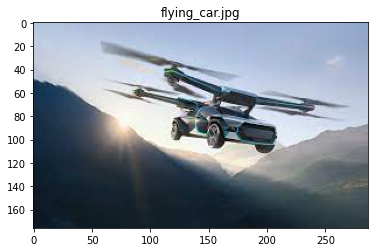

missile 0.42851385474205017
projectile 0.25071051716804504
revolver 0.07358914613723755
warplane 0.06120801344513893
airliner 0.027077818289399147



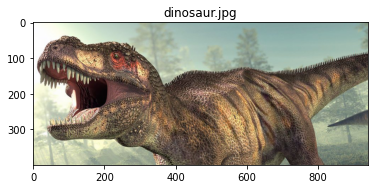

hippopotamus 0.1254647970199585
cougar 0.08795265853404999
boa constrictor 0.06824266165494919
Indian elephant 0.06448112428188324
Komodo dragon 0.0572308748960495



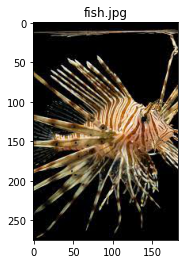

lionfish 0.9922147393226624
sea urchin 0.0020111710764467716
ear 0.001353983418084681
sea anemone 0.0006246720440685749
coral fungus 0.00045480974949896336



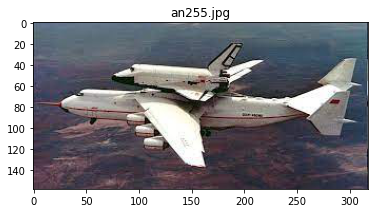

trimaran 0.12037642300128937
tank 0.09571706503629684
speedboat 0.08796904981136322
scabbard 0.0843193456530571
space shuttle 0.08292228728532791



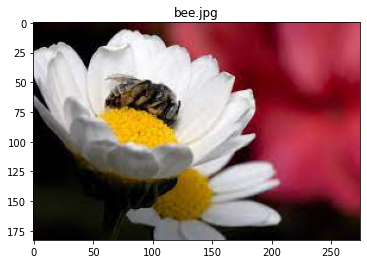

daisy 0.532252848148346
bee 0.10820656269788742
trifle 0.08611977100372314
ice cream 0.029049696400761604
cabbage butterfly 0.022195758298039436



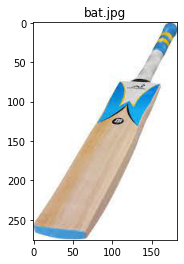

lighter 0.1067863404750824
can opener 0.10574737936258316
letter opener 0.09471145272254944
hammer 0.06054016575217247
cleaver 0.03829346224665642



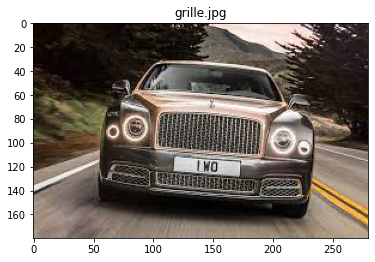

grille 0.4597591757774353
convertible 0.19912633299827576
beach wagon 0.13848476111888885
sports car 0.055954817682504654
cab 0.051771171391010284



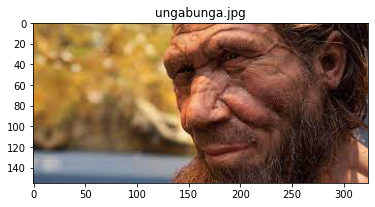

gyromitra 0.7790626287460327
bloodhound 0.03295474499464035
orangutan 0.010296403430402279
hen-of-the-woods 0.008416712284088135
patas 0.007840982638299465



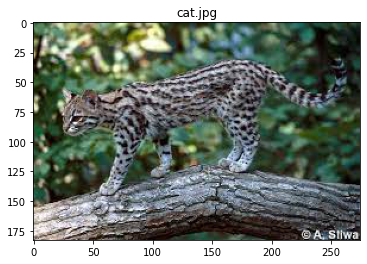

leopard 0.7905868291854858
jaguar 0.0991944819688797
snow leopard 0.046721845865249634
cheetah 0.022492101415991783
lynx 0.019920455291867256



In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

for _, filename in urls:
    input_image = Image.open(filename)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)
    # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
    # print(output[0])
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    # print(probabilities)
    img = mpimg.imread(filename)
    plt.imshow(img)
    plt.title(filename)
    plt.show()
    with open("imagenet_classes.txt", "r") as f:
        categories = [s.strip() for s in f.readlines()]
    # Show top categories per image
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    for i in range(top5_prob.size(0)):
        print(categories[top5_catid[i]], top5_prob[i].item())
    print()

## VGG16

In [ ]:
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13_bn', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19_bn', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

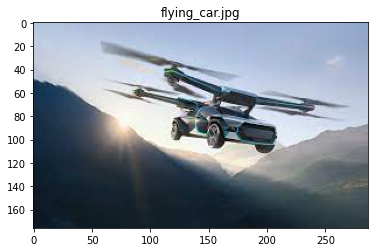

warplane 0.31715402007102966
projectile 0.28426334261894226
airliner 0.1362563520669937
missile 0.03646545857191086
tow truck 0.030163109302520752



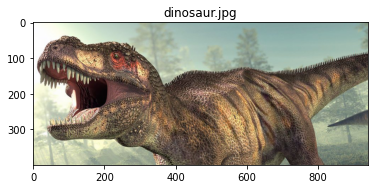

common iguana 0.602007269859314
African chameleon 0.11439958214759827
triceratops 0.04219505190849304
Indian elephant 0.03876892477273941
Komodo dragon 0.03495994582772255



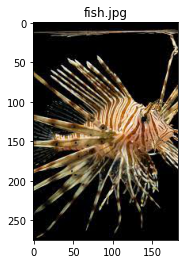

lionfish 0.9989282488822937
puffer 0.0003733706253115088
sea urchin 0.00016715294623281807
flatworm 0.00015157902089413255
jellyfish 0.00012246631376910955



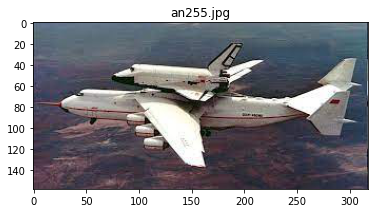

space shuttle 0.8721914291381836
airliner 0.08704160898923874
projectile 0.021151715889573097
missile 0.011270076036453247
trimaran 0.0053767007775604725



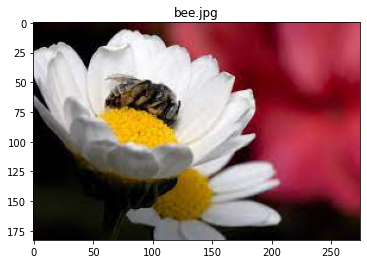

daisy 0.9041454195976257
bee 0.06873034685850143
plate 0.005235003307461739
trifle 0.0024536175187677145
ant 0.0020877011120319366



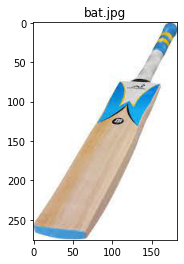

hatchet 0.2783311605453491
cleaver 0.13681600987911224
letter opener 0.12825748324394226
hammer 0.09882891178131104
can opener 0.0756172388792038



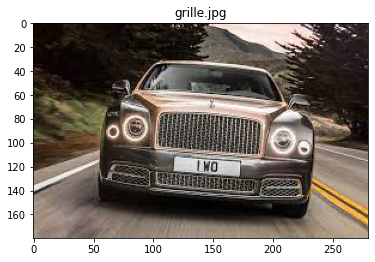

grille 0.45376384258270264
convertible 0.2713811993598938
sports car 0.13661985099315643
beach wagon 0.03265296295285225
limousine 0.030491279438138008



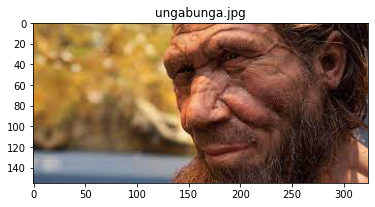

proboscis monkey 0.47526437044143677
macaque 0.12676876783370972
gyromitra 0.09170037508010864
orangutan 0.03813429921865463
patas 0.02331925742328167



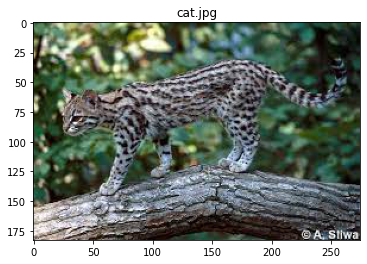

leopard 0.6867695450782776
whiptail 0.07327315956354141
lynx 0.06493078917264938
jaguar 0.0643206387758255
cheetah 0.04631383717060089



In [ ]:
for _, filename in urls:
    input_image = Image.open(filename)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)
    # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
    # print(output[0])
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    # print(probabilities)
    img = mpimg.imread(filename)
    plt.imshow(img)
    plt.title(filename)
    plt.show()
    with open("imagenet_classes.txt", "r") as f:
        categories = [s.strip() for s in f.readlines()]
    # Show top categories per image
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    for i in range(top5_prob.size(0)):
        print(categories[top5_catid[i]], top5_prob[i].item())
    print()

The models are clearly very good. The only time I could get the models to misclassify the image was when there was no direct class associeated with the image. However, for every image, the top 5 guesses were very accurate and suggested that the model has generalization capabilities. 

## FGSM attack

One of the first and most popular adversarial attacks to date is referred to as the Fast Gradient Sign Attack (FGSM) and is described by Goodfellow et. al. in Explaining and Harnessing Adversarial Examples. The attack is remarkably powerful, and yet intuitive. It is designed to attack neural networks by leveraging the way they learn, gradients. The idea is simple, rather than working to minimize the loss by adjusting the weights based on the backpropagated gradients, the attack adjusts the input data to maximize the loss based on the same backpropagated gradients. In other words, the attack uses the gradient of the loss w.r.t the input data, then adjusts the input data to maximize the loss.

In [ ]:
url, filename = ['data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYVFRgWFhUYGBgYGhgZGBocGBgaGBoYGBgZGRgYGBgcIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISGjQkJCQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALIBGwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAQIDBQYABwj/xAA5EAABAwIEBAQDCAIBBQEAAAABAAIRAyEEBRIxBkFRYSJxgZETMrEHFEKhwdHh8CNS8SQzYnKyFf/EABkBAAMBAQEAAAAAAAAAAAAAAAECAwAEBf/EACMRAAICAgIDAAIDAAAAAAAAAAABAhEhMQNBEjJRImETQnH/2gAMAwEAAhEDEQA/AIq6pcaCVf1GqvfQ1OjkuVRT2ZNuNyKBodO5VvhcWRYhFimxovAVdiagmyfx8sROSX5MXOsRrp7X81jK+kdz3Wn1F509UFmvCmJYA4MLw7bTJI8xC668YpHRBUqMpVN01jSSABJNgn1WEEgiCLELe8C8KGoddVpaXDwAjl1gqcpUVUbIPs84U+8VddVk02HYgw7z5EL37CYdrWgAAAbAWhC5Fk7MPTDGjvYQJ5mFawleTLAgToSgLi5ajWcE5R6l2pEA4lIWpJXGeSwRr2ofFMa5haYv5FEPQ74IP7pdG2eBfaLw1Tw7y9jgNT/lkAQQT4OZvusEQvozi7KGYhhafA4CzouW3sey8Y4lyN1EB0CNiRAHY/wmUkzOJnqfZFBxiCJ+qHYP7/ypGv8AX0ToRmh4abDydhHMK2xT9R3QOSUYYTBvtv8AqrEUZXLzx8pEZbH4Bl1fU9lS4anBV1TdZaKwGIJj22WfeyStFizIQFPLHuuGpqYJbG5PlrKh8R9EXxDlTGMBbE9kIcC+m7VBEI+jQfiYBNhuhHyvJuiiw1G6vMNQCuaOQU2iOaDxOG+GeyHLFvRkmmcyiimssoqLpU5MBcyi+y60CVmhQ6EmKqwVB98QlF2Sk8htUWQVckCQrB4shajZBXWdclgzuLe6d1HUMADmjK9LxE8gq575cSunhjizlqmEYZokdyvbeHodQaHDlBG/JeJYcAEHY9V69wnXBpiDI/tt0/JoaOyXO8joOaCKTAdQNmgI3JstawaoF/oi6oDiGn1RjAAIChWSt4FdYWTWpSUkogHFyic5OUTysAXUk1qIlOasEk1lSNeojdcB/dgsYmc/sh3D8+/NK955j2UGtBmQPiqAeId+Q2WT4gyotBbAcHggTuJ+q2br80LiqYe2Ikj084S0MpHz7mHClSm6CYBPhnmPTmm4bIHAy93t/K9S4jwZ+GYZ+If0LNPpkC4hZykQ5JOLwQYeiGtAUwammokFVJRLZKwXR9MWVcx91aURZYaKJsDTaX+L0V1DQLQs5XZ0Qn3x4tqKrGSSDJGoqta4EGFlMfi34Z50bHkntxzwd5Vbnby8glBytgWgjC8RP1gvPhJur/MMU17AQbrCMYZgBafKsve4DVYItWKmWGFZZEvZZSMw+lOebJHErFlRiaHNVxhXWJeCFT1IkqDWRXRbl1lAeaJdhyD2S0sI5zg0c1VnV5Kihx9mKmYyTJ/hXnEjA15Y3lb15qpdThsTdd8FUUjneyM7yeXsvSeC8x1sa2LgeQA/VeYPAHOw3/Zbn7LmF73O0+EbGb9xE3CWegx2eoYZh+Y+inJTw1QPKgkO2SakpQxeEPmuOFGi+oTGlpPssYNL+RKeWLwTGcfYh1Zr2viD8rTALZ+V3L1XtuSZi3EUW1GndoJ9Qi40YIeIUJcpXtk7/wBhROYY2QCK+tpH9nzQ/wB+i5EDzUFcx+/ksPxZxf8ABe2mxuskS838I5DzKCTZj0MYprhz+qVgBMxHqsbwxmzK7dQdD+bZkjutZRqgiJBJ6o/6ALYE2qwdwlps9/NSlh5jyWMZ/FUQXOaefXZY7P3sYC2Lr0DHM58x9PXZYjOsAyrVJ263slbony6MU+ummqrTNcqYwS03VEzdakRWCww1S60WEuFmcMPEtLg3WSPA8ZEtZtlXOpqzebIQtnkgmCUienlWpsqrxuCdq0xdbDANhgnoq/MaYLtUxCZ4VgrBU4DL2UhqfEqVmay7SwW6qmzTElzomw5KXLGJrdATNJSeTulrPso6QsocS9YqgDG1IVG+sZKs8U6VUvZcpGybNe/F3Wo4ewY+E+u/YA6Z+qymVYE1ajGdT+S9Fz1raOFc1sABsIcKlJ3IvWTxnM6uqq89SYvylA1Tupar5cfNQVTawEnn07r0iZX4l4PLyHL1Xq/2TYSKTnkySeUQO0g3/leV/Bl3W8DlJ/QL237PyG4ZrRytYRcbwJmPNSnoaOzYRZDVd+ZUxJ6pjWjcyoFCCzbmAF5r9pvFLHM+7UxM3cew5LXcSYvwkQ4DqP4uvHcwp66hLiSL8+XtKaCszwVmIy8uYxrGOcHFul7ZcJO4MCGxtuNryvbvs2wpZg2MLiTLiZEQZgtHWCN1huDOG2160N1NYwanukwBEBreUn917FhsOymwMY0Na0QAE0sAs5wAUbxKWvPdOaxIYoc8JFN94JaYM2FjcnZfOL3Audqc4uGxk3PWY/Ky+o8Zl7agcD+IEe4heDcU5C/DV3MlkgDSdLZ08iDFimijWR8GYl1PGBj32ktJ62tJPL817dg8LF538l89YamWOB1XkGT1le4cJ5malNodMixNzPf+VpRMmamk/kY91Ox3shNIixHqNvzSCq4QLe8T6EJAk+KpammN+S8s4pqVGPIYJPmY/heoVKpiYj+8lhMZWZUqud4bGD6IS0Tno80rGq53j1fnClosXoL6VI7wq/G5VTcJaRKVsjRlqVir/BOkINmWEG5V7gMIAEHkVPNDHMgIjDYMGCVJisOIU1CWtuslkpGN5Y3GV9DYCzuIpVHk+IgK8+KwkyboWqJnSi0+ic38KGpkT41AypctYWmCLhSMz/Q/RUEd0S+qxx1NhOaJY0xZCYwImi6yHxiDOiJTVwg4RldCqbRKez0/gLASDXI7N/UpftHxmigR19lqsuwjaNJjG7NAH7rAfadW8IEnyVoKqRdayeZ4d8kuJlLX2uPcp9BgN4A7n9ULifE7TNuZ7LqJkRIkmfJeyfZ9Xb8BjGtAAbfaSTck9BfZeJV3XgWGw8uZW/8As5zFjCWeLVF/9Rc9++3n0U55Q0dnsboi6Cq1fPsEOcU0iQZUFerIvboJ+q5myyRWZ+8lpgT2PP8ALZeU5hr+JAEkmBy8/wBl60WayWzvY9vMqFnBjHva8j5SHXvcGU0JUCSLLg3K/u2FY0/O/wAbzz1O5eQED0V0XqQsiw5JgYmbtijDKcHdU7QlLJQMNc+y87+1XLNdEYhvz0pn/wAmO39lvqjSDdVXEGGNSk9u4cCCImxRujHzzh6upw697+4XqvCDyGgE6doAMDbkd1kafCD2VCSRpBPTboQt3kuG0Mgxbkb/AMoSneBlGjUNrdXfWfdSU3k/iH19lTl89PT+V1B15gD1H9CWzUXGJxGljiIiDzj6ryUPqvc94IEuM6YjfexIXoGYYgMY4mRYzYxteyw2SYgf5BAjUYI5o+NxJ8gBLzckj1Kko1HyPEUVWrb+Ex1T6TBbvspP9HK2Pp1Hm0SrKk8su5TYak1oBU1TDh6MUPGPbGUK4c8SUfio0mNoVXUwwad0Lis2LAWkStF03YydYKfHV4cYKXL810uhxsVT43Eku7oWSUUTegvieq17g5q7IaxNiUFXpk7ozJ2aXbJrsMTZ4XZJiWJcI6ymriyDLxM/imKscVcYzmqSo65UXKhWj6KqFeR/aHWJqaSbL1eu+xXivG+JL6zhsAuyHsVejNF82Asoazw2Zv8ASU979hKgqQP3VyYOB+J2/wBEtPFll2Ei4mDcwZhQ1bA8/VQtP8JbCe1cO522swDYgCRrBd6gbeSuq5Lv0XiWS518ASWklzmxDw0T/wCVjbn6L1HJ84+M3V8scjebmDym0HtIXNOPZWMjRZdRa03Pty/laSg4ESFjzVO09za/ayucnxhIgny6+qEX0aS7LhzgL8kDWzFg3c0eZA8k/HgPY5hNnNc2f/YQvB8+ZiME/Q9we07B4c4EX8TH9I/DKdCnuAx7f9h+ib/+q2Ynr9F891eIKrahaXkMbu1j3aD3mbhKeJ6hcPggsJ3LnE3F7AXK1BPok4kOAuoww+ix3B+IxJotOIcS9xm4DSGwA2QPKfVaZ+JI5+aVsyQBmmCYTMD1QbKOnaR5SpsZiQ5wbO+xGxTaghu5+o9QeSRjojqPvEfkmMxEWsPdJUqdwI3mfS6pM+zQMYXTDmxq36+UgR7LJWBsquOMzcxhY19n/M3mO4vtYct45FUHC2JguaTuqfNsxfVd4nTBiRb3H6jdWvC+FL3dFavxojPJtmFr2RAnZCYukGAGdlBVpPpmJsq7FYkusCuZ4IuNmk+9tLAJulpvc0DxbqlyvLnvu4wBsr37rAEnZa8DX8HueNyhKlSmTeE953VJixDlrozQ/M8CwnU1B08GES1081OwgBTcmK0Dfcglw+EhyMY8JzHiUHNo0Y2H4ZkBTVBZJhzIUjwnU3RaKooce3dUFQ3K1OMpSqOpQEmyTYWe6Yx0NJ7Lw/iuoTWeSIvZe0PrammF43xef+ocCQfLYdl3cbyPJYM2zqd1E99z9f7zSPf4v7+aa9xFx535d4VrJg2IMHT13HQfuonPge6kEAl3uhnPBknvCVsxxdqPYKzynO6tF4awhuogfoL8hsqYO3Psmd0jGPZsn4lpudGrwNLWA/7OIF2zd0z72ErUUsdoNjEn1AHJfP8Ags0dT0wT4JLQNtUGJ7SSfbkFqeF+JnEFtQuMabmDJLuXeLz2KnJfBk/p7RUzEObvv+fZZ/OMP8VmhzA9rgJmLRcqnpZsyYLhzO+wkhzp6AyPRTvazENLmVXCN9Love3fdDy+hr4YfH8JP+NAJDCNjBcACLA/utBkWR06BBbTGu0ud4nT1Ep2Iys6vnfOoGdRnsf71TmvqtB/y6rHcCYBJmeqzmg+LNTQxMc1HjMwEwTbnPLoQRy81ksVnGmAXySAPrBt7IJ+dCAXOt16zcesQpylegpUa6ljQTf3i19iQpnZkGiDflv7en7heev4oa0x0BPbpA6zvHcKqxfEjnOIaToc2IJMtJF/MCSP+FoxYXJGs4nzv4d2X1NMciDy8xy7LA4zN3vJJe699zAG+mOkoSvjXu1AukEk37zP1QgVoqiTdhrHkm91r+FMSac2sdljsOw7j2W24bo6mH++yeT/ABEkW2JxuuVSVqkOkckdToHU6duSifTbuuaT8ielYXQzV8ANsrHD13O3Kz7W9FZ5bVvCXoClbLJ7zCpcY66uqzLKkxVEklbYZMhbVhI7EwmBsKKoxI6BsJp4pH4apdVOHonorCk0hJ4oywX1CoiHPVdhh3RrjZOWi8ENfZAfDCJqvUelYODf4PE62Em1tl5bxUWio6Oq2WV5gHfim23P2WL4rH+Q912cLyUmqMs1suk9bDqf2T8SNgk/ESOX1TfhGJduf6ArEQPEkAQLoV4i3NGP0tPU/r3QVRpuSUjGIi+0QuJsPWV0W8rlRtN0DCO3UtCrpMybTHnBgqIpqVhDnY18BoO4iB0NwO5kl3m4q4w+cPoUdDXHVJDiD8riHeHvANz18pVKyuGiW/O6Zd/qOjO/f0HVBoGNtR4te6L7gA9QYdf3j3VXjs/qOMh3WANiw2j8j79lR0N/7yToS0rGthdXFOLjBk/hPWb++6irVyBE/K78pJA9ELUT31Q7cchcb2EX6opAZEXE800LlyYBye1MT2BYwRQJBXoPCeFeWiDbmsHh2yQvVOHK+ii0QNlp+orVg2dPDCGjcqoYCTdXWJLXvOoX5eXZdUwoDZXIpdEZO3YDQw/JT4OiWvS0DdHsp81r+CondsqyvTujTIUDxKwXkrXUU44YFTPYSVIxiWrYlkTaEJ/wFNTEmOinbAsVvFj2LQpwpamydTcClqCyolgaIESEOXFSubG6j0KbY1/SbAYxlI+BpLjuYsAqDPcVre4qxbiWi1vMfRUeaAlxgQF3cKL8jK+k2/UDkmYp5Hny7DqpmANQ+JJ+a0nbsFZkgF4i8X2/coWu/pt+qm0ky4+QUQZdSYxG6whRuCmN5tsmuFvRYxE5IVy4JQihIU9qQhAJLRanQkYmuegMNcooUrjyhRlFCsRclSQiA4KZgUTQp2j0KKME0W3C3uVYluho1RH5rBYc3C0WHxDIbMys9GRrcRTa4B03RjGhzBdZllF740yW8le4DDvA0dlwuKTYsoxWiSlRGqFY/c7WUTMOWG6OFcNQiTaSwU9TEhjtLxCnbTa8SFFm2ioIEShcNULBEplKnkRrsJbh7pz8MN1JSqAp9QWTKrFVMrsMzxEpK8uPhBJV5hKTCO6IGHa24CzfRRQdGYw7HtPiReopcx+cTYJW0piEVVYDfiV+Ja5RqzxFBzdwovgtUGnYHNMosM9hImCRtAsh80ALidglwGkOE7D6rs0YCbL0eM6JlTo3n/hCYok2G36IqoQOduXdA1a8m397qzJkFQXgQEO8ibeSme4C4klQk3HYfmpjET7SOqj1WT3kkpjmxdKzDWldC4hcFgnJwCRqVyRhO+IdkyUi5EA4FIuShExxCQJSkasYVoRLCoWC6lZZMAnZYo99UBg2lBMT65sACszI3vDjnGiHI3E451I6wJCg4SB+7ifRG4tzCCwjsuHk2wPQJgeIxVeQ4RChx+aEv0hVTMvLKmofKZ9ETXoy6yn2CUQ3Bvc90ASU3MWuYYK0HBmVkhz3C3KeiEzrAuqV7fKFrbdBXHGsg+Ttc65V7Rw3VD4VgYIhK3HjUQTsmS+iqKWgx2hpSVq0jwlUOJzAPeWtNwh2VqjX7yOilzSkvUcsXYd9Z4DrNH5qzdTZTb3Chw+LshMzxAa3Yucdh3ScfK2qeH2SlSzVjamIc8T7BRNoE8kDh8U+mddVh09N0QeKaX+p9lZIyijNYDAuBD3v2uBv7qPMsQXEgeSY/FumXP8ATYIXEVui9OKLSYNiWRH5oGtZGl5QR3kpmAbpAA/t1C+/JTsYXuADfIDcqWnl1R2zHb9I27lKamVzGpHOVzQyJxI1vayT1kqtx+F+G9zJmOaW1oLi1lgepIFzlzUDErGpz22S0gn1RZKOBlKAkKeAmQggTglA3XRJgeQ80TDEbgsuq1Q406bnholxAmIvHcxyF1a0eG2gn49dtINIDjoc5oJ/CH2aXRyBQmMzB2trab3tp0nf4oJBEH57fjO890id6NXbK2EQ2CL+60fEmHw72Nq0XFzwGNqw1sFzgXa3loHiO1hus0w906doBMwQmVCpAbISZKzMj1nhZ7fgMBFyEfnWFbogfMUPw+wCiydw0K7+GHX3XDJ3ZCUqZncNhiGw7puUlXLQ75d0dmzwBDTCBpPLBZ+onqud8lujSn+h+WZ4/DO+E/5dg79FbYjMGtGqJlUeZYM1ANW6loVX06Za5sxYH91SCpVZVZQ7E4qo4EhtuV1nab3tfLg65I5kXV/gMWQ06iCTMBOw77gvaAJsh/JmhYyfl4lW/Ln0v8h/FchDfeKjneELQZs99UBjNlJleSmmA5zpIRm4rbLuDjlgWXmsfmbEfmrjBs13c24TmYppeWxA6o9pYByTQjGVSRBttgWJxTIhzQgPvND/AEb7BSYsM1wDI5qqr0Keow5CTaZk2jDC7xN1K/f1XLl6kdFJbGv+VyrXLlyMjGk4TYNZMCesI7MqhDTBI9Vy5RfsWj6mOdVcarZJPiG5JRHEP/c9Eq5N2J0ylekauXIMVBbOSdW2XLko4EU9q5cmQg4JvVcuTANBxXVdqptk6RSaQ2TpBjcDZU42XLksdBlssMvHhrf+g/8AoITEjxu80i5ZezD0KzZQD5x5hcuRkKj3HJGj4Dbck+j+LzXLl5vJoivZlPjvn90LpGttly5cv9kCe0WztwgM9/7ZXLl09l+L1MrkTyatyT6rYZl8gSLkvNslye6GYL5gryp8i5cln6nYypq/L7oWo86Dc+65chw6OWYFg/lqLM1HmTc+6VcqSKLR/9k=', 'panda.jpg']
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

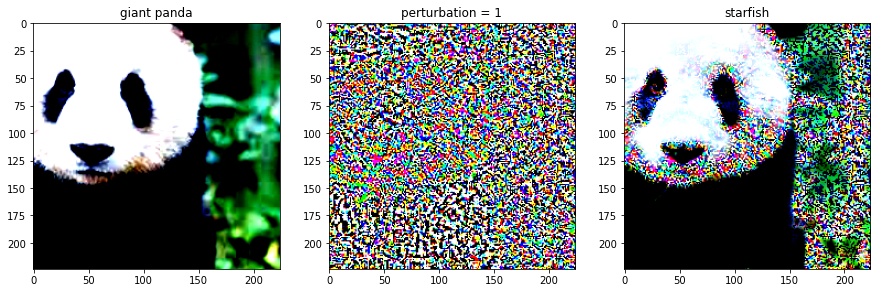

In [ ]:
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)

input_batch = input_tensor.unsqueeze(0)

input_batch = Variable(input_batch, requires_grad=True)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')


output = model(input_batch)
   

probabilities = torch.nn.functional.softmax(output[0], dim=0)
# print(probabilities)

figure = plt.figure(figsize=(15,15))
rows, cols = 1, 3

figure.add_subplot(rows, cols, 1)
plt.imshow(input_batch.cpu().detach().squeeze().permute(1, 2, 0))


with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
prob, category = torch.topk(probabilities, 1)
plt.title(categories[category.item()])

input_batch.retain_grad()

loss = torch.nn.CrossEntropyLoss()
loss_cal = loss(output, category)
loss_cal.backward() 

ep = 1
x_grad = torch.sign(input_batch.grad.data)   

fgsm = ep * x_grad

attacked = input_batch.data + fgsm

figure.add_subplot(rows, cols, 2)
plt.title(f"perturbation = {ep}")
plt.imshow(fgsm.cpu().detach().squeeze().permute(1, 2, 0))

output = model(attacked)
probabilities = torch.nn.functional.softmax(output[0], dim=0)
prob, category = torch.topk(probabilities, 1)

figure.add_subplot(rows, cols, 3)
plt.title(categories[category.item()])
plt.imshow(attacked.cpu().detach().squeeze().permute(1,2,0))


plt.show()

